# Model Learning


To Do: 

Andere Modelle implementieren,

Evalutaion erstellen der verschiedenen Modelle und vergleichen,

Schauen ob schon erste Testläufe mit den bereits preprocesseden daten möglich sind, 

Pipeline

Hyper Parameter Optimization

--> jetzt lap times predicten

In [75]:
import pandas as pd


### Vorgehen für die Modelle

3 Modelle:

1) Modell mit Daten von 2018-heute mit allen Attributen

2) Modell mit Daten von 1996-huete nur mit Attributen die diese Daten gemeinsam haben 

3) Modell von 1950 - heute nur mit Attributen die alle Daten gemeinsam haben 


--> Ensemble Vote der 3 Modelle 

# Test auf reduziertem Datenset

# Model 1 with with loaded train-test split 

stratified sampling, k cross fold validation not possible 

## Load Data

In [328]:
	
X_train = pd.read_csv('../data/train/train.csv')
Y_train = pd.read_csv('../data/train/train_labels.csv')

X_test = pd.read_csv('../data/test/test.csv')
Y_test = pd.read_csv('../data/test/test_labels.csv')


In [329]:
# Filter X_train and X_test for entries where the year is greater than 2018
X_train_2018 = X_train[X_train["year"] > 2018]
X_test_2018 = X_test[X_test["year"] > 2018]

# Filter y_train and y_test based on the same condition applied to X_train and X_test
y_train_2018 = Y_train[X_train["year"] > 2018]
y_test_2018 = Y_test[X_test["year"] > 2018]

# Print the shapes of the filtered datasets
print("X_train_2018 shape:", X_train_2018.shape)
print("X_test_2018 shape:", X_test_2018.shape)
print("y_train_2018 shape:", y_train_2018.shape)
print("y_test_2018 shape:", y_test_2018.shape)

X_train_2018 shape: (2015, 80)
X_test_2018 shape: (484, 80)
y_train_2018 shape: (2015, 1)
y_test_2018 shape: (484, 1)


In [330]:
#bitte alle spalten anzeigen in der ausgabe wenn ich .head() mache

pd.set_option('display.max_columns', None)
X_train_2018.head()


,resultId,raceId,driverId,constructorId,number,grid,year,round,circuitId,race_name,race_date,race_time,fp1_date,fp2_date,fp3_date,fp1_time,fp2_time,fp3_time,quali_time,quali_date,race_location,race_country,race_lat,race_lng,race_alt,q1,q2,q3,driver_dob,driver_nationality,driver_code,min_pit_stop_duration,max_pit_stop_duration,avg_pit_stop_duration,std_pit_stop_duration,milliseconds_count,pit_stop_count,min_pit_stop_lap,max_pit_stop_lap,avg_pit_stop_lap,std_pit_stop_lap,avg_pit_stop_driver,avg_pit_stop_team,avg_pit_stop_track,avg_pit_stop_season,rolling_avg_pit_stop_driver,rolling_avg_pit_stop_team,rolling_avg_pit_stop_track,rolling_avg_pit_stop_season,q1_time,q2_time,q3_time,q_position,fp1_avg_sector_1,fp1_avg_sector_2,fp1_avg_lap_time,fp1_avg_speedI1,fp1_avg_speedI2,fp1_avg_speedFL,fp1_avg_speedST,fp1_avg_tyre_life,fp1_avg_is_on_fresh_tyres,fp2_avg_sector_1,fp2_avg_sector_2,fp2_avg_lap_time,fp2_avg_speedI1,fp2_avg_speedI2,fp2_avg_speedFL,fp2_avg_speedST,fp2_avg_tyre_life,fp2_avg_is_on_fresh_tyres,fp3_avg_sector_1,fp3_avg_sector_2,fp3_avg_lap_time,fp3_avg_speedI1,fp3_avg_speedI2,fp3_avg_speedFL,fp3_avg_speedST,fp3_avg_tyre_life,fp3_avg_is_on_fresh_tyres
32,25658,1086,855,51,24,12,2022,13,11,Hungarian Grand Prix,2022-07-31,13:00:00,2022-07-29,2022-07-29,2022-07-30,12:00:00,15:00:00,11:00:00,14:00:00,2022-07-30,Budapest,Hungary,47.5789,19.2486,264,1:18.973,1:18.573,\N,1999-05-30,Chinese,ZHO,22321.0,28218.0,25269.5,4169.808689,2.0,2.0,27.0,51.0,39.0,16.970563,175702.016848,162752.407312,55352.913854,125509.257466,28602.00,28602.00,22382.400000,254161.00,78973.0,78573.0,NaN,12.0,29610.400,29384.000000,82369.600000,271.400000,241.400000,245.600,295.400000,5.00,0.200000,29008.600000,28808.200000,80733.000000,277.200000,245.400000,253.600000,302.400000,4.000000,0.600000,36034.0,40389.00,106752.25,226.00,192.25,228.25,268.00,7.0,0.50
69,25335,1071,846,1,4,5,2021,19,18,São Paulo Grand Prix,2021-11-14,17:00:00,2021-11-12,2021-11-13,\N,\N,\N,\N,\N,2021-11-12,São Paulo,Brazil,-23.7036,-46.6997,785,1:09.365,1:09.030,1:08.980,1999-11-13,British,NOR,17673.0,27313.0,21218.4,4332.633818,5.0,5.0,1.0,37.0,11.8,14.342245,157510.100539,74948.348083,169764.901144,220149.438203,22895.96,22895.96,78579.800000,188570.68,69365.0,69030.0,68980.0,8.0,18341.000,36669.000000,71593.200000,316.600000,260.200000,314.600,317.800000,5.20,0.800000,19149.307692,38185.846154,74560.538462,303.545455,253.000000,304.307692,300.769231,13.846154,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,25838,1096,848,3,23,19,2022,22,24,Abu Dhabi Grand Prix,2022-11-20,13:00:00,2022-11-18,2022-11-18,2022-11-19,10:00:00,13:00:00,11:00:00,14:00:00,2022-11-19,Abu Dhabi,UAE,24.4672,54.6031,3,1:26.028,\N,\N,1996-03-23,Thai,ALB,21793.0,21798.0,21795.5,3.535534,2.0,2.0,12.0,35.0,23.5,16.263456,80600.518389,61043.839825,22299.215036,129262.906936,39867.60,39867.60,23569.400000,24986.40,86028.0,NaN,NaN,19.0,18237.125,38107.375000,89975.500000,288.333333,306.375000,209.875,319.125000,7.25,0.500000,17793.000000,37278.000000,87656.500000,289.500000,320.250000,209.750000,327.000000,3.750000,1.000000,17593.2,36934.40,86720.80,292.80,326.20,216.20,331.80,4.4,0.80
80,25346,1051,1,131,44,1,2021,20,78,Qatar Grand Prix,2021-11-21,14:00:00,2021-11-19,2021-11-19,2021-11-20,\N,\N,\N,\N,2021-11-20,Al Daayen,Qatar,25.4900,51.4542,12,1:21.901,1:21.682,1:20.827,1985-01-07,British,HAM,25235.0,25381.0,25308.0,103.237590,2.0,2.0,18.0,42.0,30.0,16.970563,98346.355345,113766.891519,55567.688234,221039.458213,332055.90,332055.90,55567.688234,430743.30,81901.0,81682.0,80827.0,1.0,28504.000,28781.333333,87123.666667,238.166667,277.666667,289.000,309.666667,5.00,0.666667,28143.444444,28806.888889,85931.333333,238.888889,274.333333,297.666667,304.111111,7.222222,0.444444,27119.2,27627.00,82959.80,246.60,271.80,309.00,315.80,4.6,0.40
93,26633,1138,807,210,27,6,2024,18,15,Singapore Grand Prix,2024-09-22,12:00:00,2024-09-20,2024-09-20,2024-09-21,09:30:00,13:00:00,09:30:00,13:00:00,2024-09-21,Marina Bay,Singapore,1.2914

## Preprocessing

In [331]:
# Drop specified columns from train and test datasets
columns_to_drop = ['resultId', 'raceId', 'race_name','number', 'race_time', 'fp1_date', 'fp2_date', 'q1', 'q2','q3','fp3_date', 'fp1_time', 'fp2_time', 'fp3_time', 'quali_time', 'quali_date', 'race_location', 'race_country', 'driver_code']

X_train_2018 = X_train_2018.drop(columns=columns_to_drop)
X_test_2018 = X_test_2018.drop(columns=columns_to_drop)


In [332]:
columns_to_drop = ['driver_nationality']

X_train_2018 = X_train_2018.drop(columns=columns_to_drop)
X_test_2018 = X_test_2018.drop(columns=columns_to_drop)

### Calculating Age

In [335]:
from datetime import datetime

#Calculate Age for Train: 
X_train_2018['race_date'] = pd.to_datetime(X_train_2018['race_date'])
X_train_2018['driver_dob'] = pd.to_datetime(X_train_2018['driver_dob'])

X_train_2018['age'] = X_train_2018.apply(lambda row: row['race_date'].year - row['driver_dob'].year - ((row['race_date'].month, row['race_date'].day) < (row['driver_dob'].month, row['driver_dob'].day)), axis=1)

X_train_2018 = X_train_2018.drop(columns=['driver_dob'])
X_train_2018 = X_train_2018.drop(columns=['race_date'])

# Calculate Age for Test
X_test_2018['race_date'] = pd.to_datetime(X_test_2018['race_date'])
X_test_2018['driver_dob'] = pd.to_datetime(X_test_2018['driver_dob'])

X_test_2018['age'] = X_test_2018.apply(lambda row: row['race_date'].year - row['driver_dob'].year - ((row['race_date'].month, row['race_date'].day) < (row['driver_dob'].month, row['driver_dob'].day)), axis=1)

X_test_2018 = X_test_2018.drop(columns=['driver_dob'])
X_test_2018 = X_test_2018.drop(columns=['race_date'])

KeyError: 'race_date'

In [336]:
X_train_2018.head()

,driverId,constructorId,grid,year,round,circuitId,race_lat,race_lng,race_alt,min_pit_stop_duration,max_pit_stop_duration,avg_pit_stop_duration,std_pit_stop_duration,milliseconds_count,pit_stop_count,min_pit_stop_lap,max_pit_stop_lap,avg_pit_stop_lap,std_pit_stop_lap,avg_pit_stop_driver,avg_pit_stop_team,avg_pit_stop_track,avg_pit_stop_season,rolling_avg_pit_stop_driver,rolling_avg_pit_stop_team,rolling_avg_pit_stop_track,rolling_avg_pit_stop_season,q1_time,q2_time,q3_time,q_position,fp1_avg_sector_1,fp1_avg_sector_2,fp1_avg_lap_time,fp1_avg_speedI1,fp1_avg_speedI2,fp1_avg_speedFL,fp1_avg_speedST,fp1_avg_tyre_life,fp1_avg_is_on_fresh_tyres,fp2_avg_sector_1,fp2_avg_sector_2,fp2_avg_lap_time,fp2_avg_speedI1,fp2_avg_speedI2,fp2_avg_speedFL,fp2_avg_speedST,fp2_avg_tyre_life,fp2_avg_is_on_fresh_tyres,fp3_avg_sector_1,fp3_avg_sector_2,fp3_avg_lap_time,fp3_avg_speedI1,fp3_avg_speedI2,fp3_avg_speedFL,fp3_avg_speedST,fp3_avg_tyre_life,fp3_avg_is_on_fresh_tyres,age
32,855,51,12,2022,13,11,47.5789,19.2486,264,22321.0,28218.0,25269.5,4169.808689,2.0,2.0,27.0,51.0,39.0,16.970563,175702.016848,162752.407312,55352.913854,125509.257466,28602.00,28602.00,22382.400000,254161.00,78973.0,78573.0,NaN,12.0,29610.400,29384.000000,82369.600000,271.400000,241.400000,245.600,295.400000,5.00,0.200000,29008.600000,28808.200000,80733.000000,277.200000,245.400000,253.600000,302.400000,4.000000,0.600000,36034.0,40389.00,106752.25,226.00,192.25,228.25,268.00,7.0,0.50,23
69,846,1,5,2021,19,18,-23.7036,-46.6997,785,17673.0,27313.0,21218.4,4332.633818,5.0,5.0,1.0,37.0,11.8,14.342245,157510.100539,74948.348083,169764.901144,220149.438203,22895.96,22895.96,78579.800000,188570.68,69365.0,69030.0,68980.0,8.0,18341.000,36669.000000,71593.200000,316.600000,260.200000,314.600,317.800000,5.20,0.800000,19149.307692,38185.846154,74560.538462,303.545455,253.000000,304.307692,300.769231,13.846154,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
71,848,3,19,2022,22,24,24.4672,54.6031,3,21793.0,21798.0,21795.5,3.535534,2.0,2.0,12.0,35.0,23.5,16.263456,80600.518389,61043.839825,22299.215036,129262.906936,39867.60,39867.60,23569.400000,24986.40,86028.0,NaN,NaN,19.0,18237.125,38107.375000,89975.500000,288.333333,306.375000,209.875,319.125000,7.25,0.500000,17793.000000,37278.000000,87656.500000,289.500000,320.250000,209.750000,327.000000,3.750000,1.000000,17593.2,36934.40,86720.80,292.80,326.20,216.20,331.80,4.4,0.80,26
80,1,131,1,2021,20,78,25.4900,51.4542,12,25235.0,25381.0,25308.0,103.237590,2.0,2.0,18.0,42.0,30.0,16.970563,98346.355345,113766.891519,55567.688234,221039.458213,332055.90,332055.90,55567.688234,430743.30,81901.0,81682.0,80827.0,1.0,28504.000,28781.333333,87123.666667,238.166667,277.666667,289.000,309.666667,5.00,0.666667,28143.444444,28806.888889,85931.333333,238.888889,274.333333,297.666667,304.111111,7.222222,0.444444,27119.2,27627.00,82959.80,246.60,271.80,309.00,315.80,4.6,0.40,36
93,807,210,6,2024,18,15,1.2914,103.8640,18,29808.0,29808.0,29808.0,0.000000,1.0,1.0,29.0,29.0,29.0,0.000000,59485.009119,80163.762376,30910.336323,143935.685393,32274.20,32274.20,31303.000000,28950.60,90724.0,90150.0,90115.0,6.0,28369.500,40544.750000,96315.750000,297.500000,266.750000,245.875,288.714286,8.75,0.250000,27622.000000,39104.250000,92979.500000,309.750000,277.250000,248.250000,297.750000,3.500000,1.000000,27280.5,38762.25,91875.25,312.25,279.00,258.25,300.75,3.5,0.75,37


### Creation of a driver score

Based on performance in the last 5 races and the mean position of the races the driver has driven on the certain race track.

In [ ]:
#Feature Engeneering ist nur möglich auf dem gesamten Datensatz und nicht auf den einzelnen train und test datensätzen

## Encoding

#### Encoding ohne NaN hoffentlich

In [306]:
# Encode object columns with OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd


#
# 
# object_columns = X_train_2018.select_dtypes(include=['object']).columns

from sklearn import preprocessing

# Identifiziere die Spalten mit Objektdatentypen
object_columns = X_train_2018.select_dtypes(include=['object']).columns

# Initialisiere den OneHotEncoder mit handle_unknown='ignore'
encoderOH = OneHotEncoder(handle_unknown='ignore')

# Verwende ColumnTransformer, um die Transformationen konsistent anzuwenden
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', encoderOH, object_columns)
    ],
    remainder='passthrough'
)

# Passe den ColumnTransformer auf die Trainingsdaten an und transformiere die Trainingsdaten
X_train_2018_transformed = preprocessor.fit_transform(X_train_2018)
X_test_2018_transformed = preprocessor.transform(X_test_2018)

# Konvertiere die transformierten Daten zurück in DataFrames
X_train_2018 = pd.DataFrame(X_train_2018_transformed, columns=preprocessor.get_feature_names_out())
X_test_2018 = pd.DataFrame(X_test_2018_transformed, columns=preprocessor.get_feature_names_out())

#### Encoding 2 mit NaN woher auch immer

In [292]:
# Encode object columns with OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd


object_columns = X_train_2018.select_dtypes(include=['object']).columns

from sklearn import preprocessing

encoderOH = preprocessing.OneHotEncoder(handle_unknown='ignore')
encoded_train_2018 = pd.DataFrame(encoderOH.fit_transform(X_train_2018[object_columns]).toarray(), columns=encoderOH.get_feature_names_out(object_columns))
encoded_test_2018 = pd.DataFrame(encoderOH.transform(X_test_2018[object_columns]).toarray(), columns=encoderOH.get_feature_names_out(object_columns))

# Drop original object columns and join encoded columns
X_train_2018 = X_train_2018.drop(columns=object_columns).join(encoded_train_2018)
X_test_2018 = X_test_2018.drop(columns=object_columns).join(encoded_test_2018)

In [337]:
display(object_columns)

Index(['driver_nationality'], dtype='object')

In [338]:
X_train_2018.head()

,driverId,constructorId,grid,year,round,circuitId,race_lat,race_lng,race_alt,min_pit_stop_duration,max_pit_stop_duration,avg_pit_stop_duration,std_pit_stop_duration,milliseconds_count,pit_stop_count,min_pit_stop_lap,max_pit_stop_lap,avg_pit_stop_lap,std_pit_stop_lap,avg_pit_stop_driver,avg_pit_stop_team,avg_pit_stop_track,avg_pit_stop_season,rolling_avg_pit_stop_driver,rolling_avg_pit_stop_team,rolling_avg_pit_stop_track,rolling_avg_pit_stop_season,q1_time,q2_time,q3_time,q_position,fp1_avg_sector_1,fp1_avg_sector_2,fp1_avg_lap_time,fp1_avg_speedI1,fp1_avg_speedI2,fp1_avg_speedFL,fp1_avg_speedST,fp1_avg_tyre_life,fp1_avg_is_on_fresh_tyres,fp2_avg_sector_1,fp2_avg_sector_2,fp2_avg_lap_time,fp2_avg_speedI1,fp2_avg_speedI2,fp2_avg_speedFL,fp2_avg_speedST,fp2_avg_tyre_life,fp2_avg_is_on_fresh_tyres,fp3_avg_sector_1,fp3_avg_sector_2,fp3_avg_lap_time,fp3_avg_speedI1,fp3_avg_speedI2,fp3_avg_speedFL,fp3_avg_speedST,fp3_avg_tyre_life,fp3_avg_is_on_fresh_tyres,age
32,855,51,12,2022,13,11,47.5789,19.2486,264,22321.0,28218.0,25269.5,4169.808689,2.0,2.0,27.0,51.0,39.0,16.970563,175702.016848,162752.407312,55352.913854,125509.257466,28602.00,28602.00,22382.400000,254161.00,78973.0,78573.0,NaN,12.0,29610.400,29384.000000,82369.600000,271.400000,241.400000,245.600,295.400000,5.00,0.200000,29008.600000,28808.200000,80733.000000,277.200000,245.400000,253.600000,302.400000,4.000000,0.600000,36034.0,40389.00,106752.25,226.00,192.25,228.25,268.00,7.0,0.50,23
69,846,1,5,2021,19,18,-23.7036,-46.6997,785,17673.0,27313.0,21218.4,4332.633818,5.0,5.0,1.0,37.0,11.8,14.342245,157510.100539,74948.348083,169764.901144,220149.438203,22895.96,22895.96,78579.800000,188570.68,69365.0,69030.0,68980.0,8.0,18341.000,36669.000000,71593.200000,316.600000,260.200000,314.600,317.800000,5.20,0.800000,19149.307692,38185.846154,74560.538462,303.545455,253.000000,304.307692,300.769231,13.846154,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
71,848,3,19,2022,22,24,24.4672,54.6031,3,21793.0,21798.0,21795.5,3.535534,2.0,2.0,12.0,35.0,23.5,16.263456,80600.518389,61043.839825,22299.215036,129262.906936,39867.60,39867.60,23569.400000,24986.40,86028.0,NaN,NaN,19.0,18237.125,38107.375000,89975.500000,288.333333,306.375000,209.875,319.125000,7.25,0.500000,17793.000000,37278.000000,87656.500000,289.500000,320.250000,209.750000,327.000000,3.750000,1.000000,17593.2,36934.40,86720.80,292.80,326.20,216.20,331.80,4.4,0.80,26
80,1,131,1,2021,20,78,25.4900,51.4542,12,25235.0,25381.0,25308.0,103.237590,2.0,2.0,18.0,42.0,30.0,16.970563,98346.355345,113766.891519,55567.688234,221039.458213,332055.90,332055.90,55567.688234,430743.30,81901.0,81682.0,80827.0,1.0,28504.000,28781.333333,87123.666667,238.166667,277.666667,289.000,309.666667,5.00,0.666667,28143.444444,28806.888889,85931.333333,238.888889,274.333333,297.666667,304.111111,7.222222,0.444444,27119.2,27627.00,82959.80,246.60,271.80,309.00,315.80,4.6,0.40,36
93,807,210,6,2024,18,15,1.2914,103.8640,18,29808.0,29808.0,29808.0,0.000000,1.0,1.0,29.0,29.0,29.0,0.000000,59485.009119,80163.762376,30910.336323,143935.685393,32274.20,32274.20,31303.000000,28950.60,90724.0,90150.0,90115.0,6.0,28369.500,40544.750000,96315.750000,297.500000,266.750000,245.875,288.714286,8.75,0.250000,27622.000000,39104.250000,92979.500000,309.750000,277.250000,248.250000,297.750000,3.500000,1.000000,27280.5,38762.25,91875.25,312.25,279.00,258.25,300.75,3.5,0.75,37


In [326]:
# Zeige alle Einträge bei driver_nationality_Thai, die NaN-Werte haben
nan_entries_thai = X_train_2018[X_train_2018['cat__driver_nationality_Thai'].isna()]
display(nan_entries_thai)

KeyError: 'cat__driver_nationality_Thai'

In [339]:
label_encoder = preprocessing.LabelEncoder().fit(y_train_2018)
y_train_2018 = label_encoder.fit_transform(y_train_2018)
y_test_2018 = label_encoder.transform(y_test_2018)

/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


## Normalisation

Ckeck ob es was bringt

In [340]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
min_max_scaler = MinMaxScaler()
X_train_2018 = min_max_scaler.fit_transform(X_train_2018)
X_test_2018 = min_max_scaler.transform(X_test_2018)

## Learning the Modell

### Random Forrest

In [341]:
#Try random forest classifier
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(max_depth=2, random_state=0) #Modell initialisieren
random_forest.fit(X_train_2018, y_train_2018) #Lernvorgang des Modells



RandomForestClassifier(max_depth=2, random_state=0)

In [342]:
# Vorhersagen mit dem RandomForestClassifier auf df1_test_preprocessed
X_rf_pred = random_forest.predict(X_test_2018)

# Zeige die Vorhersagen
print(X_rf_pred)

[13  8  5 13 13 13 19 13  8  2  5  5 13 11  1 13 13  0  2  8 13  1  7  1
  1  5  8  8  5 19  0  1  0 13  0 13 13 13 13 13 13  1 13  1  5 13  1  5
  2 13  5  1 13  1 13  5 13 19  0  8  0 19  0 13 13  0 13 19 12 19 13  3
 13 19  1 19 19  0 16 13  0 13 13  5 12 13  5  1 13  1  0  5 13  0  5 13
  5  0  8 13  1 13  8 13  1 13 13 13 13 13  5  8  0 13 12  0  5 19 13  2
  1  1 13  1 13 13 13 12 13 19 13  5 13  5 19  2 13  0 19 19 16 13  5  1
  1  5  0 13 13  1 13  5 13  1  1  0  1  1 13 13  8  5  0  0 13  1 13 13
 13  0 13  5  0  1 19  1 14 13 12 19 13 13 13  5 13 13 19 13 19  1 19  5
 19 13 19  8 13 13 13 13 13  1 13 13 13 13  5  8  8 13 13 13 13  5  5 13
  0 13 13  5 13  5 13 13 13 13  5 19 13 13 19  1 13  8 13 13 19 13  0  8
  5 13 13  1  8 13 12  8 13  5 12 12 13 13 13 13  8 13 13  0 13  0 13  1
  0 13 13 13  5  1  0  5  0 13 13 13  2 13 13 13  5  5  5 13  1 13  1 13
  0  5  0 13 13  8 13 13 19 13 13 16  0  0  0 13  1  1 13  1 13 13 13  8
 13  0 19  5 13 13 13  5 13 13  0  8  1  5 13  1  0

In [343]:
# Berechnung des mse der prediction
from sklearn.metrics import mean_squared_error
x_mse = mean_squared_error(y_test_2018, X_rf_pred)
print("Mean Squared Error:", x_mse)

#Ich möcbte aber den RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
print("Root Mean Squared Error:", sqrt(x_mse))


Mean Squared Error: 23.018595041322314
Root Mean Squared Error: 4.797769798700466


#### Hyperparameter Tuning via Successive Halving

In [47]:
#Dauert 2 min 30 sek
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import randint
from sklearn.model_selection import StratifiedKFold

from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv  
from sklearn.model_selection import HalvingRandomSearchCV

rng = np.random.RandomState(0)

clf = RandomForestClassifier( random_state=rng)

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.75]
}
#Stratified K-Fold Cross Validation -> Lief besser mit KFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf_rsh = HalvingRandomSearchCV(
    estimator=clf, param_distributions=param_dist, factor=2, random_state=rng,cv=skf
)

rf_rsh.fit(X_train_2018, y_train_2018)

HalvingRandomSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                      estimator=RandomForestClassifier(random_state=RandomState(MT19937) at 0x142159740),
                      factor=2,
                      param_distributions={'max_depth': [None, 10, 20, 30],
                                           'max_features': [None, 'sqrt',
                                                            'log2', 0.5, 0.75],
                                           'min_samples_leaf': [1, 2, 4],
                                           'min_samples_split': [2, 5, 10],
                                           'n_estimators': [100, 200, 300]},
                      random_state=RandomState(MT19937) at 0x142159740)

In [49]:
#Import classification report

from sklearn.metrics import classification_report

# Beste Parameter und Score
print("Beste Parameter:", rf_rsh.best_params_)
print("Bester Score:", rf_rsh.best_score_)

# Vorhersagen und Bewertung
X_rf_sh_pred = rf_rsh.predict(X_test_2018)
print("Classification Report:")
print(classification_report(y_test_2018, X_rf_sh_pred, target_names=label_encoder.classes_.astype(str)))

Beste Parameter: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': 30}
Bester Score: 0.10124999999999999
Classification Report:
              precision    recall  f1-score   support

           1       0.37      0.39      0.38        28
           2       0.23      0.29      0.25        24
           3       0.14      0.19      0.16        27
           4       0.21      0.11      0.15        27
           5       0.22      0.13      0.16        31
           6       0.14      0.24      0.17        21
           7       0.03      0.05      0.04        22
           8       0.00      0.00      0.00        20
           9       0.00      0.00      0.00        20
          10       0.00      0.00      0.00        19
          11       0.14      0.06      0.09        32
          12       0.00      0.00      0.00        23
          13       0.00      0.00      0.00        23
          14       0.06      0.09      0.07        23
       

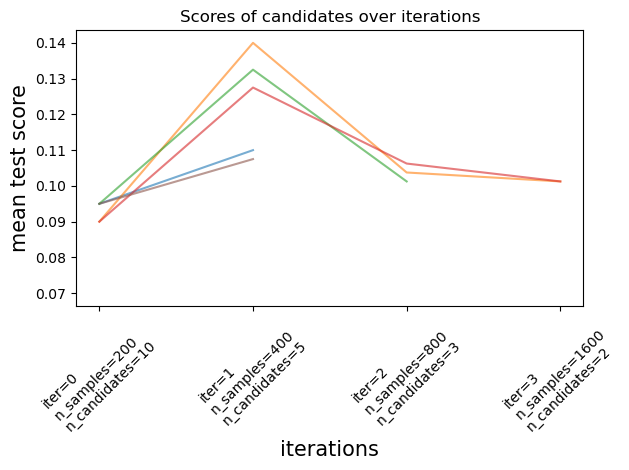

In [50]:
results = pd.DataFrame(rf_rsh.cv_results_)
results["params_str"] = results.params.apply(str)
results.drop_duplicates(subset=("params_str", "iter"), inplace=True)
mean_scores = results.pivot(
    index="iter", columns="params_str", values="mean_test_score"
)
ax = mean_scores.plot(legend=False, alpha=0.6)

labels = [
    f"iter={i}\nn_samples={rf_rsh.n_resources_[i]}\nn_candidates={rf_rsh.n_candidates_[i]}"
    for i in range(rf_rsh.n_iterations_)
]

ax.set_xticks(range(rf_rsh.n_iterations_))
ax.set_xticklabels(labels, rotation=45, multialignment="left")
ax.set_title("Scores of candidates over iterations")
ax.set_ylabel("mean test score", fontsize=15)
ax.set_xlabel("iterations", fontsize=15)

plt.tight_layout()
plt.show()

In [52]:
# Berechnung des mse der prediction
from sklearn.metrics import mean_squared_error
x_mse_sh = mean_squared_error(y_test_2018, X_rf_sh_pred)
print("Mean Squared Error:", x_mse_sh)

#Ich möcbte aber den RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
print("Root Mean Squared Error:", sqrt(x_mse_sh))

Mean Squared Error: 19.919421487603305
Root Mean Squared Error: 4.463117911012805


### XG Boost

In [26]:
# XGBoost trainieren
import xgboost as xgb

clf_xg = xgb.XGBClassifier(random_state=42)
clf_xg.fit(X_train_2018, y_train_2018)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [29]:
# Prediction
X_pred_xg = clf_xg.predict(X_test_2018)
print(X_pred_xg)

[18  5  6  6 12 11  3 11  8  3  6  6 18  8  3  8 16  0  4  9  7  4  4  0
  5  5 12  9  6 19  2  5  2 19  0 18  9 12 16 12 13  1 11  3  6 17  4  5
  5  9  3 10 13  2 16  5  7 18  1  5  0 19  2 16 13  0 12 19  8 19 10  4
 11 19  0 19 18  3 15  9  6  7  2 18  8 18  6  1 17  3  0 17 16  1  5 14
  3  1  5 12 15 16  6 14  2 11 11 16  7 14  5  7  1 16 11  0 19 16 15  7
  6  3 16  4 14 18 13 16  9 19  7  6 13  6 19  0  5  1 19 16 16 11 19  3
  3  5  1 16 16  2  7 19 12  2  1  0  8  3  7 17  6  6  1  2 14  2 17 15
 11  3 19 10  0 16 18  1  3  9  6 19  7 13 17  4 10 16 19  8 19  5 19  9
 18 11 18 13 18 16 15 14 18  4  7 12 16 11  9  3  6 10 12  9 18  6 10 10
  2 16  7  5 15  4 11 19 15 11 10 19  7 13 19  3 17 12  9 13 19 14  1 10
  9 12  9  2  9  9  6 14 17  3 10 13 16 10 17 12  9  5 18  1 15  3 13 14
  2  8 10 13  5  3  0  4  1 12 15 15  4  7 15 12  3 11  4 18  3 18  3 10
  3  3  1 12 13  5 18 13 19 17 12 15  2  0  2 14  2  2 18  3  9 12 11  9
 16  3 19  9  8 17 16  5  8 16  0  7  4  5 15 16  2

In [30]:
# Berechnung des mse der prediction
from sklearn.metrics import mean_squared_error
x_mse_xg = mean_squared_error(y_test_2018, X_pred_xg)
print("Mean Squared Error:", x_mse_xg)

#Ich möcbte aber den RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
print("Root Mean Squared Error:", sqrt(x_mse_xg))

Mean Squared Error: 19.035123966942148
Root Mean Squared Error: 4.362926078555784


#### Hyperparameter Tuning via successive halving

In [57]:
#Dauert so 2 min 30 sek

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold

# Successive Halving Hyperparameter Tuning for XGBoost

# Definiere das Modell
xgb_clf = xgb.XGBClassifier(random_state=0)

# Definiere den Parameter-Raster
param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

#K-Fold Cross Validation

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Führe die Halving Random Search durch
rsh_xgb = HalvingRandomSearchCV(
    estimator=xgb_clf, param_distributions=param_dist_xgb, factor=2, random_state=0, cv=skf
)

rsh_xgb.fit(X_train_2018, y_train_2018)

# Beste Parameter und Score
print("Beste Parameter für XGBoost:", rsh_xgb.best_params_)
print("Bester Score für XGBoost:", rsh_xgb.best_score_)

# Vorhersagen und Bewertung
X_xgb_sh_pred = rsh_xgb.predict(X_test_2018)
print("Classification Report für XGBoost:")
print(classification_report(y_test_2018, X_xgb_sh_pred, target_names=label_encoder.classes_.astype(str)))

Beste Parameter für XGBoost: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 9, 'learning_rate': 0.2, 'colsample_bytree': 1.0}
Bester Score für XGBoost: 0.090625
Classification Report für XGBoost:
              precision    recall  f1-score   support

           1       0.44      0.43      0.44        28
           2       0.11      0.12      0.12        24
           3       0.09      0.11      0.10        27
           4       0.04      0.04      0.04        27
           5       0.04      0.03      0.04        31
           6       0.06      0.10      0.07        21
           7       0.07      0.09      0.08        22
           8       0.04      0.05      0.04        20
           9       0.00      0.00      0.00        20
          10       0.00      0.00      0.00        19
          11       0.04      0.03      0.03        32
          12       0.00      0.00      0.00        23
          13       0.00      0.00      0.00        23
          14       0.08      0.09      0.

In [58]:
# Berechnung des mse der prediction
from sklearn.metrics import mean_squared_error
x_mse_xg_sh = mean_squared_error(y_test_2018, X_xgb_sh_pred)
print("Mean Squared Error:", x_mse_xg_sh)

#Ich möcbte aber den RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
print("Root Mean Squared Error:", sqrt(x_mse_xg_sh))

Mean Squared Error: 19.18595041322314
Root Mean Squared Error: 4.380176984235128


#### Hyperparameter tuning via randomized search 

In [46]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, mean_squared_error
from math import sqrt

# Initialisiere den XGBoost Classifier
xgb = xgb.XGBClassifier(random_state=42)

# Hyperparameter-Raum
param_dist_xgb = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [3, 6, 9, 12],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}

# Definiere K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# RandomizedSearchCV mit K-Fold Cross-Validation
random_search = RandomizedSearchCV(
    estimator=xgb, param_distributions=param_dist_xgb, n_iter=50, cv=skf, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1
)

# Modelltraining
random_search.fit(X_train_2018, y_train_2018)

# Beste Parameter und Score
print("Beste Parameter:", random_search.best_params_)
print("Bester Score:", -random_search.best_score_)

# Beim Classification Report kann noch noch der Parameter zero_division hinzugefügt werden um das Verhalten bei undefinierten Präzisions- und Recall Werten zu steuern
# Vorhersagen und Bewertung
X_xgb_rs_pred = random_search.predict(X_test_2018)
X_xgb_rs_pred_original = label_encoder.inverse_transform(X_xgb_rs_pred)
print("Classification Report:")
print(classification_report(y_test_2018, X_xgb_rs_pred_original))

# Berechne den RMSE auf dem Test-Set
test_mse = mean_squared_error(y_test_2018, X_xgb_rs_pred)
test_rmse = sqrt(test_mse)
print("Root Mean Squared Error (RMSE) auf dem Test-Set:", test_rmse)

Beste Parameter: {'subsample': 0.9, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.05, 'colsample_bytree': 0.9}
Bester Score: 20.337965260545907
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.22      0.25      0.24        24
           2       0.21      0.22      0.22        27
           3       0.12      0.11      0.11        27
           4       0.16      0.19      0.17        31
           5       0.20      0.19      0.20        21
           6       0.18      0.23      0.20        22
           7       0.09      0.15      0.11        20
           8       0.08      0.10      0.09        20
           9       0.07      0.05      0.06        19
          10       0.06      0.06      0.06        32
          11       0.05      0.04      0.05        23
          12       0.09      0.09      0.09        23
          13       0.00      0.00      0.00        23
          14

/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/op

### Hist Gradient Boosting

In [123]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report

# GradientBoostingClassifier initialisieren
hgbc = HistGradientBoostingClassifier(max_iter=100, learning_rate=0.1, max_depth=3, random_state=42)

# Modell trainieren
hgbc.fit(X_train_2018, y_train_2018)

# Vorhersagen auf Testdaten
X_pred_hgb_2018 = hgbc.predict(X_test_2018)

# Klassifikationsbericht ausgeben
print(classification_report(y_test_2018, X_pred_hgb_2018, target_names=label_encoder.classes_.astype(str), zero_division=0))

              precision    recall  f1-score   support

           1       0.41      0.43      0.42        28
           2       0.10      0.12      0.11        24
           3       0.07      0.07      0.07        27
           4       0.15      0.15      0.15        27
           5       0.00      0.00      0.00        31
           6       0.16      0.24      0.19        21
           7       0.05      0.09      0.06        22
           8       0.00      0.00      0.00        20
           9       0.00      0.00      0.00        20
          10       0.11      0.16      0.13        19
          11       0.05      0.03      0.04        32
          12       0.04      0.04      0.04        23
          13       0.06      0.04      0.05        23
          14       0.09      0.09      0.09        23
          15       0.04      0.04      0.04        25
          16       0.07      0.04      0.05        27
          17       0.06      0.08      0.07        24
          18       0.20    

In [124]:
#RMSE für HistGradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from math import sqrt

# Berechnung des mse der prediction
x_mse_hgb = mean_squared_error(y_test_2018, X_pred_hgb_2018)
print("Mean Squared Error HGB:", x_mse_hgb)
print("Root Mean Squared Error HGB:", sqrt(x_mse_hgb))


Mean Squared Error HGB: 19.762396694214875
Root Mean Squared Error HGB: 4.445491726931327


### Gradient Boost mit Imputer

In [125]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Erstelle eine Pipeline mit einem Imputer und dem GradientBoostingClassifier
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('gbc', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
])

# Modell trainieren
pipeline.fit(X_train_2018, y_train_2018)

# Vorhersagen auf Testdaten
X_pred_gb_2018 = pipeline.predict(X_test_2018)

# Klassifikationsbericht ausgeben
print(classification_report(y_test_2018, X_pred_gb_2018, target_names=label_encoder.classes_.astype(str), zero_division=0))

              precision    recall  f1-score   support

           1       0.63      0.43      0.51        28
           2       0.19      0.29      0.23        24
           3       0.05      0.07      0.06        27
           4       0.24      0.19      0.21        27
           5       0.12      0.06      0.09        31
           6       0.14      0.19      0.16        21
           7       0.00      0.00      0.00        22
           8       0.00      0.00      0.00        20
           9       0.00      0.00      0.00        20
          10       0.05      0.05      0.05        19
          11       0.05      0.03      0.04        32
          12       0.10      0.13      0.12        23
          13       0.06      0.04      0.05        23
          14       0.00      0.00      0.00        23
          15       0.08      0.08      0.08        25
          16       0.18      0.11      0.14        27
          17       0.12      0.12      0.12        24
          18       0.07    

In [126]:

# Berechnung des mse der prediction
x_mse_gb = mean_squared_error(y_test_2018, X_pred_gb_2018)
print("Mean Squared Error GB:", x_mse_gb)
print("Root Mean Squared Error GB:", sqrt(x_mse_gb))

Mean Squared Error HGB: 22.177685950413224
Root Mean Squared Error HGB: 4.709319053792514


### KNN

In [129]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Erstelle eine Pipeline mit einem Imputer und dem KNeighborsClassifier
pipelineknn = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

# Modell trainieren
pipelineknn.fit(X_train_2018, y_train_2018)

# Vorhersagen auf Testdaten
X_pred_knn_2018 = pipelineknn.predict(X_test_2018)

# Klassifikationsbericht ausgeben
print(classification_report(y_test_2018, X_pred_knn_2018, target_names=label_encoder.classes_.astype(str), zero_division=0))

              precision    recall  f1-score   support

           1       0.07      0.21      0.10        28
           2       0.02      0.04      0.02        24
           3       0.04      0.07      0.05        27
           4       0.03      0.04      0.03        27
           5       0.00      0.00      0.00        31
           6       0.03      0.05      0.03        21
           7       0.00      0.00      0.00        22
           8       0.00      0.00      0.00        20
           9       0.00      0.00      0.00        20
          10       0.00      0.00      0.00        19
          11       0.00      0.00      0.00        32
          12       0.17      0.04      0.07        23
          13       0.08      0.04      0.06        23
          14       0.17      0.04      0.07        23
          15       0.00      0.00      0.00        25
          16       0.29      0.07      0.12        27
          17       0.17      0.04      0.07        24
          18       0.00    

In [130]:
# Berechnung des mse der prediction
x_mse_knn = mean_squared_error(y_test_2018, X_pred_knn_2018)
print("Mean Squared Error KNN:", x_mse_knn)
print("Root Mean Squared Error KNN:", sqrt(x_mse_knn))

Mean Squared Error KNN: 52.646694214876035
Root Mean Squared Error KNN: 7.255804174237066


## Ensemble

In [107]:

from sklearn.metrics import accuracy_score

def evaluate_classifier(e_name, e, X_train, y_train, X_test, y_test):
    y_pred = e.fit(X_train, y_train).predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    print(f'{e_name}: ACC={acc:.2f}', f'{e_name}: RMSE={rmse:.2f}')


In [43]:

#Dauert 6 Min

#Stacking Example for XG-Boost and Random Forrest

from sklearn.tree import DecisionTreeClassifier #Meta Learner
from sklearn.preprocessing import LabelEncoder

# Stacking: scikit-learn has no implementation for Stacking. You can use this -> https://rasbt.gith2ub.io/mlxtend/
# HINT: mlxtend can only work with numerical labels. You can use the LabelEncoder to transform your labels.

from mlxtend.classifier import StackingClassifier

estimators = {'RandomForrest with Successive Halving': rf_rsh, 'XG Boost Classifier': clf_xg} #Possible to extend to even more classifiers

#encoder = LabelEncoder()
#df1_target_train_encoded = encoder.fit_transform(df1_target_train)
#df1_target_test_encoded = encoder.transform(df1_target_test)

ensemble = StackingClassifier(
    classifiers=list(estimators.values()),
    meta_classifier=DecisionTreeClassifier()
)
estimators['Stacking'] = ensemble

for e_name, e in estimators.items():
    evaluate_classifier(e_name, e, X_train_2018, y_train_2018, X_test_2018, y_test_2018)

RandomForrest with Successive Halving: ACC=0.12 RandomForrest with Successive Halving: RMSE=4.55
XG Boost Classifier: ACC=0.10 XG Boost Classifier: RMSE=4.36
Stacking: ACC=0.10 Stacking: RMSE=4.36


In [48]:
#Visualize the stacking calssifier decision tree to see how the meta learner is making decisions
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(ensemble, feature_names=estimators, 
               class_names=label_encoder.classes_)
plt.show()


InvalidParameterError: The 'decision_tree' parameter of plot_tree must be an instance of 'sklearn.tree._classes.DecisionTreeClassifier' or an instance of 'sklearn.tree._classes.DecisionTreeRegressor'. Got StackingClassifier(classifiers=[HalvingRandomSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                                                      estimator=RandomForestClassifier(random_state=RandomState(MT19937) at 0x141E13840),
                                                      factor=2,
                                                      param_distributions={'max_depth': [None,
                                                                                         10,
                                                                                         20,
                                                                                         30],
                                                                           'max_features': [None,
                                                                                            'sqrt',
                                                                                            'log2',
                                                                                            0.5,
                                                                                            0.75],
                                                                           'min_samples_leaf': [1,
                                                                                                2,
                                                                                                4],
                                                                           'min_samples_split': [2,
                                                                                                 5,
                                                                                                 10],
                                                                           'n_est...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              objective='multi:softprob', ...)],
                   meta_classifier=DecisionTreeClassifier()) instead.

<Figure size 2000x1000 with 0 Axes>

# Modell 2 - Daten 1950-2018

Folgende Probleme: Viele NaN Werte bei Position

Welche attribute sollen wir nehmen? Es gibt quasi keine vernünftigen wie standings etc.

## Load Data

In [346]:
	
X_train_1950 = pd.read_csv('../data/train/train.csv')
y_train_1950 = pd.read_csv('../data/train/train_labels.csv')

X_test_1950 = pd.read_csv('../data/test/test.csv')
y_test_1950 = pd.read_csv('../data/test/test_labels.csv')


In [347]:
# Filter X_train and X_test for entries where the year is greater than 2018
#X_train_1950 = X_train[X_train["year"] <= 2018]
#X_test_1950 = X_test[X_test["year"] <= 2018]

# Filter y_train and y_test based on the same condition applied to X_train and X_test
#y_train_1950 = Y_train[X_train["year"] <= 2018]
#y_test_1950 = Y_test[X_test["year"] <= 2018]

# Print the shapes of the filtered datasets
print("X_train_2018 shape:", X_train_1950.shape)
print("X_test_2018 shape:", X_test_1950.shape)
print("y_train_2018 shape:", y_train_1950.shape)
print("y_test_2018 shape:", y_test_1950.shape)

X_train_2018 shape: (21359, 80)
X_test_2018 shape: (5340, 80)
y_train_2018 shape: (21359, 1)
y_test_2018 shape: (5340, 1)


In [348]:
X_train_1950.head()

,resultId,raceId,driverId,constructorId,number,grid,year,round,circuitId,race_name,race_date,race_time,fp1_date,fp2_date,fp3_date,fp1_time,fp2_time,fp3_time,quali_time,quali_date,race_location,race_country,race_lat,race_lng,race_alt,q1,q2,q3,driver_dob,driver_nationality,driver_code,min_pit_stop_duration,max_pit_stop_duration,avg_pit_stop_duration,std_pit_stop_duration,milliseconds_count,pit_stop_count,min_pit_stop_lap,max_pit_stop_lap,avg_pit_stop_lap,std_pit_stop_lap,avg_pit_stop_driver,avg_pit_stop_team,avg_pit_stop_track,avg_pit_stop_season,rolling_avg_pit_stop_driver,rolling_avg_pit_stop_team,rolling_avg_pit_stop_track,rolling_avg_pit_stop_season,q1_time,q2_time,q3_time,q_position,fp1_avg_sector_1,fp1_avg_sector_2,fp1_avg_lap_time,fp1_avg_speedI1,fp1_avg_speedI2,fp1_avg_speedFL,fp1_avg_speedST,fp1_avg_tyre_life,fp1_avg_is_on_fresh_tyres,fp2_avg_sector_1,fp2_avg_sector_2,fp2_avg_lap_time,fp2_avg_speedI1,fp2_avg_speedI2,fp2_avg_speedFL,fp2_avg_speedST,fp2_avg_tyre_life,fp2_avg_is_on_fresh_tyres,fp3_avg_sector_1,fp3_avg_sector_2,fp3_avg_lap_time,fp3_avg_speedI1,fp3_avg_speedI2,fp3_avg_speedFL,fp3_avg_speedST,fp3_avg_tyre_life,fp3_avg_is_on_fresh_tyres
0,15023,607,235,6,8,11,1973,3,30,South African Grand Prix,1973-03-03,\N,\N,\N,\N,\N,\N,\N,\N,\N,Midrand,South Africa,-25.9894,28.07670,1460,NaN,NaN,NaN,1945-01-01,Belgian,\N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20330,337,17,9,6,6,2010,1,3,Bahrain Grand Prix,2010-03-14,12:00:00,\N,\N,\N,\N,\N,\N,\N,\N,Sakhir,Bahrain,26.0325,50.51060,7,1:55.298,1:54.318,1:55.284,1976-08-27,Australian,WEB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19629,816,640,105,58,9,1953,9,14,Italian Grand Prix,1953-09-13,\N,\N,\N,\N,\N,\N,\N,\N,\N,Monza,Italy,45.6156,9.28111,162,NaN,NaN,NaN,1914-05-18,Swiss,\N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20914,846,813,3,12,8,2011,6,6,Monaco Grand Prix,2011-05-29,12:00:00,\N,\N,\N,\N,\N,\N,\N,\N,Monte-Carlo,Monaco,43.7347,7.42056,7,1:15.819,1:15.545,1:16.528,1985-03-09,Venezuelan,MAL,25687.0,26468.0,26077.5,552.250396,2.0,2.0,25.0,54.0,39.5,20.506097,22356.805444,48638.57573,78966.203597,23493.582866,21056.7,21056.7,30185.1,21292.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20167,839,791,6,22,25,1950,7,14,Italian Grand Prix,1950-09-03,\N,\N,\N,\N,\N,\N,\N,\N,\N,Monza,Italy,45.6156,9.28111,162,NaN,NaN,NaN,1898-08-18,Italian,\N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [349]:
# Drop specified columns from train and test datasets
columns_to_drop = ['resultId', 'raceId', 'race_name','number', 'race_time', 'fp1_date', 'fp2_date', 'q1', 'q2','q3','fp3_date', 'fp1_time', 'fp2_time', 'fp3_time', 'quali_time', 'quali_date', 'race_location', 'race_country', 'driver_code']

X_train_1950 = X_train_1950.drop(columns=columns_to_drop)
X_test_1950 = X_test_1950.drop(columns=columns_to_drop)


In [350]:
#droppe bitte alle zeilen von min_pit_stop_duration bis fp3_avg_is_on_fresh_tyres
X_train_1950 = X_train_1950.drop(columns=X_train_1950.loc[:, 'min_pit_stop_duration':'fp3_avg_is_on_fresh_tyres'].columns)
X_test_1950 = X_test_1950.drop(columns=X_test_1950.loc[:, 'min_pit_stop_duration':'fp3_avg_is_on_fresh_tyres'].columns)

In [351]:
X_train_1950.head()

,driverId,constructorId,grid,year,round,circuitId,race_date,race_lat,race_lng,race_alt,driver_dob,driver_nationality
0,235,6,11,1973,3,30,1973-03-03,-25.9894,28.07670,1460,1945-01-01,Belgian
1,17,9,6,2010,1,3,2010-03-14,26.0325,50.51060,7,1976-08-27,Australian
2,640,105,9,1953,9,14,1953-09-13,45.6156,9.28111,162,1914-05-18,Swiss
3,813,3,8,2011,6,6,2011-05-29,43.7347,7.42056,7,1985-03-09,Venezuelan
4,791,6,25,1950,7,14,1950-09-03,45.6156,9.28111,162,1898-08-18,Italian


### Calculate Driver Age

In [352]:
from datetime import datetime

#Calculate Age for Train: 
X_train_1950['race_date'] = pd.to_datetime(X_train_1950['race_date'])
X_train_1950['driver_dob'] = pd.to_datetime(X_train_1950['driver_dob'])

X_train_1950['age'] = X_train_1950.apply(lambda row: row['race_date'].year - row['driver_dob'].year - ((row['race_date'].month, row['race_date'].day) < (row['driver_dob'].month, row['driver_dob'].day)), axis=1)

X_train_1950 = X_train_1950.drop(columns=['driver_dob'])
X_train_1950 = X_train_1950.drop(columns=['race_date'])

# Calculate Age for Test
X_test_1950['race_date'] = pd.to_datetime(X_test_1950['race_date'])
X_test_1950['driver_dob'] = pd.to_datetime(X_test_1950['driver_dob'])

X_test_1950['age'] = X_test_1950.apply(lambda row: row['race_date'].year - row['driver_dob'].year - ((row['race_date'].month, row['race_date'].day) < (row['driver_dob'].month, row['driver_dob'].day)), axis=1)

X_test_1950 = X_test_1950.drop(columns=['driver_dob'])
X_test_1950 = X_test_1950.drop(columns=['race_date'])

In [353]:
X_train_1950

,driverId,constructorId,grid,year,round,circuitId,race_lat,race_lng,race_alt,driver_nationality,age
0,235,6,11,1973,3,30,-25.9894,28.07670,1460,Belgian,28
1,17,9,6,2010,1,3,26.0325,50.51060,7,Australian,33
2,640,105,9,1953,9,14,45.6156,9.28111,162,Swiss,39
3,813,3,8,2011,6,6,43.7347,7.42056,7,Venezuelan,26
4,791,6,25,1950,7,14,45.6156,9.28111,162,Italian,52
...,...,...,...,...,...,...,...,...,...,...,...
21354,20,9,3,2014,4,17,31.3389,121.22000,5,German,26
21355,33,13,18,2006,9,7,45.5000,-73.52280,13,Portuguese,29
21356,774,154,13,1950,5,13,50.4372,5.97139,401,French,43
21357,222,1,8,1972,12,46,42.3369,-76.92720,485,South African,22


In [354]:
y_train_1950

,positionOrder
0,24
1,8
2,20
3,18
4,18
...,...
21354,5
21355,14
21356,11
21357,9


### Creation of a maximal_driver attribute

In [355]:
# Füge die Zielvariable zu den Features hinzu
X_train_1950 = X_train_1950.join(y_train_1950)
X_test_1950 = X_test_1950.join(y_test_1950)

# Kombiniere die Trainings- und Testdaten
X_combined = pd.concat([X_train_1950, X_test_1950], keys=['train', 'test'])

# Bestimme die maximale Anzahl an Fahrern pro Jahr
max_drivers_per_year = X_combined.groupby('year')['positionOrder'].max().reset_index()
max_drivers_per_year.columns = ['year', 'max_drivers']

# Füge das neue Attribut zu den kombinierten Daten hinzu
X_combined = pd.merge(X_combined.reset_index(), max_drivers_per_year, on='year', how='left')

# Splitte die kombinierten Daten wieder in Trainings- und Testdatensätze
X_train_1950 = X_combined[X_combined['level_0'] == 'train'].drop(columns=['level_0', 'level_1']).reset_index(drop=True)
X_test_1950 = X_combined[X_combined['level_0'] == 'test'].drop(columns=['level_0', 'level_1']).reset_index(drop=True)

# Entferne die 'positionOrder'-Spalte aus den Features
X_train_1950 = X_train_1950.drop(columns=['positionOrder'])
X_test_1950 = X_test_1950.drop(columns=['positionOrder'])

# Ausgabe zur Überprüfung
print("X_train_1950:")
print(X_train_1950)
print("\nX_test_1950:")
print(X_test_1950)

X_train_1950:
       driverId  constructorId  grid  year  round  circuitId  race_lat  \
0           235              6    11  1973      3         30  -25.9894   
1            17              9     6  2010      1          3   26.0325   
2           640            105     9  1953      9         14   45.6156   
3           813              3     8  2011      6          6   43.7347   
4           791              6    25  1950      7         14   45.6156   
...         ...            ...   ...   ...    ...        ...       ...   
21354        20              9     3  2014      4         17   31.3389   
21355        33             13    18  2006      9          7   45.5000   
21356       774            154    13  1950      5         13   50.4372   
21357       222              1     8  1972     12         46   42.3369   
21358         8            208     5  2012     16         35   34.7333   

        race_lng  race_alt driver_nationality  age  max_drivers  
0       28.07670      1460     

## Encoding

In [357]:
# Encode object columns with OneHotEncoder
object_columns = X_train_1950.select_dtypes(include=['object']).columns



from sklearn import preprocessing
encoderOH = preprocessing.OneHotEncoder()
encoded_train_1950 = pd.DataFrame(encoderOH.fit_transform(X_train_1950[object_columns]).toarray(), columns=encoderOH.get_feature_names_out(object_columns))
encoded_test_1950 = pd.DataFrame(encoderOH.transform(X_test_1950[object_columns]).toarray(), columns=encoderOH.get_feature_names_out(object_columns))

# Drop original object columns and join encoded columns
X_train_1950 = X_train_1950.drop(columns=object_columns).join(encoded_train_1950)
X_test_1950 = X_test_1950.drop(columns=object_columns).join(encoded_test_1950)

In [358]:
display(object_columns)

Index([], dtype='object')

In [359]:
#checke ob driverId ein integer ist 
X_train_1950.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21359 entries, 0 to 21358
Data columns (total 54 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   driverId                              21359 non-null  int64  
 1   constructorId                         21359 non-null  int64  
 2   grid                                  21359 non-null  int64  
 3   year                                  21359 non-null  int64  
 4   round                                 21359 non-null  int64  
 5   circuitId                             21359 non-null  int64  
 6   race_lat                              21359 non-null  float64
 7   race_lng                              21359 non-null  float64
 8   race_alt                              21359 non-null  int64  
 9   age                                   21359 non-null  int64  
 10  max_drivers                           21359 non-null  int64  
 11  driver_national

In [360]:
# Ändere die Form der Zielvariable
y_train_1950 = y_train_1950.values.ravel()
y_test_1950 = y_test_1950.values.ravel()

In [361]:
label_encoder = preprocessing.LabelEncoder().fit(y_train_1950)
y_train_1950 = label_encoder.fit_transform(y_train_1950)
y_test_1950 = label_encoder.transform(y_test_1950)

In [362]:
label_encoder.classes_

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])

In [363]:
import numpy as np

unique_values = np.unique(y_train_1950)
print(unique_values)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]


In [364]:
#gib mir die zeile mit dem maximalen eintrag in PositionOrder von y_test_1950 und Y_train_1950
print(y_test_1950.max())


38


In [365]:
print(y_train_1950.max())

38


## Normalisation

In [366]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Speichere die max_drivers-Spalte und entferne sie vor der Skalierung
max_drivers_train = X_train_1950['max_drivers'].values.reshape(-1, 1)
max_drivers_test = X_test_1950['max_drivers'].values.reshape(-1, 1)
X_train_1950 = X_train_1950.drop(columns=['max_drivers'])
X_test_1950 = X_test_1950.drop(columns=['max_drivers'])

# Skaliere die restlichen Features
min_max_scaler = MinMaxScaler()
X_train_1950_scaled = min_max_scaler.fit_transform(X_train_1950)
X_test_1950_scaled = min_max_scaler.transform(X_test_1950)

# Füge die max_drivers-Spalte wieder hinzu
X_train_1950 = np.hstack((X_train_1950_scaled, max_drivers_train))
X_test_1950 = np.hstack((X_test_1950_scaled, max_drivers_test))

In [367]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
min_max_scaler = MinMaxScaler()
X_train_1950 = min_max_scaler.fit_transform(X_train_1950)
X_test_1950 = min_max_scaler.transform(X_test_1950)

In [368]:
X_train_1950

array([[0.27209302, 0.02336449, 0.32352941, ..., 0.        , 0.        ,
        0.47368421],
       [0.01860465, 0.03738318, 0.17647059, ..., 0.        , 0.        ,
        0.21052632],
       [0.74302326, 0.48598131, 0.26470588, ..., 0.        , 0.        ,
        0.73684211],
       ...,
       [0.89883721, 0.71495327, 0.38235294, ..., 0.        , 0.        ,
        0.68421053],
       [0.25697674, 0.        , 0.23529412, ..., 0.        , 0.        ,
        0.57894737],
       [0.00813953, 0.96728972, 0.14705882, ..., 0.        , 0.        ,
        0.21052632]])

## Learn Modell

### Random Forrest

In [369]:
#Try random forest classifier
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(max_depth=2, random_state=0) #Modell initialisieren
random_forest.fit(X_train_1950, y_train_1950) #Lernvorgang des Modells



RandomForestClassifier(max_depth=2, random_state=0)

In [370]:
# Vorhersagen mit dem RandomForestClassifier auf df1_test_preprocessed
X_rf_pred_1950 = random_forest.predict(X_test_1950)

# Zeige die Vorhersagen
print(X_rf_pred_1950)

[10  3 14 ...  1  9 10]


#### Hyperparameter Obtimization via successive halving

with k- cross fold validation

In [226]:
#Dauert 5 min 45 sek

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from math import sqrt
#Hyperparameter tuning thourgh successive halving 
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [0.5,0.75, 'sqrt', 'log2', None]
}
kf = KFold(n_splits=5, shuffle=True, random_state=42)

rsh_rf_1950 = HalvingRandomSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist_rf,
    factor=2,
    random_state=42,
    cv=kf
)

rsh_rf_1950.fit(X_train_1950, y_train_1950)

# Beste Parameter und Score
print("Beste Parameter für Random Forest:", rsh_rf_1950.best_params_)
print("Bester Score für Random Forest:", rsh_rf_1950.best_score_)

# Vorhersagen und Bewertung
X_rf_sh_pred_1950 = rsh_rf_1950.predict(X_test_1950)
print("Classification Report für Random Forest:")
print(classification_report(y_test_1950, X_rf_sh_pred_1950, target_names=label_encoder.classes_.astype(str), zero_division=0))

#RMSE der prediction
from sklearn.metrics import mean_squared_error
x_mse_sh_1950 = mean_squared_error(y_test_1950, X_rf_sh_pred_1950)
print("Mean Squared Error:", x_mse_sh_1950)
print("Root Mean Squared Error:", sqrt(x_mse_sh_1950))

Beste Parameter für Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 0.75, 'max_depth': 10}
Bester Score für Random Forest: 0.10169097811006629
Classification Report für Random Forest:
              precision    recall  f1-score   support

           1       0.32      0.52      0.39       197
           2       0.17      0.26      0.20       202
           3       0.15      0.23      0.18       200
           4       0.09      0.18      0.12       199
           5       0.09      0.17      0.12       195
           6       0.08      0.10      0.09       205
           7       0.06      0.05      0.06       204
           8       0.06      0.09      0.07       206
           9       0.04      0.04      0.04       206
          10       0.05      0.06      0.06       206
          11       0.06      0.09      0.07       194
          12       0.07      0.12      0.09       202
          13       0.06      0.06      0.06       202
       

/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

In [227]:
import numpy as np

unique_values_y_test_1950 = np.unique(y_test_1950)
print(unique_values_y_test_1950)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]


In [228]:
unique_values_y_train_1950 = np.unique(y_train_1950)
print(unique_values_y_train_1950)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]


In [230]:
#manche klassen werden nicht vorhergesagt
unique_values_pred_1950 = np.unique(X_rf_sh_pred_1950)
print(unique_values_pred_1950)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 37]


PLätze 36,37 und 39 wird nicht vorhergesagt. Deswegen gibt es dafür keine precision oder recall werte --> ANpassung durch parameter zero_division bei division report

#### Hyperparameter Tuning via Grid Search

In [125]:
#dauert 6 min 9 sek
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error
from math import sqrt

# Definiere K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Führe K-Fold Cross-Validation auf dem Trainings-Set durch und berechne die Scores
scores = cross_val_score(random_forest, X_train_1950, y_train_1950, cv=skf, scoring='neg_mean_squared_error')

# Berechne den durchschnittlichen MSE und RMSE auf dem Trainings-Set
mean_mse = -scores.mean()
mean_rmse = sqrt(mean_mse)

print("Mean Squared Error (MSE) auf dem Trainings-Set:", mean_mse)
print("Root Mean Squared Error (RMSE) auf dem Trainings-Set:", mean_rmse)

# Hyperparameter-Tuning mit GridSearchCV und K-Fold Cross-Validation
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error')
grid_search.fit(X_train_1950, y_train_1950)

# Beste Hyperparameter und Score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print("Beste Hyperparameter:", best_params)
print("Bester MSE auf dem Trainings-Set:", best_score)

# Trainiere das Modell mit den besten Hyperparametern auf dem gesamten Trainings-Set
best_model = grid_search.best_estimator_
best_model.fit(X_train_1950, y_train_1950)

# Mache Vorhersagen auf dem Test-Set
X_rf_gs_pred_1950 = best_model.predict(X_test_1950)

# Berechne den MSE und RMSE auf dem Test-Set
gs_mse = mean_squared_error(y_test_1950, X_rf_gs_pred_1950)
gs_rmse = sqrt(gs_mse)

print("Mean Squared Error (MSE) auf dem Test-Set:", gs_mse)
print("Root Mean Squared Error (RMSE) auf dem Test-Set:", gs_rmse)

Mean Squared Error (MSE) auf dem Trainings-Set: 110.78184797196073
Root Mean Squared Error (RMSE) auf dem Trainings-Set: 10.525295623969939
Beste Hyperparameter: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Bester MSE auf dem Trainings-Set: 60.44802045960747
Mean Squared Error (MSE) auf dem Test-Set: 58.54736408566722
Root Mean Squared Error (RMSE) auf dem Test-Set: 4.413774457159959


### XG Boost

In [56]:
# XGBoost trainieren
import xgboost as xgb

clf_xg_1950 = xgb.XGBClassifier(random_state=42)
clf_xg_1950.fit(X_train_1950, y_train_1950)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [57]:
#predicten des obigen classifiers
X_pred_xg_1950 = clf_xg_1950.predict(X_test_1950)
print(X_pred_xg_1950)

[13  1  3 ...  4 18  7]


#### Successive Halving für XGB


Geht vermutlich nicht, da beim StratKFold klassen herrausgelöscht wurden, die dann nciht merh vorhanden waren.

Möglichkeiten:
1) Tuning via RandomizedSearch oder einer anderen Methode wo keine Kandidaten eliminiert werden (siehe unten)
2) Erhöhe Anzahl der Folds bei StratifiedKFold --> bei erhöhung auf 15+ oversampling funktioniert es
3) Benutze RepeatedStratifiedKFold um Anzahl an Wiederholungen zu erhöhen
4) Verwende Techniken wie Oversampling oder Undersampling  --> BorderlineSmote aber hat Probleme mit NaN Werten in X_train_1950
5) Lasse Cross validation Weg

In [58]:
label_encoder.classes_

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])

In [59]:
# Überprüfe die Klassenlabels in den Trainings- und Testdaten
print("Einzigartige Klassen in y_train:", np.unique(y_train_1950))
print("Einzigartige Klassen in y_test:", np.unique(y_test_1950))


Einzigartige Klassen in y_train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]
Einzigartige Klassen in y_test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]


In [60]:
np.unique(y_train_1950) == np.unique(y_test_1950)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [64]:
# Fitte den LabelEncoder auf die kombinierten Trainings- und Testdaten
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_combined = np.concatenate((y_train_1950, y_test_1950))
label_encoder.fit(y_combined)

# Transformiere die Trainings- und Testdaten
y_train_1950 = label_encoder.transform(y_train_1950)
y_test_1950 = label_encoder.transform(y_test_1950)

In [69]:
#ZEIGE MIR ALLE UNIQUEN VALUESD VON Y_TRAIN_1950
unique_values_y_train_1950 = np.unique(y_train_1950)
print(unique_values_y_train_1950)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]


In [80]:
# Berechne die Anzahl der Stichproben für jede Klasse
unique_classes, class_counts = np.unique(y_train_1950, return_counts=True)

# Sortiere die Klassen nach Häufigkeit und wähle die 10 seltensten Klassen aus
sorted_classes = unique_classes[np.argsort(class_counts)[:10]]

# Filtere die Klassen, die tatsächlich in den Trainingsdaten vorhanden sind
present_classes = [cls for cls in sorted_classes if cls in unique_classes]

# Definiere das Sampling-Strategie-Dictionary nur für die 10 seltensten Klassen, die vorhanden sind
max_class_count = max(class_counts)

In [81]:
sorted_classes

array([38, 35, 37, 36, 34, 33, 32, 31, 30, 29])

In [82]:
present_classes

[38, 35, 37, 36, 34, 33, 32, 31, 30, 29]

In [83]:
unique_classes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38])

In [84]:
# Definiere das Sampling-Strategie-Dictionary nur für die 10 seltensten Klassen, die vorhanden sind
max_class_count = max(class_counts)
sampling_strategy = {cls: int(max_class_count * 0.1) for cls in present_classes}

In [85]:
sampling_strategy

{38: 81,
 35: 81,
 37: 81,
 36: 81,
 34: 81,
 33: 81,
 32: 81,
 31: 81,
 30: 81,
 29: 81}

#### Try mit Oversampling und StartifiedKfold auf 15 setzen 

In [99]:
#Dauert so xx
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline

# Successive Halving Hyperparameter Tuning for XGBoost

clf_xg_sh_1950 = xgb.XGBClassifier(random_state=42)

# Definiere den Parameter-Raster
param_dist_xgb = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 6, 9],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__subsample': [0.8, 0.9, 1.0],
    'model__colsample_bytree': [0.8, 0.9, 1.0]
}

#------------------------------------------
# TEST: OVERSAMPLING
# Definiere Oversampling und Undersampling
imputer = SimpleImputer(strategy='mean')

# Berechne die Anzahl der Stichproben für jede Klasse
unique_classes, class_counts = np.unique(y_train_1950, return_counts=True)

# Sortiere die Klassen nach Häufigkeit und wähle die 10 seltensten Klassen aus
sorted_classes = unique_classes[np.argsort(class_counts)[:10]]

# Filtere die Klassen, die tatsächlich in den Trainingsdaten vorhanden sind
present_classes = [cls for cls in sorted_classes if cls in y_train_1950]

# Definiere das Sampling-Strategie-Dictionary nur für die 10 seltensten Klassen, die vorhanden sind
max_class_count = max(class_counts)
sampling_strategy = {cls: int(max_class_count * 0.1) for cls in present_classes}

# Überprüfe, ob die Klassen tatsächlich in den Trainingsdaten vorhanden sind
valid_classes = [cls for cls in sampling_strategy.keys() if cls in y_train_1950]
sampling_strategy = {cls: sampling_strategy[cls] for cls in valid_classes}

# Überprüfe, ob das Sampling-Strategie-Dictionary leer ist
if not sampling_strategy:
    raise ValueError("Keine gültigen Klassen zum Oversampling gefunden.")

over = BorderlineSMOTE(sampling_strategy=sampling_strategy)

# Erstelle eine Pipeline
steps = [('imputer', imputer), ('o', over), ('model', clf_xg_sh_1950)]
pipeline = Pipeline(steps=steps)
#------------------------------------------
skf = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

# Führe die Halving Random Search durch
rsh_xgb_1950 = HalvingRandomSearchCV(
    estimator=pipeline, param_distributions=param_dist_xgb, factor=2, random_state=42, cv=skf
)

rsh_xgb_1950.fit(X_train_1950, y_train_1950)

# Beste Parameter und Score
print("Beste Parameter für XGBoost:", rsh_xgb_1950.best_params_)
print("Bester Score für XGBoost:", rsh_xgb_1950.best_score_)

# Vorhersagen und Bewertung
X_xgb_sh_pred_1950 = rsh_xgb_1950.predict(X_test_1950)
print("Classification Report für XGBoost:")
print(classification_report(y_test_1950, X_xgb_sh_pred_1950, target_names=label_encoder.classes_.astype(str), zero_division=0))

/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=15.
  warnings.warn(
/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
224 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/s

KeyboardInterrupt: 

#### Try mit RepeatedStratifiedKFold

In [102]:
#Dauert so 16 min
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
import xgboost as xgb
from sklearn.model_selection import RepeatedStratifiedKFold

# Successive Halving Hyperparameter Tuning for XGBoost

clf_xg_sh_1950 = xgb.XGBClassifier(random_state=42)

# Definiere den Parameter-Raster
param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}


rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

# Führe die Halving Random Search durch
rsh_xgb_1950 = HalvingRandomSearchCV(
    estimator=clf_xg_sh_1950, param_distributions=param_dist_xgb, factor=2, random_state=42, cv=rskf
)

rsh_xgb_1950.fit(X_train_1950, y_train_1950)

# Beste Parameter und Score
print("Beste Parameter für XGBoost:", rsh_xgb_1950.best_params_)
print("Bester Score für XGBoost:", rsh_xgb_1950.best_score_)

# Vorhersagen und Bewertung
X_xgb_sh_pred_1950 = rsh_xgb_1950.predict(X_test_1950)
print("Classification Report für XGBoost:")
print(classification_report(y_test_1950, X_xgb_sh_pred_1950, target_names=label_encoder.classes_.astype(str), zero_division=0))

/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
176 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
  File "/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/xgboost/sklearn.py", line 1491, in fit
    raise ValueError(
ValueError: Invalid 

Beste Parameter für XGBoost: {'subsample': 0.9, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.9}
Bester Score für XGBoost: 0.1060598682593072
Classification Report für XGBoost:
              precision    recall  f1-score   support

           0       0.30      0.56      0.39       197
           1       0.18      0.37      0.25       202
           2       0.09      0.17      0.11       200
           3       0.07      0.20      0.10       199
           4       0.08      0.12      0.10       195
           5       0.09      0.11      0.10       205
           6       0.09      0.02      0.04       204
           7       0.06      0.05      0.06       206
           8       0.11      0.00      0.01       206
           9       0.06      0.08      0.07       206
          10       0.06      0.12      0.08       194
          11       0.08      0.13      0.10       202
          12       0.07      0.08      0.07       202
          13       0.05      0

#### Randomized Search for XGB

In [70]:
# dauert 27 min 50 sek
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, mean_squared_error
from math import sqrt

# Initialisiere den XGBoost Classifier
xgb_1950 = xgb.XGBClassifier(random_state=42)

# Hyperparameter-Raum
param_dist_xgb = {
    'n_estimators': [50, 100, 200, 400],
    'max_depth': [5, 8, 10, 12],
    'learning_rate': [ 0.05, 0.1, 0.2],
    'subsample': [0.6,0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Definiere K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# RandomizedSearchCV mit K-Fold Cross-Validation
random_search = RandomizedSearchCV(
    estimator=xgb_1950, param_distributions=param_dist_xgb, n_iter=50, cv=skf, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1
)

# Modelltraining
random_search.fit(X_train_1950, y_train_1950)

# Beste Parameter und Score
print("Beste Parameter:", random_search.best_params_)
print("Bester Score:", -random_search.best_score_)

# Beim Classification Report kann noch noch der Parameter zero_division hinzugefügt werden um das Verhalten bei undefinierten Präzisions- und Recall Werten zu steuern
# Vorhersagen und Bewertung
X_xgb_rs_pred_1950 = random_search.predict(X_test_1950)
X_xgb_rs_pred_1950_original = label_encoder.inverse_transform(X_xgb_rs_pred_1950)
print("Classification Report:")
print(classification_report(y_test_1950, X_xgb_rs_pred_1950_original))

# Berechne den RMSE auf dem Test-Set
test_mse_1950 = mean_squared_error(y_test_1950, X_xgb_rs_pred_1950)
test_rmse_1950 = sqrt(test_mse_1950)
print("Root Mean Squared Error (RMSE) auf dem Test-Set:", test_rmse_1950)

/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Beste Parameter: {'subsample': 0.6, 'n_estimators': 100, 'max_depth': 12, 'learning_rate': 0.05, 'colsample_bytree': 0.6}
Bester Score: 60.04701215318752
Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.50      0.39       197
           1       0.15      0.23      0.18       202
           2       0.13      0.20      0.16       200
           3       0.07      0.10      0.08       199
           4       0.12      0.15      0.13       195
           5       0.08      0.11      0.09       205
           6       0.07      0.07      0.07       204
           7       0.06      0.05      0.05       206
           8       0.04      0.03      0.04       206
           9       0.07      0.08      0.08       206
          10       0.05      0.05      0.05       194
          11       0.06      0.06      0.06       202
          12       0.06      0.05      0.05       202
          13       0.05      0.05      0.05       201
          14

/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

### Gradient Boost

In [151]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Erstelle eine Pipeline mit einem Imputer und dem GradientBoostingClassifier
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('gbc', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
])

# Modell trainieren
pipeline.fit(X_train_1950, y_train_1950)

# Vorhersagen auf Testdaten
X_pred_gb_1950 = pipeline.predict(X_test_1950)

# Klassifikationsbericht ausgeben
print(classification_report(y_test_1950, X_pred_gb_1950, target_names=label_encoder.classes_.astype(str), zero_division=0))

              precision    recall  f1-score   support

           1       0.31      0.49      0.38       197
           2       0.14      0.24      0.18       202
           3       0.11      0.17      0.13       200
           4       0.07      0.12      0.09       199
           5       0.09      0.17      0.12       195
           6       0.06      0.09      0.07       205
           7       0.08      0.05      0.06       204
           8       0.06      0.06      0.06       206
           9       0.06      0.04      0.05       206
          10       0.06      0.10      0.08       206
          11       0.05      0.09      0.06       194
          12       0.07      0.07      0.07       202
          13       0.06      0.06      0.06       202
          14       0.02      0.01      0.01       201
          15       0.03      0.03      0.03       198
          16       0.07      0.03      0.04       194
          17       0.07      0.03      0.04       195
          18       0.08    

In [152]:
# Berechnung des mse der prediction 
from sklearn.metrics import mean_squared_error
x_mse_gb_1950 = mean_squared_error(y_test_1950, X_pred_gb_1950)
print("Mean Squared Error GB 1950:", x_mse_gb_1950)

#Ich möcbte aber den RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
print("Root Mean Squared Error GB 1950:", sqrt(x_mse_gb_1950))

Mean Squared Error GB 1950: 63.911037891268535
Root Mean Squared Error GB 1950: 7.994437934668611


### Hist Gradient Boosting

In [154]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report

# GradientBoostingClassifier initialisieren
hgbc1950 = HistGradientBoostingClassifier(max_iter=100, learning_rate=0.1, max_depth=3, random_state=42)

# Modell trainieren
hgbc1950.fit(X_train_1950, y_train_1950)

# Vorhersagen auf Testdaten
X_pred_hgb_1950 = hgbc1950.predict(X_test_1950)

# Klassifikationsbericht ausgeben
print(classification_report(y_test_1950, X_pred_hgb_1950, target_names=label_encoder.classes_.astype(str), zero_division=0))

              precision    recall  f1-score   support

           1       0.28      0.49      0.36       197
           2       0.18      0.36      0.24       202
           3       0.08      0.09      0.08       200
           4       0.07      0.23      0.11       199
           5       0.08      0.13      0.10       195
           6       0.08      0.12      0.10       205
           7       0.04      0.00      0.01       204
           8       0.05      0.03      0.04       206
           9       0.09      0.01      0.02       206
          10       0.06      0.06      0.06       206
          11       0.06      0.12      0.08       194
          12       0.08      0.08      0.08       202
          13       0.04      0.06      0.05       202
          14       0.04      0.02      0.03       201
          15       0.04      0.06      0.05       198
          16       0.07      0.05      0.05       194
          17       0.06      0.04      0.05       195
          18       0.09    

In [155]:
# Berechnung des mse der prediction 
from sklearn.metrics import mean_squared_error
x_mse_hgb_1950 = mean_squared_error(y_test_1950, X_pred_hgb_1950)
print("Mean Squared Error HGB 1950:", x_mse_hgb_1950)

#Ich möcbte aber den RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
print("Root Mean Squared Error HGB 1950:", sqrt(x_mse_hgb_1950))

Mean Squared Error HGB 1950: 71.72817133443164
Root Mean Squared Error HGB 1950: 8.469248569644867


## Evaluation

### Standard Random forrest

In [371]:
# Berechnung des mse der prediction 
from sklearn.metrics import mean_squared_error
x_mse_1950 = mean_squared_error(y_test_1950, X_rf_pred_1950)
print("Mean Squared Error:", x_mse_1950)

#Ich möcbte aber den RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
print("Root Mean Squared Error:", sqrt(x_mse_1950))


Mean Squared Error: 102.56217228464419
Root Mean Squared Error: 10.127298370475918


In [235]:
# Zeige alle Werte in X_rf_pred_1950 mit einem Wert von über 18
values_over_18 = X_rf_pred_1950[X_rf_pred_1950 > 16]
print(values_over_18)

#Das Modell predicted nur Werte von 1-17...

[17 17 17 17]


scheiße, hab gehofft dass das zusätzliche attribut die performance deutlich verbessert und nicht nur um 0.03

ich habe getestet, dass es nicht daran liegt dass außerhalb des rasters predicted wurde. Desxwegen checke als nächstes die confusion amtrix oder wie das ding heißt

array([ 6, 10, 15, ...,  7, 17, 19])

array([10,  3,  3, ...,  0,  8, 12])

Confusion Matrix:
[[172   5   2 ...   0   0   0]
 [149  13   3 ...   0   0   0]
 [110  13   9 ...   0   0   0]
 ...
 [  3   0   0 ...   0   0   0]
 [  3   0   0 ...   0   0   0]
 [  3   0   0 ...   0   0   0]]

Accuracy: 0.07742998352553541


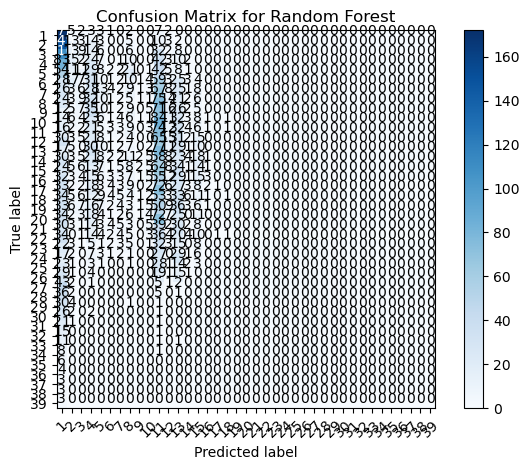

In [232]:
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

display(y_test_1950)
display(X_rf_pred_1950)

print("Confusion Matrix:")
print(confusion_matrix(y_test_1950, X_rf_pred_1950))
print()

print("Accuracy: {}".format(accuracy_score(y_test_1950, X_rf_pred_1950)))

# Compute confusion matrix
cm = confusion_matrix(y_test_1950, X_rf_pred_1950)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plot the confusion matrix
class_names = label_encoder.classes_
plot_confusion_matrix(cm, classes=class_names, title='Confusion Matrix for Random Forest')
plt.show()

In [220]:
X_test_1950

array([[2.74881517e-01, 1.57894737e-01, 5.58823529e-01, ...,
        0.00000000e+00, 0.00000000e+00, 3.60000000e+01],
       [2.14454976e-01, 0.00000000e+00, 3.52941176e-01, ...,
        0.00000000e+00, 0.00000000e+00, 2.90000000e+01],
       [7.41706161e-01, 2.39234450e-02, 4.11764706e-01, ...,
        0.00000000e+00, 0.00000000e+00, 3.30000000e+01],
       ...,
       [3.55450237e-02, 9.56937799e-03, 1.76470588e-01, ...,
        0.00000000e+00, 0.00000000e+00, 2.00000000e+01],
       [1.42180095e-02, 6.69856459e-02, 2.64705882e-01, ...,
        0.00000000e+00, 0.00000000e+00, 2.20000000e+01],
       [1.70616114e-01, 8.13397129e-02, 7.35294118e-01, ...,
        0.00000000e+00, 0.00000000e+00, 2.70000000e+01]])

In [221]:
import numpy as np

# Angenommen, X_test_1950 ist ein numpy Array und die letzte Spalte enthält die max_drivers
# Extrahiere die max_drivers-Spalte aus X_test_1950
max_drivers = X_test_1950[:, -1]

# Konvertiere die Vorhersagen zu einem numpy Array, falls sie es nicht bereits sind
predictions = np.array(X_rf_pred_1950)

# Zähle die Vorhersagen, die größer sind als die maximale Anzahl an Fahrern
out_of_bounds_count = np.sum(predictions > max_drivers)

# Ausgabe der Anzahl der Vorhersagen außerhalb des Rasters
print(f"Anzahl der Vorhersagen außerhalb des Rasters: {out_of_bounds_count}")

Anzahl der Vorhersagen außerhalb des Rasters: 0


baseline hat RMSE von 4,9 lul

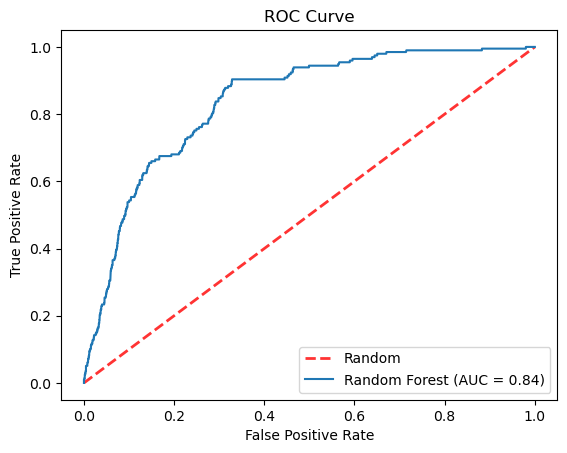

Thresholds: [       inf 0.07503178 0.07475725 ... 0.02745452 0.02732633 0.02729198]


In [861]:

from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Berechne die Klassenwahrscheinlichkeiten (Confidences) für das Test-Set
proba_for_each_class = random_forest.predict_proba(X_test_1950)

# Berechne die ROC-Kurve
fpr, tpr, thresholds = roc_curve(y_test_1950, proba_for_each_class[:, 1], pos_label=1)

# Berechne die AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot die Linie für zufälliges Raten
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8)

# Plot die ROC-Kurve für den Classifier
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')

# Zeige den Plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Zeige die Schwellenwerte
print("Thresholds:", thresholds)

In [103]:
#RMSE for XG- Boost
from sklearn.metrics import mean_squared_error
from math import sqrt

x_mse_xg_1950 = mean_squared_error(y_test_1950, X_pred_xg_1950)
print("Mean Squared Error:", x_mse_xg_1950)
print("Root Mean Squared Error:", sqrt(x_mse_xg_1950))

#RMSE for XGB with Successive Halving
x_mse_xg_sh_1950 = mean_squared_error(y_test_1950, X_xgb_sh_pred_1950)
print("Mean Squared Error SH:", x_mse_xg_sh_1950)
print("Root Mean Squared Error SH:", sqrt(x_mse_xg_sh_1950))

#RMSE for XG-Boost with Random Search
x_mse_xg_rs_1950= mean_squared_error(y_test_1950, X_xgb_rs_pred_1950)
print("Mean Squared Error RS:", x_mse_xg_rs_1950)
print("Root Mean Squared Error RS:", sqrt(x_mse_xg_rs_1950))
#Best


Mean Squared Error: 62.584019769357496
Root Mean Squared Error: 7.9110062425305605
Mean Squared Error SH: 61.35152388797364
Root Mean Squared Error SH: 7.832721359015246
Mean Squared Error RS: 59.02944810543657
Root Mean Squared Error RS: 7.683062417124865


## Ensembles

In [108]:
#Dauert 65 Min und 45 sek

#Stacking Example for XG-Boost and Random Forrest

from sklearn.tree import DecisionTreeClassifier #Meta Learner
from sklearn.preprocessing import LabelEncoder

# Stacking: scikit-learn has no implementation for Stacking. You can use this -> https://rasbt.gith2ub.io/mlxtend/
# HINT: mlxtend can only work with numerical labels. You can use the LabelEncoder to transform your labels.

from mlxtend.classifier import StackingClassifier
#Pick the the two best classifiers with best found hyperparameters
estimators = {'RandomForrest with Successive Halving': rsh_rf_1950, 'XG Boost Classifier with Halving Random Search': random_search} #Possible to extend to even more classifiers

ensemble = StackingClassifier(
    classifiers=list(estimators.values()),
    meta_classifier=DecisionTreeClassifier()
)
estimators['Stacking'] = ensemble

for e_name, e in estimators.items():
    evaluate_classifier(e_name, e, X_train_1950, y_train_1950, X_test_1950, y_test_1950)

RandomForrest with Successive Halving: ACC=0.10 RandomForrest with Successive Halving: RMSE=7.62
XG Boost Classifier with Halving Random Search: ACC=0.09 XG Boost Classifier with Halving Random Search: RMSE=7.68


/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Stacking: ACC=0.09 Stacking: RMSE=7.70


Keine Verbesserung --> Verscuh einer LogisticRegression oder GradientBoostingClassifier

Vielleicht Overfitten bzw Underfitten meine Modelle auch 

Hyperparameter optimization des Ensembles, 

# Model 3 - 2003 - 2024



## Load Data

In [413]:
	
X_train = pd.read_csv('../data/train/train.csv')
y_train = pd.read_csv('../data/train/train_labels.csv')

X_test = pd.read_csv('../data/test/test.csv')
y_test = pd.read_csv('../data/test/test_labels.csv')


In [414]:
# Filter X_train and X_test for entries where the year is fewer than 2018
X_train_2003 = X_train[X_train["year"] >= 2003]
X_test_2003 = X_test[X_test["year"] >= 2003]

# Filter y_train and y_test based on the same condition applied to X_train and X_test
y_train_2003 = Y_train[X_train["year"] >= 2003]
y_test_2003 = Y_test[X_test["year"] >= 2003]

# Print the shapes of the filtered datasets
print("X_train_2018 shape:", X_train_2003.shape)
print("X_test_2018 shape:", X_test_2003.shape)
print("y_train_2018 shape:", y_train_2003.shape)
print("y_test_2018 shape:", y_test_2003.shape)

X_train_2018 shape: (7131, 80)
X_test_2018 shape: (1779, 80)
y_train_2018 shape: (7131, 1)
y_test_2018 shape: (1779, 1)


In [415]:
# Drop specified columns from train and test datasets
columns_to_drop = ['resultId', 'raceId', 'race_name','number', 'race_time', 'fp1_date', 'fp2_date','fp3_date', 'fp1_time', 'fp2_time', 'fp3_time', 'quali_time', 'quali_date', 'race_location', 'race_country', 'driver_code']

X_train_2003 = X_train_2003.drop(columns=columns_to_drop)
X_test_2003 = X_test_2003.drop(columns=columns_to_drop)


In [416]:
#droppe bitte alle zeilen von min_pit_stop_duration bis fp3_avg_is_on_fresh_tyres
X_train_2003 = X_train_2003.drop(columns=X_train_2003.loc[:, 'min_pit_stop_duration':'fp3_avg_is_on_fresh_tyres'].columns)
X_test_2003 = X_test_2003.drop(columns=X_test_2003.loc[:, 'min_pit_stop_duration':'fp3_avg_is_on_fresh_tyres'].columns)

### Calculate Driver Age

In [417]:
from datetime import datetime

#Calculate Age for Train: 
X_train_2003['race_date'] = pd.to_datetime(X_train_2003['race_date'])
X_train_2003['driver_dob'] = pd.to_datetime(X_train_2003['driver_dob'])

X_train_2003['age'] = X_train_2003.apply(lambda row: row['race_date'].year - row['driver_dob'].year - ((row['race_date'].month, row['race_date'].day) < (row['driver_dob'].month, row['driver_dob'].day)), axis=1)

X_train_2003 = X_train_2003.drop(columns=['driver_dob'])
X_train_2003 = X_train_2003.drop(columns=['race_date'])

# Calculate Age for Test
X_test_2003['race_date'] = pd.to_datetime(X_test_2003['race_date'])
X_test_2003['driver_dob'] = pd.to_datetime(X_test_2003['driver_dob'])

X_test_2003['age'] = X_test_2003.apply(lambda row: row['race_date'].year - row['driver_dob'].year - ((row['race_date'].month, row['race_date'].day) < (row['driver_dob'].month, row['driver_dob'].day)), axis=1)

X_test_2003 = X_test_2003.drop(columns=['driver_dob'])
X_test_2003 = X_test_2003.drop(columns=['race_date'])

In [418]:
def race_time_to_milliseconds(race_time_str):
    """
    Converts a Formula 1 race time string (e.g., "1:20.8888") to milliseconds.

    Parameters:
        race_time_str (str): Race time as a string in the format "M:SS.ssss".

    Returns:
        float: Race time in milliseconds.
    """
    if not isinstance(race_time_str, str):
        return np.nan
    try:
        # Split the string into minutes and seconds
        minutes, seconds = race_time_str.split(":")
        
        # Convert minutes to milliseconds
        minutes_ms = int(minutes) * 60 * 1000
        
        # Convert seconds (with fractional part) to milliseconds
        seconds_ms = float(seconds) * 1000
        
        # Total milliseconds
        total_ms = minutes_ms + seconds_ms
        
        return total_ms
    except Exception as e:
        raise ValueError(f"Invalid race time format: {race_time_str}") from e

In [419]:
def n_to_nan(x):
    if x == "\\N":
        return np.nan
    return x

In [420]:
X_train_2003 = X_train_2003.apply(lambda x: x.apply(n_to_nan))

X_test_2003 = X_test_2003.apply(lambda x: x.apply(n_to_nan))

In [421]:
def impute_times(df):
    df['q2'] = df['q2'].fillna(df['q1'])
    df['q3'] = df['q3'].fillna(df['q2'])
    return df


# Wende die Funktion auf die Trainings- und Testdaten an
X_train_2003 = impute_times(X_train_2003)
X_test_2003 = impute_times(X_test_2003)

In [422]:

X_train_2003["q1"] = X_train_2003["q1"].apply(race_time_to_milliseconds)
X_train_2003["q2"] = X_train_2003["q2"].apply(race_time_to_milliseconds)
X_train_2003["q3"] = X_train_2003["q3"].apply(race_time_to_milliseconds)

X_test_2003["q1"] = X_test_2003["q1"].apply(race_time_to_milliseconds)
X_test_2003["q2"] = X_test_2003["q2"].apply(race_time_to_milliseconds)
X_test_2003["q3"] = X_test_2003["q3"].apply(race_time_to_milliseconds)

### Creation of a maximal_driver attribute

In [423]:
# Füge die Zielvariable zu den Features hinzu
X_train_2003 = X_train_2003.join(y_train_2003)
X_test_2003 = X_test_2003.join(y_test_2003)

# Kombiniere die Trainings- und Testdaten
X_combined = pd.concat([X_train_2003, X_test_2003], keys=['train', 'test'])

# Bestimme die maximale Anzahl an Fahrern pro Jahr
max_drivers_per_year = X_combined.groupby('year')['positionOrder'].max().reset_index()
max_drivers_per_year.columns = ['year', 'max_drivers']

# Füge das neue Attribut zu den kombinierten Daten hinzu
X_combined = pd.merge(X_combined.reset_index(), max_drivers_per_year, on='year', how='left')

# Splitte die kombinierten Daten wieder in Trainings- und Testdatensätze
X_train_2003 = X_combined[X_combined['level_0'] == 'train'].drop(columns=['level_0', 'level_1']).reset_index(drop=True)
X_test_2003 = X_combined[X_combined['level_0'] == 'test'].drop(columns=['level_0', 'level_1']).reset_index(drop=True)

# Entferne die 'positionOrder'-Spalte aus den Features
X_train_2003 = X_train_2003.drop(columns=['positionOrder'])
X_test_2003 = X_test_2003.drop(columns=['positionOrder'])

# Ausgabe zur Überprüfung
print("X_train_2003:")
print(X_train_2003)
print("\nX_test_2003:")
print(X_test_2003)

X_train_2003:
      driverId  constructorId  grid  year  round  circuitId  race_lat  \
0           17              9     6  2010      1          3   26.0325   
1          813              3     8  2011      6          6   43.7347   
2            3              3    11  2007      4          4   41.5700   
3           30              6     7  2003      3         18  -23.7036   
4            1              1     3  2011     15         22   34.8431   
...        ...            ...   ...   ...    ...        ...       ...   
7126        13              6     1  2008      6          6   43.7347   
7127        13              6     3  2006     12         10   49.3278   
7128        20              9     3  2014      4         17   31.3389   
7129        33             13    18  2006      9          7   45.5000   
7130         8            208     5  2012     16         35   34.7333   

       race_lng  race_alt        q1        q2        q3 driver_nationality  \
0      50.51060         7  1152

## Encoding

In [424]:
# Encode object columns with OneHotEncoder
object_columns = X_train_2003.select_dtypes(include=['object']).columns



from sklearn import preprocessing
encoderOH = preprocessing.OneHotEncoder()
encoded_train_2003 = pd.DataFrame(encoderOH.fit_transform(X_train_2003[object_columns]).toarray(), columns=encoderOH.get_feature_names_out(object_columns))
encoded_test_2003 = pd.DataFrame(encoderOH.transform(X_test_2003[object_columns]).toarray(), columns=encoderOH.get_feature_names_out(object_columns))

# Drop original object columns and join encoded columns
X_train_2003 = X_train_2003.drop(columns=object_columns).join(encoded_train_2003)
X_test_2003 = X_test_2003.drop(columns=object_columns).join(encoded_test_2003)

In [425]:
display(object_columns)

Index(['driver_nationality'], dtype='object')

In [426]:
#checke ob driverId ein integer ist 
X_train_2003.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7131 entries, 0 to 7130
Data columns (total 46 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   driverId                          7131 non-null   int64  
 1   constructorId                     7131 non-null   int64  
 2   grid                              7131 non-null   int64  
 3   year                              7131 non-null   int64  
 4   round                             7131 non-null   int64  
 5   circuitId                         7131 non-null   int64  
 6   race_lat                          7131 non-null   float64
 7   race_lng                          7131 non-null   float64
 8   race_alt                          7131 non-null   int64  
 9   q1                                7023 non-null   float64
 10  q2                                7023 non-null   float64
 11  q3                                7023 non-null   float64
 12  age   

In [427]:
# Ändere die Form der Zielvariable
y_train_2003 = y_train_2003.values.ravel()
y_test_2003 = y_test_2003.values.ravel()

In [428]:
label_encoder = preprocessing.LabelEncoder().fit(y_train_2003)
y_train_2003 = label_encoder.fit_transform(y_train_2003)
y_test_2003 = label_encoder.transform(y_test_2003)

In [429]:
label_encoder.classes_

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [430]:
import numpy as np

unique_values = np.unique(y_train_2003)
print(unique_values)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [433]:
X_test_2003.head()

,driverId,constructorId,grid,year,round,circuitId,race_lat,race_lng,race_alt,q1,q2,q3,age,max_drivers,driver_nationality_American,driver_nationality_Argentinian,driver_nationality_Australian,driver_nationality_Austrian,driver_nationality_Belgian,driver_nationality_Brazilian,driver_nationality_British,driver_nationality_Canadian,driver_nationality_Chinese,driver_nationality_Colombian,driver_nationality_Danish,driver_nationality_Dutch,driver_nationality_Finnish,driver_nationality_French,driver_nationality_German,driver_nationality_Hungarian,driver_nationality_Indian,driver_nationality_Indonesian,driver_nationality_Irish,driver_nationality_Italian,driver_nationality_Japanese,driver_nationality_Mexican,driver_nationality_Monegasque,driver_nationality_New Zealander,driver_nationality_Polish,driver_nationality_Portuguese,driver_nationality_Russian,driver_nationality_Spanish,driver_nationality_Swedish,driver_nationality_Swiss,driver_nationality_Thai,driver_nationality_Venezuelan
0,852,213,15,2023,7,4,41.5700,2.26111,109,73862.0,74477.0,74477.0,23,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15,7,3,2005,16,13,50.4372,5.97139,401,106596.0,106596.0,106596.0,31,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,27,18,18,2005,9,19,39.7950,-86.23470,223,73632.0,73632.0,73632.0,26,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,17,3,14,2005,8,7,45.5000,-73.52280,13,77749.0,77749.0,77749.0,28,20,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,39,164,24,2011,3,17,31.3389,121.22000,5,100445.0,100445.0,100445.0,34,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Normalisation

In [434]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Speichere die max_drivers-Spalte und entferne sie vor der Skalierung
max_drivers_train = X_train_2003['max_drivers'].values.reshape(-1, 1)
max_drivers_test = X_test_2003['max_drivers'].values.reshape(-1, 1)
X_train_2003 = X_train_2003.drop(columns=['max_drivers'])
X_test_2003 = X_test_2003.drop(columns=['max_drivers'])

# Skaliere die restlichen Features
min_max_scaler = MinMaxScaler()
X_train_2003_scaled = min_max_scaler.fit_transform(X_train_2003)
X_test_2003_scaled = min_max_scaler.transform(X_test_2003)

# Füge die max_drivers-Spalte wieder hinzu
X_train_2003 = np.hstack((X_train_2003_scaled, max_drivers_train))
X_test_2003 = np.hstack((X_test_2003_scaled, max_drivers_test))

In [407]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
min_max_scaler = MinMaxScaler()
X_train_2003 = min_max_scaler.fit_transform(X_train_2003)
X_test_2003 = min_max_scaler.transform(X_test_2003)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- driver_nationality
Feature names seen at fit time, yet now missing:
- driver_nationality_American
- driver_nationality_Argentinian 
- driver_nationality_Australian
- driver_nationality_Austrian
- driver_nationality_Belgian
- ...


In [435]:
X_train_2003

array([[1.86046512e-02, 3.73831776e-02, 2.50000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 2.40000000e+01],
       [9.44186047e-01, 9.34579439e-03, 3.33333333e-01, ...,
        0.00000000e+00, 1.00000000e+00, 2.40000000e+01],
       [2.32558140e-03, 9.34579439e-03, 4.58333333e-01, ...,
        0.00000000e+00, 0.00000000e+00, 2.20000000e+01],
       ...,
       [2.20930233e-02, 3.73831776e-02, 1.25000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 2.20000000e+01],
       [3.72093023e-02, 5.60747664e-02, 7.50000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 2.20000000e+01],
       [8.13953488e-03, 9.67289720e-01, 2.08333333e-01, ...,
        0.00000000e+00, 0.00000000e+00, 2.40000000e+01]])

## Learn Modell

### Random Forrest

In [436]:
#Try random forest classifier
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(max_depth=2, random_state=0) #Modell initialisieren
random_forest.fit(X_train_2003, y_train_2003) #Lernvorgang des Modells



RandomForestClassifier(max_depth=2, random_state=0)

In [437]:
# Vorhersagen mit dem RandomForestClassifier auf df1_test_preprocessed
X_rf_pred_2003 = random_forest.predict(X_test_2003)

# Zeige die Vorhersagen
print(X_rf_pred_2003)

[15  0 14 ...  0 17  4]


#### Hyperparameter Obtimization via successive halving

with k- cross fold validation

In [441]:
#Dauert 2 min 24 sek

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from math import sqrt
from sklearn.metrics import classification_report
#import HalvingRandomSearchCV
from sklearn.model_selection import HalvingRandomSearchCV

#Hyperparameter tuning thourgh successive halving 
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [0.5,0.75, 'sqrt', 'log2', None]
}
kf = KFold(n_splits=5, shuffle=True, random_state=42)



rsh_rf_2003 = HalvingRandomSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist_rf,
    factor=2,
    random_state=42,
    cv=kf
)

rsh_rf_2003.fit(X_train_2003, y_train_2003)

# Beste Parameter und Score
print("Beste Parameter für Random Forest:", rsh_rf_2003.best_params_)
print("Bester Score für Random Forest:", rsh_rf_2003.best_score_)

# Vorhersagen und Bewertung
X_rf_sh_pred_2003 = rsh_rf_2003.predict(X_test_2003)
print("Classification Report für Random Forest:")
print(classification_report(y_test_2003, X_rf_sh_pred_2003, target_names=label_encoder.classes_.astype(str), zero_division=0))

#RMSE der prediction
from sklearn.metrics import mean_squared_error
x_mse_sh_2003 = mean_squared_error(y_test_2003, X_rf_sh_pred_2003)
print("Mean Squared Error:", x_mse_sh_2003)
print("Root Mean Squared Error:", sqrt(x_mse_sh_2003))

Beste Parameter für Random Forest: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 30}
Bester Score für Random Forest: 0.10479580888744025
Classification Report für Random Forest:
              precision    recall  f1-score   support

           1       0.49      0.57      0.53        79
           2       0.19      0.20      0.19        87
           3       0.17      0.22      0.19        81
           4       0.17      0.21      0.19        86
           5       0.09      0.12      0.10        82
           6       0.12      0.12      0.12        83
           7       0.06      0.09      0.07        79
           8       0.06      0.05      0.06        92
           9       0.05      0.05      0.05        83
          10       0.01      0.01      0.01        81
          11       0.10      0.09      0.09        93
          12       0.10      0.11      0.11        79
          13       0.06      0.07      0.07        85
      

In [ ]:
import numpy as np

unique_values_y_test_1950 = np.unique(y_test_1950)
print(unique_values_y_test_1950)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]


In [ ]:
unique_values_y_train_1950 = np.unique(y_train_1950)
print(unique_values_y_train_1950)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]


In [ ]:
#manche klassen werden nicht vorhergesagt
unique_values_pred_1950 = np.unique(X_rf_sh_pred_1950)
print(unique_values_pred_1950)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 37]


PLätze 36,37 und 39 wird nicht vorhergesagt. Deswegen gibt es dafür keine precision oder recall werte --> ANpassung durch parameter zero_division bei division report

#### Hyperparameter Tuning via Grid Search

In [442]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error
from math import sqrt


# Definiere K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Führe K-Fold Cross-Validation auf dem Trainings-Set durch und berechne die Scores
scores = cross_val_score(random_forest, X_train_2003, y_train_2003, cv=skf, scoring='neg_mean_squared_error')

# Berechne den durchschnittlichen MSE und RMSE auf dem Trainings-Set
mean_mse = -scores.mean()
mean_rmse = sqrt(mean_mse)

print("Mean Squared Error (MSE) auf dem Trainings-Set:", mean_mse)
print("Root Mean Squared Error (RMSE) auf dem Trainings-Set:", mean_rmse)

# Hyperparameter-Tuning mit GridSearchCV und K-Fold Cross-Validation
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error')
grid_search.fit(X_train_2003, y_train_2003)

# Beste Hyperparameter und Score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print("Beste Hyperparameter:", best_params)
print("Bester MSE auf dem Trainings-Set:", best_score)

# Trainiere das Modell mit den besten Hyperparametern auf dem gesamten Trainings-Set
best_model = grid_search.best_estimator_
best_model.fit(X_train_2003, y_train_2003)

# Mache Vorhersagen auf dem Test-Set
X_rf_gs_pred_2003 = best_model.predict(X_test_2003)

# Berechne den MSE und RMSE auf dem Test-Set
gs_mse = mean_squared_error(y_test_2003, X_rf_gs_pred_2003)
gs_rmse = sqrt(gs_mse)

print("Mean Squared Error (MSE) auf dem Test-Set:", gs_mse)
print("Root Mean Squared Error (RMSE) auf dem Test-Set:", gs_rmse)

Mean Squared Error (MSE) auf dem Trainings-Set: 39.73210061221622
Root Mean Squared Error (RMSE) auf dem Trainings-Set: 6.303340432835293
Beste Hyperparameter: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Bester MSE auf dem Trainings-Set: 31.804680028817113
Mean Squared Error (MSE) auf dem Test-Set: 30.58516020236088
Root Mean Squared Error (RMSE) auf dem Test-Set: 5.530385176672677


### XG Boost

In [ ]:
# XGBoost trainieren
import xgboost as xgb

clf_xg_2003 = xgb.XGBClassifier(random_state=42)
clf_xg_2003.fit(X_train_2003, y_train_2003)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
#predicten des obigen classifiers
X_pred_xg_2003 = clf_xg_2003.predict(X_test_2003)
print(X_pred_xg_2003)

[13  1  3 ...  4 18  7]


#### Successive Halving für XGB


Geht vermutlich nicht, da beim StratKFold klassen herrausgelöscht wurden, die dann nciht merh vorhanden waren.

Möglichkeiten:
1) Tuning via RandomizedSearch oder einer anderen Methode wo keine Kandidaten eliminiert werden (siehe unten)
2) Erhöhe Anzahl der Folds bei StratifiedKFold --> bei erhöhung auf 15+ oversampling funktioniert es
3) Benutze RepeatedStratifiedKFold um Anzahl an Wiederholungen zu erhöhen
4) Verwende Techniken wie Oversampling oder Undersampling  --> BorderlineSmote aber hat Probleme mit NaN Werten in X_train_1950
5) Lasse Cross validation Weg

In [ ]:
# Fitte den LabelEncoder auf die kombinierten Trainings- und Testdaten
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_combined = np.concatenate((y_train_2003, y_test_2003))
label_encoder.fit(y_combined)

# Transformiere die Trainings- und Testdaten
y_train_2003 = label_encoder.transform(y_train_2003)
y_test_2003 = label_encoder.transform(y_test_2003)

In [ ]:
#ZEIGE MIR ALLE UNIQUEN VALUESD VON Y_TRAIN_1950
unique_values_y_train_2003 = np.unique(y_train_2003)
print(unique_values_y_train_2003)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]


In [ ]:
# Berechne die Anzahl der Stichproben für jede Klasse
unique_classes, class_counts = np.unique(y_train_2003, return_counts=True)

# Sortiere die Klassen nach Häufigkeit und wähle die 10 seltensten Klassen aus
sorted_classes = unique_classes[np.argsort(class_counts)[:10]]

# Filtere die Klassen, die tatsächlich in den Trainingsdaten vorhanden sind
present_classes = [cls for cls in sorted_classes if cls in unique_classes]

# Definiere das Sampling-Strategie-Dictionary nur für die 10 seltensten Klassen, die vorhanden sind
max_class_count = max(class_counts)

#### Try mit RepeatedStratifiedKFold

In [ ]:
#Dauert so 16 min
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
import xgboost as xgb
from sklearn.model_selection import RepeatedStratifiedKFold

# Successive Halving Hyperparameter Tuning for XGBoost

clf_xg_sh_2003 = xgb.XGBClassifier(random_state=42)

# Definiere den Parameter-Raster
param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}


rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

# Führe die Halving Random Search durch
rsh_xgb_2003 = HalvingRandomSearchCV(
    estimator=clf_xg_sh_1950, param_distributions=param_dist_xgb, factor=2, random_state=42, cv=rskf
)

rsh_xgb_2003.fit(X_train_2003, y_train_2003)

# Beste Parameter und Score
print("Beste Parameter für XGBoost:", rsh_xgb_2003.best_params_)
print("Bester Score für XGBoost:", rsh_xgb_2003.best_score_)

# Vorhersagen und Bewertung
X_xgb_sh_pred_2003 = rsh_xgb_2003.predict(X_test_2003)
print("Classification Report für XGBoost:")
print(classification_report(y_test_2003, X_xgb_sh_pred_2003, target_names=label_encoder.classes_.astype(str), zero_division=0))

/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
176 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
  File "/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/xgboost/sklearn.py", line 1491, in fit
    raise ValueError(
ValueError: Invalid 

Beste Parameter für XGBoost: {'subsample': 0.9, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.9}
Bester Score für XGBoost: 0.1060598682593072
Classification Report für XGBoost:
              precision    recall  f1-score   support

           0       0.30      0.56      0.39       197
           1       0.18      0.37      0.25       202
           2       0.09      0.17      0.11       200
           3       0.07      0.20      0.10       199
           4       0.08      0.12      0.10       195
           5       0.09      0.11      0.10       205
           6       0.09      0.02      0.04       204
           7       0.06      0.05      0.06       206
           8       0.11      0.00      0.01       206
           9       0.06      0.08      0.07       206
          10       0.06      0.12      0.08       194
          11       0.08      0.13      0.10       202
          12       0.07      0.08      0.07       202
          13       0.05      0

#### Randomized Search for XGB

In [ ]:
# dauert 27 min 50 sek
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, mean_squared_error
from math import sqrt

# Initialisiere den XGBoost Classifier
xgb_1950 = xgb.XGBClassifier(random_state=42)

# Hyperparameter-Raum
param_dist_xgb = {
    'n_estimators': [50, 100, 200, 400],
    'max_depth': [5, 8, 10, 12],
    'learning_rate': [ 0.05, 0.1, 0.2],
    'subsample': [0.6,0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Definiere K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# RandomizedSearchCV mit K-Fold Cross-Validation
random_search = RandomizedSearchCV(
    estimator=xgb_1950, param_distributions=param_dist_xgb, n_iter=50, cv=skf, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1
)

# Modelltraining
random_search.fit(X_train_1950, y_train_1950)

# Beste Parameter und Score
print("Beste Parameter:", random_search.best_params_)
print("Bester Score:", -random_search.best_score_)

# Beim Classification Report kann noch noch der Parameter zero_division hinzugefügt werden um das Verhalten bei undefinierten Präzisions- und Recall Werten zu steuern
# Vorhersagen und Bewertung
X_xgb_rs_pred_1950 = random_search.predict(X_test_1950)
X_xgb_rs_pred_1950_original = label_encoder.inverse_transform(X_xgb_rs_pred_1950)
print("Classification Report:")
print(classification_report(y_test_1950, X_xgb_rs_pred_1950_original))

# Berechne den RMSE auf dem Test-Set
test_mse_1950 = mean_squared_error(y_test_1950, X_xgb_rs_pred_1950)
test_rmse_1950 = sqrt(test_mse_1950)
print("Root Mean Squared Error (RMSE) auf dem Test-Set:", test_rmse_1950)

/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Beste Parameter: {'subsample': 0.6, 'n_estimators': 100, 'max_depth': 12, 'learning_rate': 0.05, 'colsample_bytree': 0.6}
Bester Score: 60.04701215318752
Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.50      0.39       197
           1       0.15      0.23      0.18       202
           2       0.13      0.20      0.16       200
           3       0.07      0.10      0.08       199
           4       0.12      0.15      0.13       195
           5       0.08      0.11      0.09       205
           6       0.07      0.07      0.07       204
           7       0.06      0.05      0.05       206
           8       0.04      0.03      0.04       206
           9       0.07      0.08      0.08       206
          10       0.05      0.05      0.05       194
          11       0.06      0.06      0.06       202
          12       0.06      0.05      0.05       202
          13       0.05      0.05      0.05       201
          14

/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

### Gradient Boost

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Erstelle eine Pipeline mit einem Imputer und dem GradientBoostingClassifier
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('gbc', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
])

# Modell trainieren
pipeline.fit(X_train_1950, y_train_1950)

# Vorhersagen auf Testdaten
X_pred_gb_1950 = pipeline.predict(X_test_1950)

# Klassifikationsbericht ausgeben
print(classification_report(y_test_1950, X_pred_gb_1950, target_names=label_encoder.classes_.astype(str), zero_division=0))

              precision    recall  f1-score   support

           1       0.31      0.49      0.38       197
           2       0.14      0.24      0.18       202
           3       0.11      0.17      0.13       200
           4       0.07      0.12      0.09       199
           5       0.09      0.17      0.12       195
           6       0.06      0.09      0.07       205
           7       0.08      0.05      0.06       204
           8       0.06      0.06      0.06       206
           9       0.06      0.04      0.05       206
          10       0.06      0.10      0.08       206
          11       0.05      0.09      0.06       194
          12       0.07      0.07      0.07       202
          13       0.06      0.06      0.06       202
          14       0.02      0.01      0.01       201
          15       0.03      0.03      0.03       198
          16       0.07      0.03      0.04       194
          17       0.07      0.03      0.04       195
          18       0.08    

In [ ]:
# Berechnung des mse der prediction 
from sklearn.metrics import mean_squared_error
x_mse_gb_1950 = mean_squared_error(y_test_1950, X_pred_gb_1950)
print("Mean Squared Error GB 1950:", x_mse_gb_1950)

#Ich möcbte aber den RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
print("Root Mean Squared Error GB 1950:", sqrt(x_mse_gb_1950))

Mean Squared Error GB 1950: 63.911037891268535
Root Mean Squared Error GB 1950: 7.994437934668611


### Hist Gradient Boosting

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report

# GradientBoostingClassifier initialisieren
hgbc1950 = HistGradientBoostingClassifier(max_iter=100, learning_rate=0.1, max_depth=3, random_state=42)

# Modell trainieren
hgbc1950.fit(X_train_1950, y_train_1950)

# Vorhersagen auf Testdaten
X_pred_hgb_1950 = hgbc1950.predict(X_test_1950)

# Klassifikationsbericht ausgeben
print(classification_report(y_test_1950, X_pred_hgb_1950, target_names=label_encoder.classes_.astype(str), zero_division=0))

              precision    recall  f1-score   support

           1       0.28      0.49      0.36       197
           2       0.18      0.36      0.24       202
           3       0.08      0.09      0.08       200
           4       0.07      0.23      0.11       199
           5       0.08      0.13      0.10       195
           6       0.08      0.12      0.10       205
           7       0.04      0.00      0.01       204
           8       0.05      0.03      0.04       206
           9       0.09      0.01      0.02       206
          10       0.06      0.06      0.06       206
          11       0.06      0.12      0.08       194
          12       0.08      0.08      0.08       202
          13       0.04      0.06      0.05       202
          14       0.04      0.02      0.03       201
          15       0.04      0.06      0.05       198
          16       0.07      0.05      0.05       194
          17       0.06      0.04      0.05       195
          18       0.09    

In [ ]:
# Berechnung des mse der prediction 
from sklearn.metrics import mean_squared_error
x_mse_hgb_1950 = mean_squared_error(y_test_1950, X_pred_hgb_1950)
print("Mean Squared Error HGB 1950:", x_mse_hgb_1950)

#Ich möcbte aber den RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
print("Root Mean Squared Error HGB 1950:", sqrt(x_mse_hgb_1950))

Mean Squared Error HGB 1950: 71.72817133443164
Root Mean Squared Error HGB 1950: 8.469248569644867


## Evaluation

### Standard Random forrest

In [438]:
# Berechnung des mse der prediction 
from sklearn.metrics import mean_squared_error
x_mse_2003 = mean_squared_error(y_test_2003, X_rf_pred_2003)
print("Mean Squared Error:", x_mse_2003)

#Ich möcbte aber den RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
print("Root Mean Squared Error:", sqrt(x_mse_2003))


Mean Squared Error: 40.12928611579539
Root Mean Squared Error: 6.334768039620345


In [ ]:
# Zeige alle Werte in X_rf_pred_1950 mit einem Wert von über 18
values_over_18 = X_rf_pred_2003[X_rf_pred_2003 > 17]
print(values_over_18)

#Das Modell predicted nur Werte von 1-17...

[17 17 17 17]


array([ 6, 10, 15, ...,  7, 17, 19])

array([10,  3,  3, ...,  0,  8, 12])

Confusion Matrix:
[[172   5   2 ...   0   0   0]
 [149  13   3 ...   0   0   0]
 [110  13   9 ...   0   0   0]
 ...
 [  3   0   0 ...   0   0   0]
 [  3   0   0 ...   0   0   0]
 [  3   0   0 ...   0   0   0]]

Accuracy: 0.07742998352553541


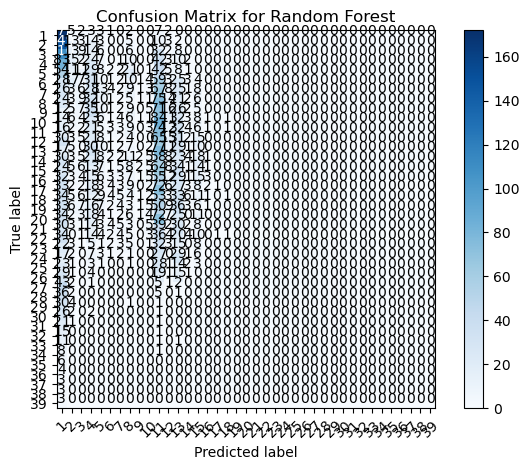

In [ ]:
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

display(y_test_1950)
display(X_rf_pred_1950)

print("Confusion Matrix:")
print(confusion_matrix(y_test_1950, X_rf_pred_1950))
print()

print("Accuracy: {}".format(accuracy_score(y_test_1950, X_rf_pred_1950)))

# Compute confusion matrix
cm = confusion_matrix(y_test_1950, X_rf_pred_1950)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plot the confusion matrix
class_names = label_encoder.classes_
plot_confusion_matrix(cm, classes=class_names, title='Confusion Matrix for Random Forest')
plt.show()

In [ ]:
X_test_1950

array([[2.74881517e-01, 1.57894737e-01, 5.58823529e-01, ...,
        0.00000000e+00, 0.00000000e+00, 3.60000000e+01],
       [2.14454976e-01, 0.00000000e+00, 3.52941176e-01, ...,
        0.00000000e+00, 0.00000000e+00, 2.90000000e+01],
       [7.41706161e-01, 2.39234450e-02, 4.11764706e-01, ...,
        0.00000000e+00, 0.00000000e+00, 3.30000000e+01],
       ...,
       [3.55450237e-02, 9.56937799e-03, 1.76470588e-01, ...,
        0.00000000e+00, 0.00000000e+00, 2.00000000e+01],
       [1.42180095e-02, 6.69856459e-02, 2.64705882e-01, ...,
        0.00000000e+00, 0.00000000e+00, 2.20000000e+01],
       [1.70616114e-01, 8.13397129e-02, 7.35294118e-01, ...,
        0.00000000e+00, 0.00000000e+00, 2.70000000e+01]])

In [ ]:
import numpy as np

# Angenommen, X_test_1950 ist ein numpy Array und die letzte Spalte enthält die max_drivers
# Extrahiere die max_drivers-Spalte aus X_test_1950
max_drivers = X_test_1950[:, -1]

# Konvertiere die Vorhersagen zu einem numpy Array, falls sie es nicht bereits sind
predictions = np.array(X_rf_pred_1950)

# Zähle die Vorhersagen, die größer sind als die maximale Anzahl an Fahrern
out_of_bounds_count = np.sum(predictions > max_drivers)

# Ausgabe der Anzahl der Vorhersagen außerhalb des Rasters
print(f"Anzahl der Vorhersagen außerhalb des Rasters: {out_of_bounds_count}")

Anzahl der Vorhersagen außerhalb des Rasters: 0


baseline hat RMSE von 4,9 lul

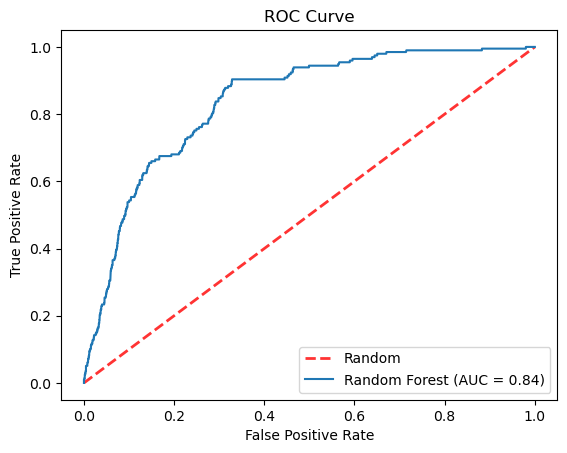

Thresholds: [       inf 0.07503178 0.07475725 ... 0.02745452 0.02732633 0.02729198]


In [ ]:

from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Berechne die Klassenwahrscheinlichkeiten (Confidences) für das Test-Set
proba_for_each_class = random_forest.predict_proba(X_test_1950)

# Berechne die ROC-Kurve
fpr, tpr, thresholds = roc_curve(y_test_1950, proba_for_each_class[:, 1], pos_label=1)

# Berechne die AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot die Linie für zufälliges Raten
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8)

# Plot die ROC-Kurve für den Classifier
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')

# Zeige den Plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Zeige die Schwellenwerte
print("Thresholds:", thresholds)

In [ ]:
#RMSE for XG- Boost
from sklearn.metrics import mean_squared_error
from math import sqrt

x_mse_xg_1950 = mean_squared_error(y_test_1950, X_pred_xg_1950)
print("Mean Squared Error:", x_mse_xg_1950)
print("Root Mean Squared Error:", sqrt(x_mse_xg_1950))

#RMSE for XGB with Successive Halving
x_mse_xg_sh_1950 = mean_squared_error(y_test_1950, X_xgb_sh_pred_1950)
print("Mean Squared Error SH:", x_mse_xg_sh_1950)
print("Root Mean Squared Error SH:", sqrt(x_mse_xg_sh_1950))

#RMSE for XG-Boost with Random Search
x_mse_xg_rs_1950= mean_squared_error(y_test_1950, X_xgb_rs_pred_1950)
print("Mean Squared Error RS:", x_mse_xg_rs_1950)
print("Root Mean Squared Error RS:", sqrt(x_mse_xg_rs_1950))
#Best


Mean Squared Error: 62.584019769357496
Root Mean Squared Error: 7.9110062425305605
Mean Squared Error SH: 61.35152388797364
Root Mean Squared Error SH: 7.832721359015246
Mean Squared Error RS: 59.02944810543657
Root Mean Squared Error RS: 7.683062417124865


## Ensembles

In [ ]:
#Dauert 65 Min und 45 sek

#Stacking Example for XG-Boost and Random Forrest

from sklearn.tree import DecisionTreeClassifier #Meta Learner
from sklearn.preprocessing import LabelEncoder

# Stacking: scikit-learn has no implementation for Stacking. You can use this -> https://rasbt.gith2ub.io/mlxtend/
# HINT: mlxtend can only work with numerical labels. You can use the LabelEncoder to transform your labels.

from mlxtend.classifier import StackingClassifier
#Pick the the two best classifiers with best found hyperparameters
estimators = {'RandomForrest with Successive Halving': rsh_rf_1950, 'XG Boost Classifier with Halving Random Search': random_search} #Possible to extend to even more classifiers

ensemble = StackingClassifier(
    classifiers=list(estimators.values()),
    meta_classifier=DecisionTreeClassifier()
)
estimators['Stacking'] = ensemble

for e_name, e in estimators.items():
    evaluate_classifier(e_name, e, X_train_1950, y_train_1950, X_test_1950, y_test_1950)

RandomForrest with Successive Halving: ACC=0.10 RandomForrest with Successive Halving: RMSE=7.62
XG Boost Classifier with Halving Random Search: ACC=0.09 XG Boost Classifier with Halving Random Search: RMSE=7.68


/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Stacking: ACC=0.09 Stacking: RMSE=7.70


Keine Verbesserung --> Verscuh einer LogisticRegression oder GradientBoostingClassifier

Vielleicht Overfitten bzw Underfitten meine Modelle auch 

Hyperparameter optimization des Ensembles, 

# Model 4 2011-2024

## Load Data

In [ ]:
	
X_train = pd.read_csv('../data/train/train.csv')
y_train = pd.read_csv('../data/train/train_labels.csv')

X_test = pd.read_csv('../data/test/test.csv')
y_test = pd.read_csv('../data/test/test_labels.csv')


In [ ]:
# Filter X_train and X_test for entries where the year is fewer than 2018
X_train_2011 = X_train[X_train["year"] >= 2011]
X_test_2011 = X_test[X_test["year"] >= 2011]

# Filter y_train and y_test based on the same condition applied to X_train and X_test
y_train_2011 = Y_train[X_train["year"] >= 2011]
y_test_2011 = Y_test[X_test["year"] >= 2011]

# Print the shapes of the filtered datasets
print("X_train_2018 shape:", X_train_2011.shape)
print("X_test_2018 shape:", X_test_2011.shape)
print("y_train_2018 shape:", y_train_2011.shape)
print("y_test_2018 shape:", y_test_2011.shape)

X_train_2018 shape: (7131, 80)
X_test_2018 shape: (1779, 80)
y_train_2018 shape: (7131, 1)
y_test_2018 shape: (1779, 1)


In [ ]:
# Drop specified columns from train and test datasets
columns_to_drop = ['resultId', 'raceId', 'race_name','number', 'race_time', 'fp1_date', 'fp2_date','fp3_date', 'fp1_time', 'fp2_time', 'fp3_time', 'quali_time', 'quali_date', 'race_location', 'race_country', 'driver_code']

X_train_2011 = X_train_2011.drop(columns=columns_to_drop)
X_test_2011 = X_test_2011.drop(columns=columns_to_drop)


In [ ]:
#droppe bitte alle zeilen von min_pit_stop_duration bis fp3_avg_is_on_fresh_tyres
X_train_2011 = X_train_2011.drop(columns=X_train_2011.loc[:, 'q_position':'fp3_avg_is_on_fresh_tyres'].columns)
X_test_2011 = X_test_2011.drop(columns=X_test_2011.loc[:, 'q_position':'fp3_avg_is_on_fresh_tyres'].columns)

### Calculate Driver Age

In [ ]:
from datetime import datetime

#Calculate Age for Train: 
X_train_2011['race_date'] = pd.to_datetime(X_train_2011['race_date'])
X_train_2011['driver_dob'] = pd.to_datetime(X_train_2011['driver_dob'])

X_train_2011['age'] = X_train_2011.apply(lambda row: row['race_date'].year - row['driver_dob'].year - ((row['race_date'].month, row['race_date'].day) < (row['driver_dob'].month, row['driver_dob'].day)), axis=1)

X_train_2011 = X_train_2011.drop(columns=['driver_dob'])
X_train_2011 = X_train_2011.drop(columns=['race_date'])

# Calculate Age for Test
X_test_2011['race_date'] = pd.to_datetime(X_test_2011['race_date'])
X_test_2011['driver_dob'] = pd.to_datetime(X_test_2011['driver_dob'])

X_test_2011['age'] = X_test_2011.apply(lambda row: row['race_date'].year - row['driver_dob'].year - ((row['race_date'].month, row['race_date'].day) < (row['driver_dob'].month, row['driver_dob'].day)), axis=1)

X_test_2011 = X_test_2011.drop(columns=['driver_dob'])
X_test_2011 = X_test_2011.drop(columns=['race_date'])

In [ ]:
def race_time_to_milliseconds(race_time_str):
    """
    Converts a Formula 1 race time string (e.g., "1:20.8888") to milliseconds.

    Parameters:
        race_time_str (str): Race time as a string in the format "M:SS.ssss".

    Returns:
        float: Race time in milliseconds.
    """
    if not isinstance(race_time_str, str):
        return np.nan
    try:
        # Split the string into minutes and seconds
        minutes, seconds = race_time_str.split(":")
        
        # Convert minutes to milliseconds
        minutes_ms = int(minutes) * 60 * 1000
        
        # Convert seconds (with fractional part) to milliseconds
        seconds_ms = float(seconds) * 1000
        
        # Total milliseconds
        total_ms = minutes_ms + seconds_ms
        
        return total_ms
    except Exception as e:
        raise ValueError(f"Invalid race time format: {race_time_str}") from e

In [ ]:
def n_to_nan(x):
    if x == "\\N":
        return np.nan
    return x

In [ ]:
X_train_2011 = X_train_2011.apply(lambda x: x.apply(n_to_nan))

X_test_2011 = X_test_2011.apply(lambda x: x.apply(n_to_nan))

In [ ]:
def impute_times(df):
    df['q2'] = df['q2'].fillna(df['q1'])
    df['q3'] = df['q3'].fillna(df['q2'])
    return df


# Wende die Funktion auf die Trainings- und Testdaten an
X_train_2011 = impute_times(X_train_2011)
X_test_2011 = impute_times(X_test_2011)

In [ ]:

X_train_2011["q1"] = X_train_2011["q1"].apply(race_time_to_milliseconds)
X_train_2011["q2"] = X_train_2011["q2"].apply(race_time_to_milliseconds)
X_train_2011["q3"] = X_train_2011["q3"].apply(race_time_to_milliseconds)

X_test_2011["q1"] = X_test_2011["q1"].apply(race_time_to_milliseconds)
X_test_2011["q2"] = X_test_2011["q2"].apply(race_time_to_milliseconds)
X_test_2011["q3"] = X_test_2011["q3"].apply(race_time_to_milliseconds)

### Creation of a maximal_driver attribute

In [ ]:
# Füge die Zielvariable zu den Features hinzu
X_train_2003 = X_train_2003.join(y_train_2003)
X_test_2003 = X_test_2003.join(y_test_2003)

# Kombiniere die Trainings- und Testdaten
X_combined = pd.concat([X_train_2003, X_test_2003], keys=['train', 'test'])

# Bestimme die maximale Anzahl an Fahrern pro Jahr
max_drivers_per_year = X_combined.groupby('year')['positionOrder'].max().reset_index()
max_drivers_per_year.columns = ['year', 'max_drivers']

# Füge das neue Attribut zu den kombinierten Daten hinzu
X_combined = pd.merge(X_combined.reset_index(), max_drivers_per_year, on='year', how='left')

# Splitte die kombinierten Daten wieder in Trainings- und Testdatensätze
X_train_2003 = X_combined[X_combined['level_0'] == 'train'].drop(columns=['level_0', 'level_1']).reset_index(drop=True)
X_test_2003 = X_combined[X_combined['level_0'] == 'test'].drop(columns=['level_0', 'level_1']).reset_index(drop=True)

# Entferne die 'positionOrder'-Spalte aus den Features
X_train_2003 = X_train_2003.drop(columns=['positionOrder'])
X_test_2003 = X_test_2003.drop(columns=['positionOrder'])

# Ausgabe zur Überprüfung
print("X_train_2003:")
print(X_train_2003)
print("\nX_test_2003:")
print(X_test_2003)

X_train_2003:
      driverId  constructorId  grid  year  round  circuitId  race_lat  \
0           17              9     6  2010      1          3   26.0325   
1          813              3     8  2011      6          6   43.7347   
2            3              3    11  2007      4          4   41.5700   
3           30              6     7  2003      3         18  -23.7036   
4            1              1     3  2011     15         22   34.8431   
...        ...            ...   ...   ...    ...        ...       ...   
7126        13              6     1  2008      6          6   43.7347   
7127        13              6     3  2006     12         10   49.3278   
7128        20              9     3  2014      4         17   31.3389   
7129        33             13    18  2006      9          7   45.5000   
7130         8            208     5  2012     16         35   34.7333   

       race_lng  race_alt        q1        q2        q3 driver_nationality  \
0      50.51060         7  1152

## Encoding

In [ ]:
# Encode object columns with OneHotEncoder
object_columns = X_train_2003.select_dtypes(include=['object']).columns



from sklearn import preprocessing
encoderOH = preprocessing.OneHotEncoder()
encoded_train_2003 = pd.DataFrame(encoderOH.fit_transform(X_train_2003[object_columns]).toarray(), columns=encoderOH.get_feature_names_out(object_columns))
encoded_test_2003 = pd.DataFrame(encoderOH.transform(X_test_2003[object_columns]).toarray(), columns=encoderOH.get_feature_names_out(object_columns))

# Drop original object columns and join encoded columns
X_train_2003 = X_train_2003.drop(columns=object_columns).join(encoded_train_2003)
X_test_2003 = X_test_2003.drop(columns=object_columns).join(encoded_test_2003)

In [ ]:
display(object_columns)

Index(['driver_nationality'], dtype='object')

In [ ]:
#checke ob driverId ein integer ist 
X_train_2003.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7131 entries, 0 to 7130
Data columns (total 46 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   driverId                          7131 non-null   int64  
 1   constructorId                     7131 non-null   int64  
 2   grid                              7131 non-null   int64  
 3   year                              7131 non-null   int64  
 4   round                             7131 non-null   int64  
 5   circuitId                         7131 non-null   int64  
 6   race_lat                          7131 non-null   float64
 7   race_lng                          7131 non-null   float64
 8   race_alt                          7131 non-null   int64  
 9   q1                                7023 non-null   float64
 10  q2                                7023 non-null   float64
 11  q3                                7023 non-null   float64
 12  age   

In [ ]:
# Ändere die Form der Zielvariable
y_train_2003 = y_train_2003.values.ravel()
y_test_2003 = y_test_2003.values.ravel()

In [ ]:
label_encoder = preprocessing.LabelEncoder().fit(y_train_2003)
y_train_2003 = label_encoder.fit_transform(y_train_2003)
y_test_2003 = label_encoder.transform(y_test_2003)

In [ ]:
label_encoder.classes_

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [ ]:
import numpy as np

unique_values = np.unique(y_train_2003)
print(unique_values)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [ ]:
X_test_2003.head()

,driverId,constructorId,grid,year,round,circuitId,race_lat,race_lng,race_alt,q1,q2,q3,age,max_drivers,driver_nationality_American,driver_nationality_Argentinian,driver_nationality_Australian,driver_nationality_Austrian,driver_nationality_Belgian,driver_nationality_Brazilian,driver_nationality_British,driver_nationality_Canadian,driver_nationality_Chinese,driver_nationality_Colombian,driver_nationality_Danish,driver_nationality_Dutch,driver_nationality_Finnish,driver_nationality_French,driver_nationality_German,driver_nationality_Hungarian,driver_nationality_Indian,driver_nationality_Indonesian,driver_nationality_Irish,driver_nationality_Italian,driver_nationality_Japanese,driver_nationality_Mexican,driver_nationality_Monegasque,driver_nationality_New Zealander,driver_nationality_Polish,driver_nationality_Portuguese,driver_nationality_Russian,driver_nationality_Spanish,driver_nationality_Swedish,driver_nationality_Swiss,driver_nationality_Thai,driver_nationality_Venezuelan
0,852,213,15,2023,7,4,41.5700,2.26111,109,73862.0,74477.0,74477.0,23,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15,7,3,2005,16,13,50.4372,5.97139,401,106596.0,106596.0,106596.0,31,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,27,18,18,2005,9,19,39.7950,-86.23470,223,73632.0,73632.0,73632.0,26,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,17,3,14,2005,8,7,45.5000,-73.52280,13,77749.0,77749.0,77749.0,28,20,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,39,164,24,2011,3,17,31.3389,121.22000,5,100445.0,100445.0,100445.0,34,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Normalisation

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Speichere die max_drivers-Spalte und entferne sie vor der Skalierung
max_drivers_train = X_train_2003['max_drivers'].values.reshape(-1, 1)
max_drivers_test = X_test_2003['max_drivers'].values.reshape(-1, 1)
X_train_2003 = X_train_2003.drop(columns=['max_drivers'])
X_test_2003 = X_test_2003.drop(columns=['max_drivers'])

# Skaliere die restlichen Features
min_max_scaler = MinMaxScaler()
X_train_2003_scaled = min_max_scaler.fit_transform(X_train_2003)
X_test_2003_scaled = min_max_scaler.transform(X_test_2003)

# Füge die max_drivers-Spalte wieder hinzu
X_train_2003 = np.hstack((X_train_2003_scaled, max_drivers_train))
X_test_2003 = np.hstack((X_test_2003_scaled, max_drivers_test))

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
min_max_scaler = MinMaxScaler()
X_train_2003 = min_max_scaler.fit_transform(X_train_2003)
X_test_2003 = min_max_scaler.transform(X_test_2003)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- driver_nationality
Feature names seen at fit time, yet now missing:
- driver_nationality_American
- driver_nationality_Argentinian 
- driver_nationality_Australian
- driver_nationality_Austrian
- driver_nationality_Belgian
- ...


In [ ]:
X_train_2003

array([[1.86046512e-02, 3.73831776e-02, 2.50000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 2.40000000e+01],
       [9.44186047e-01, 9.34579439e-03, 3.33333333e-01, ...,
        0.00000000e+00, 1.00000000e+00, 2.40000000e+01],
       [2.32558140e-03, 9.34579439e-03, 4.58333333e-01, ...,
        0.00000000e+00, 0.00000000e+00, 2.20000000e+01],
       ...,
       [2.20930233e-02, 3.73831776e-02, 1.25000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 2.20000000e+01],
       [3.72093023e-02, 5.60747664e-02, 7.50000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 2.20000000e+01],
       [8.13953488e-03, 9.67289720e-01, 2.08333333e-01, ...,
        0.00000000e+00, 0.00000000e+00, 2.40000000e+01]])

## Learn Modell

### Random Forrest

In [ ]:
#Try random forest classifier
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(max_depth=2, random_state=0) #Modell initialisieren
random_forest.fit(X_train_2003, y_train_2003) #Lernvorgang des Modells



RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
# Vorhersagen mit dem RandomForestClassifier auf df1_test_preprocessed
X_rf_pred_2003 = random_forest.predict(X_test_2003)

# Zeige die Vorhersagen
print(X_rf_pred_2003)

[15  0 14 ...  0 17  4]


#### Hyperparameter Obtimization via successive halving

with k- cross fold validation

In [ ]:
#Dauert 5 min 45 sek

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from math import sqrt
from sklearn.metrics import classification_report
#import HalvingRandomSearchCV
from sklearn.model_selection import HalvingRandomSearchCV

#Hyperparameter tuning thourgh successive halving 
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [0.5,0.75, 'sqrt', 'log2', None]
}
kf = KFold(n_splits=5, shuffle=True, random_state=42)



rsh_rf_2003 = HalvingRandomSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist_rf,
    factor=2,
    random_state=42,
    cv=kf
)

rsh_rf_2003.fit(X_train_2003, y_train_2003)

# Beste Parameter und Score
print("Beste Parameter für Random Forest:", rsh_rf_2003.best_params_)
print("Bester Score für Random Forest:", rsh_rf_2003.best_score_)

# Vorhersagen und Bewertung
X_rf_sh_pred_2003 = rsh_rf_2003.predict(X_test_2003)
print("Classification Report für Random Forest:")
print(classification_report(y_test_2003, X_rf_sh_pred_2003, target_names=label_encoder.classes_.astype(str), zero_division=0))

#RMSE der prediction
from sklearn.metrics import mean_squared_error
x_mse_sh_2003 = mean_squared_error(y_test_2003, X_rf_sh_pred_2003)
print("Mean Squared Error:", x_mse_sh_2003)
print("Root Mean Squared Error:", sqrt(x_mse_sh_2003))

In [ ]:
import numpy as np

unique_values_y_test_1950 = np.unique(y_test_1950)
print(unique_values_y_test_1950)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]


In [ ]:
unique_values_y_train_1950 = np.unique(y_train_1950)
print(unique_values_y_train_1950)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]


In [ ]:
#manche klassen werden nicht vorhergesagt
unique_values_pred_1950 = np.unique(X_rf_sh_pred_1950)
print(unique_values_pred_1950)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 37]


PLätze 36,37 und 39 wird nicht vorhergesagt. Deswegen gibt es dafür keine precision oder recall werte --> ANpassung durch parameter zero_division bei division report

#### Hyperparameter Tuning via Grid Search

In [ ]:
#dauert 6 min 9 sek
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error
from math import sqrt

# Definiere K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Führe K-Fold Cross-Validation auf dem Trainings-Set durch und berechne die Scores
scores = cross_val_score(random_forest, X_train_1950, y_train_1950, cv=skf, scoring='neg_mean_squared_error')

# Berechne den durchschnittlichen MSE und RMSE auf dem Trainings-Set
mean_mse = -scores.mean()
mean_rmse = sqrt(mean_mse)

print("Mean Squared Error (MSE) auf dem Trainings-Set:", mean_mse)
print("Root Mean Squared Error (RMSE) auf dem Trainings-Set:", mean_rmse)

# Hyperparameter-Tuning mit GridSearchCV und K-Fold Cross-Validation
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error')
grid_search.fit(X_train_1950, y_train_1950)

# Beste Hyperparameter und Score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print("Beste Hyperparameter:", best_params)
print("Bester MSE auf dem Trainings-Set:", best_score)

# Trainiere das Modell mit den besten Hyperparametern auf dem gesamten Trainings-Set
best_model = grid_search.best_estimator_
best_model.fit(X_train_1950, y_train_1950)

# Mache Vorhersagen auf dem Test-Set
X_rf_gs_pred_1950 = best_model.predict(X_test_1950)

# Berechne den MSE und RMSE auf dem Test-Set
gs_mse = mean_squared_error(y_test_1950, X_rf_gs_pred_1950)
gs_rmse = sqrt(gs_mse)

print("Mean Squared Error (MSE) auf dem Test-Set:", gs_mse)
print("Root Mean Squared Error (RMSE) auf dem Test-Set:", gs_rmse)

Mean Squared Error (MSE) auf dem Trainings-Set: 110.78184797196073
Root Mean Squared Error (RMSE) auf dem Trainings-Set: 10.525295623969939
Beste Hyperparameter: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Bester MSE auf dem Trainings-Set: 60.44802045960747
Mean Squared Error (MSE) auf dem Test-Set: 58.54736408566722
Root Mean Squared Error (RMSE) auf dem Test-Set: 4.413774457159959


### XG Boost

In [ ]:
# XGBoost trainieren
import xgboost as xgb

clf_xg_1950 = xgb.XGBClassifier(random_state=42)
clf_xg_1950.fit(X_train_1950, y_train_1950)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
#predicten des obigen classifiers
X_pred_xg_1950 = clf_xg_1950.predict(X_test_1950)
print(X_pred_xg_1950)

[13  1  3 ...  4 18  7]


#### Successive Halving für XGB


Geht vermutlich nicht, da beim StratKFold klassen herrausgelöscht wurden, die dann nciht merh vorhanden waren.

Möglichkeiten:
1) Tuning via RandomizedSearch oder einer anderen Methode wo keine Kandidaten eliminiert werden (siehe unten)
2) Erhöhe Anzahl der Folds bei StratifiedKFold --> bei erhöhung auf 15+ oversampling funktioniert es
3) Benutze RepeatedStratifiedKFold um Anzahl an Wiederholungen zu erhöhen
4) Verwende Techniken wie Oversampling oder Undersampling  --> BorderlineSmote aber hat Probleme mit NaN Werten in X_train_1950
5) Lasse Cross validation Weg

In [ ]:
label_encoder.classes_

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])

In [ ]:
# Überprüfe die Klassenlabels in den Trainings- und Testdaten
print("Einzigartige Klassen in y_train:", np.unique(y_train_1950))
print("Einzigartige Klassen in y_test:", np.unique(y_test_1950))


Einzigartige Klassen in y_train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]
Einzigartige Klassen in y_test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]


In [ ]:
np.unique(y_train_1950) == np.unique(y_test_1950)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [ ]:
# Fitte den LabelEncoder auf die kombinierten Trainings- und Testdaten
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_combined = np.concatenate((y_train_1950, y_test_1950))
label_encoder.fit(y_combined)

# Transformiere die Trainings- und Testdaten
y_train_1950 = label_encoder.transform(y_train_1950)
y_test_1950 = label_encoder.transform(y_test_1950)

In [ ]:
#ZEIGE MIR ALLE UNIQUEN VALUESD VON Y_TRAIN_1950
unique_values_y_train_1950 = np.unique(y_train_1950)
print(unique_values_y_train_1950)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]


In [ ]:
# Berechne die Anzahl der Stichproben für jede Klasse
unique_classes, class_counts = np.unique(y_train_1950, return_counts=True)

# Sortiere die Klassen nach Häufigkeit und wähle die 10 seltensten Klassen aus
sorted_classes = unique_classes[np.argsort(class_counts)[:10]]

# Filtere die Klassen, die tatsächlich in den Trainingsdaten vorhanden sind
present_classes = [cls for cls in sorted_classes if cls in unique_classes]

# Definiere das Sampling-Strategie-Dictionary nur für die 10 seltensten Klassen, die vorhanden sind
max_class_count = max(class_counts)

In [ ]:
sorted_classes

array([38, 35, 37, 36, 34, 33, 32, 31, 30, 29])

In [ ]:
present_classes

[38, 35, 37, 36, 34, 33, 32, 31, 30, 29]

In [ ]:
unique_classes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38])

In [ ]:
# Definiere das Sampling-Strategie-Dictionary nur für die 10 seltensten Klassen, die vorhanden sind
max_class_count = max(class_counts)
sampling_strategy = {cls: int(max_class_count * 0.1) for cls in present_classes}

In [ ]:
sampling_strategy

{38: 81,
 35: 81,
 37: 81,
 36: 81,
 34: 81,
 33: 81,
 32: 81,
 31: 81,
 30: 81,
 29: 81}

#### Try mit Oversampling und StartifiedKfold auf 15 setzen 

In [ ]:
#Dauert so xx
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline

# Successive Halving Hyperparameter Tuning for XGBoost

clf_xg_sh_1950 = xgb.XGBClassifier(random_state=42)

# Definiere den Parameter-Raster
param_dist_xgb = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 6, 9],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__subsample': [0.8, 0.9, 1.0],
    'model__colsample_bytree': [0.8, 0.9, 1.0]
}

#------------------------------------------
# TEST: OVERSAMPLING
# Definiere Oversampling und Undersampling
imputer = SimpleImputer(strategy='mean')

# Berechne die Anzahl der Stichproben für jede Klasse
unique_classes, class_counts = np.unique(y_train_1950, return_counts=True)

# Sortiere die Klassen nach Häufigkeit und wähle die 10 seltensten Klassen aus
sorted_classes = unique_classes[np.argsort(class_counts)[:10]]

# Filtere die Klassen, die tatsächlich in den Trainingsdaten vorhanden sind
present_classes = [cls for cls in sorted_classes if cls in y_train_1950]

# Definiere das Sampling-Strategie-Dictionary nur für die 10 seltensten Klassen, die vorhanden sind
max_class_count = max(class_counts)
sampling_strategy = {cls: int(max_class_count * 0.1) for cls in present_classes}

# Überprüfe, ob die Klassen tatsächlich in den Trainingsdaten vorhanden sind
valid_classes = [cls for cls in sampling_strategy.keys() if cls in y_train_1950]
sampling_strategy = {cls: sampling_strategy[cls] for cls in valid_classes}

# Überprüfe, ob das Sampling-Strategie-Dictionary leer ist
if not sampling_strategy:
    raise ValueError("Keine gültigen Klassen zum Oversampling gefunden.")

over = BorderlineSMOTE(sampling_strategy=sampling_strategy)

# Erstelle eine Pipeline
steps = [('imputer', imputer), ('o', over), ('model', clf_xg_sh_1950)]
pipeline = Pipeline(steps=steps)
#------------------------------------------
skf = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

# Führe die Halving Random Search durch
rsh_xgb_1950 = HalvingRandomSearchCV(
    estimator=pipeline, param_distributions=param_dist_xgb, factor=2, random_state=42, cv=skf
)

rsh_xgb_1950.fit(X_train_1950, y_train_1950)

# Beste Parameter und Score
print("Beste Parameter für XGBoost:", rsh_xgb_1950.best_params_)
print("Bester Score für XGBoost:", rsh_xgb_1950.best_score_)

# Vorhersagen und Bewertung
X_xgb_sh_pred_1950 = rsh_xgb_1950.predict(X_test_1950)
print("Classification Report für XGBoost:")
print(classification_report(y_test_1950, X_xgb_sh_pred_1950, target_names=label_encoder.classes_.astype(str), zero_division=0))

/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=15.
  warnings.warn(
/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
224 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/s

KeyboardInterrupt: 

#### Try mit RepeatedStratifiedKFold

In [ ]:
#Dauert so 16 min
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
import xgboost as xgb
from sklearn.model_selection import RepeatedStratifiedKFold

# Successive Halving Hyperparameter Tuning for XGBoost

clf_xg_sh_1950 = xgb.XGBClassifier(random_state=42)

# Definiere den Parameter-Raster
param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}


rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

# Führe die Halving Random Search durch
rsh_xgb_1950 = HalvingRandomSearchCV(
    estimator=clf_xg_sh_1950, param_distributions=param_dist_xgb, factor=2, random_state=42, cv=rskf
)

rsh_xgb_1950.fit(X_train_1950, y_train_1950)

# Beste Parameter und Score
print("Beste Parameter für XGBoost:", rsh_xgb_1950.best_params_)
print("Bester Score für XGBoost:", rsh_xgb_1950.best_score_)

# Vorhersagen und Bewertung
X_xgb_sh_pred_1950 = rsh_xgb_1950.predict(X_test_1950)
print("Classification Report für XGBoost:")
print(classification_report(y_test_1950, X_xgb_sh_pred_1950, target_names=label_encoder.classes_.astype(str), zero_division=0))

/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
176 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
  File "/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/xgboost/sklearn.py", line 1491, in fit
    raise ValueError(
ValueError: Invalid 

Beste Parameter für XGBoost: {'subsample': 0.9, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.9}
Bester Score für XGBoost: 0.1060598682593072
Classification Report für XGBoost:
              precision    recall  f1-score   support

           0       0.30      0.56      0.39       197
           1       0.18      0.37      0.25       202
           2       0.09      0.17      0.11       200
           3       0.07      0.20      0.10       199
           4       0.08      0.12      0.10       195
           5       0.09      0.11      0.10       205
           6       0.09      0.02      0.04       204
           7       0.06      0.05      0.06       206
           8       0.11      0.00      0.01       206
           9       0.06      0.08      0.07       206
          10       0.06      0.12      0.08       194
          11       0.08      0.13      0.10       202
          12       0.07      0.08      0.07       202
          13       0.05      0

#### Randomized Search for XGB

In [ ]:
# dauert 27 min 50 sek
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, mean_squared_error
from math import sqrt

# Initialisiere den XGBoost Classifier
xgb_1950 = xgb.XGBClassifier(random_state=42)

# Hyperparameter-Raum
param_dist_xgb = {
    'n_estimators': [50, 100, 200, 400],
    'max_depth': [5, 8, 10, 12],
    'learning_rate': [ 0.05, 0.1, 0.2],
    'subsample': [0.6,0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Definiere K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# RandomizedSearchCV mit K-Fold Cross-Validation
random_search = RandomizedSearchCV(
    estimator=xgb_1950, param_distributions=param_dist_xgb, n_iter=50, cv=skf, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1
)

# Modelltraining
random_search.fit(X_train_1950, y_train_1950)

# Beste Parameter und Score
print("Beste Parameter:", random_search.best_params_)
print("Bester Score:", -random_search.best_score_)

# Beim Classification Report kann noch noch der Parameter zero_division hinzugefügt werden um das Verhalten bei undefinierten Präzisions- und Recall Werten zu steuern
# Vorhersagen und Bewertung
X_xgb_rs_pred_1950 = random_search.predict(X_test_1950)
X_xgb_rs_pred_1950_original = label_encoder.inverse_transform(X_xgb_rs_pred_1950)
print("Classification Report:")
print(classification_report(y_test_1950, X_xgb_rs_pred_1950_original))

# Berechne den RMSE auf dem Test-Set
test_mse_1950 = mean_squared_error(y_test_1950, X_xgb_rs_pred_1950)
test_rmse_1950 = sqrt(test_mse_1950)
print("Root Mean Squared Error (RMSE) auf dem Test-Set:", test_rmse_1950)

/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Beste Parameter: {'subsample': 0.6, 'n_estimators': 100, 'max_depth': 12, 'learning_rate': 0.05, 'colsample_bytree': 0.6}
Bester Score: 60.04701215318752
Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.50      0.39       197
           1       0.15      0.23      0.18       202
           2       0.13      0.20      0.16       200
           3       0.07      0.10      0.08       199
           4       0.12      0.15      0.13       195
           5       0.08      0.11      0.09       205
           6       0.07      0.07      0.07       204
           7       0.06      0.05      0.05       206
           8       0.04      0.03      0.04       206
           9       0.07      0.08      0.08       206
          10       0.05      0.05      0.05       194
          11       0.06      0.06      0.06       202
          12       0.06      0.05      0.05       202
          13       0.05      0.05      0.05       201
          14

/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

### Gradient Boost

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Erstelle eine Pipeline mit einem Imputer und dem GradientBoostingClassifier
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('gbc', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
])

# Modell trainieren
pipeline.fit(X_train_1950, y_train_1950)

# Vorhersagen auf Testdaten
X_pred_gb_1950 = pipeline.predict(X_test_1950)

# Klassifikationsbericht ausgeben
print(classification_report(y_test_1950, X_pred_gb_1950, target_names=label_encoder.classes_.astype(str), zero_division=0))

              precision    recall  f1-score   support

           1       0.31      0.49      0.38       197
           2       0.14      0.24      0.18       202
           3       0.11      0.17      0.13       200
           4       0.07      0.12      0.09       199
           5       0.09      0.17      0.12       195
           6       0.06      0.09      0.07       205
           7       0.08      0.05      0.06       204
           8       0.06      0.06      0.06       206
           9       0.06      0.04      0.05       206
          10       0.06      0.10      0.08       206
          11       0.05      0.09      0.06       194
          12       0.07      0.07      0.07       202
          13       0.06      0.06      0.06       202
          14       0.02      0.01      0.01       201
          15       0.03      0.03      0.03       198
          16       0.07      0.03      0.04       194
          17       0.07      0.03      0.04       195
          18       0.08    

In [ ]:
# Berechnung des mse der prediction 
from sklearn.metrics import mean_squared_error
x_mse_gb_1950 = mean_squared_error(y_test_1950, X_pred_gb_1950)
print("Mean Squared Error GB 1950:", x_mse_gb_1950)

#Ich möcbte aber den RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
print("Root Mean Squared Error GB 1950:", sqrt(x_mse_gb_1950))

Mean Squared Error GB 1950: 63.911037891268535
Root Mean Squared Error GB 1950: 7.994437934668611


### Hist Gradient Boosting

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report

# GradientBoostingClassifier initialisieren
hgbc1950 = HistGradientBoostingClassifier(max_iter=100, learning_rate=0.1, max_depth=3, random_state=42)

# Modell trainieren
hgbc1950.fit(X_train_1950, y_train_1950)

# Vorhersagen auf Testdaten
X_pred_hgb_1950 = hgbc1950.predict(X_test_1950)

# Klassifikationsbericht ausgeben
print(classification_report(y_test_1950, X_pred_hgb_1950, target_names=label_encoder.classes_.astype(str), zero_division=0))

              precision    recall  f1-score   support

           1       0.28      0.49      0.36       197
           2       0.18      0.36      0.24       202
           3       0.08      0.09      0.08       200
           4       0.07      0.23      0.11       199
           5       0.08      0.13      0.10       195
           6       0.08      0.12      0.10       205
           7       0.04      0.00      0.01       204
           8       0.05      0.03      0.04       206
           9       0.09      0.01      0.02       206
          10       0.06      0.06      0.06       206
          11       0.06      0.12      0.08       194
          12       0.08      0.08      0.08       202
          13       0.04      0.06      0.05       202
          14       0.04      0.02      0.03       201
          15       0.04      0.06      0.05       198
          16       0.07      0.05      0.05       194
          17       0.06      0.04      0.05       195
          18       0.09    

In [ ]:
# Berechnung des mse der prediction 
from sklearn.metrics import mean_squared_error
x_mse_hgb_1950 = mean_squared_error(y_test_1950, X_pred_hgb_1950)
print("Mean Squared Error HGB 1950:", x_mse_hgb_1950)

#Ich möcbte aber den RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
print("Root Mean Squared Error HGB 1950:", sqrt(x_mse_hgb_1950))

Mean Squared Error HGB 1950: 71.72817133443164
Root Mean Squared Error HGB 1950: 8.469248569644867


## Evaluation

### Standard Random forrest

In [ ]:
# Berechnung des mse der prediction 
from sklearn.metrics import mean_squared_error
x_mse_2003 = mean_squared_error(y_test_2003, X_rf_pred_2003)
print("Mean Squared Error:", x_mse_2003)

#Ich möcbte aber den RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
print("Root Mean Squared Error:", sqrt(x_mse_2003))


Mean Squared Error: 40.12928611579539
Root Mean Squared Error: 6.334768039620345


In [ ]:
# Zeige alle Werte in X_rf_pred_1950 mit einem Wert von über 18
values_over_18 = X_rf_pred_2003[X_rf_pred_2003 > 17]
print(values_over_18)

#Das Modell predicted nur Werte von 1-17...

[17 17 17 17]


array([ 6, 10, 15, ...,  7, 17, 19])

array([10,  3,  3, ...,  0,  8, 12])

Confusion Matrix:
[[172   5   2 ...   0   0   0]
 [149  13   3 ...   0   0   0]
 [110  13   9 ...   0   0   0]
 ...
 [  3   0   0 ...   0   0   0]
 [  3   0   0 ...   0   0   0]
 [  3   0   0 ...   0   0   0]]

Accuracy: 0.07742998352553541


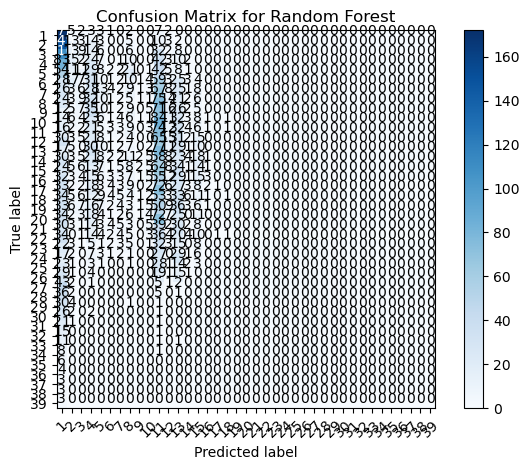

In [ ]:
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

display(y_test_1950)
display(X_rf_pred_1950)

print("Confusion Matrix:")
print(confusion_matrix(y_test_1950, X_rf_pred_1950))
print()

print("Accuracy: {}".format(accuracy_score(y_test_1950, X_rf_pred_1950)))

# Compute confusion matrix
cm = confusion_matrix(y_test_1950, X_rf_pred_1950)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plot the confusion matrix
class_names = label_encoder.classes_
plot_confusion_matrix(cm, classes=class_names, title='Confusion Matrix for Random Forest')
plt.show()

In [ ]:
X_test_1950

array([[2.74881517e-01, 1.57894737e-01, 5.58823529e-01, ...,
        0.00000000e+00, 0.00000000e+00, 3.60000000e+01],
       [2.14454976e-01, 0.00000000e+00, 3.52941176e-01, ...,
        0.00000000e+00, 0.00000000e+00, 2.90000000e+01],
       [7.41706161e-01, 2.39234450e-02, 4.11764706e-01, ...,
        0.00000000e+00, 0.00000000e+00, 3.30000000e+01],
       ...,
       [3.55450237e-02, 9.56937799e-03, 1.76470588e-01, ...,
        0.00000000e+00, 0.00000000e+00, 2.00000000e+01],
       [1.42180095e-02, 6.69856459e-02, 2.64705882e-01, ...,
        0.00000000e+00, 0.00000000e+00, 2.20000000e+01],
       [1.70616114e-01, 8.13397129e-02, 7.35294118e-01, ...,
        0.00000000e+00, 0.00000000e+00, 2.70000000e+01]])

In [ ]:
import numpy as np

# Angenommen, X_test_1950 ist ein numpy Array und die letzte Spalte enthält die max_drivers
# Extrahiere die max_drivers-Spalte aus X_test_1950
max_drivers = X_test_1950[:, -1]

# Konvertiere die Vorhersagen zu einem numpy Array, falls sie es nicht bereits sind
predictions = np.array(X_rf_pred_1950)

# Zähle die Vorhersagen, die größer sind als die maximale Anzahl an Fahrern
out_of_bounds_count = np.sum(predictions > max_drivers)

# Ausgabe der Anzahl der Vorhersagen außerhalb des Rasters
print(f"Anzahl der Vorhersagen außerhalb des Rasters: {out_of_bounds_count}")

Anzahl der Vorhersagen außerhalb des Rasters: 0


baseline hat RMSE von 4,9 lul

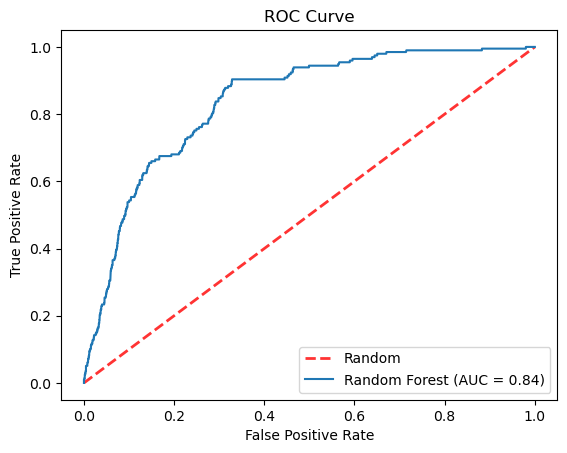

Thresholds: [       inf 0.07503178 0.07475725 ... 0.02745452 0.02732633 0.02729198]


In [ ]:

from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Berechne die Klassenwahrscheinlichkeiten (Confidences) für das Test-Set
proba_for_each_class = random_forest.predict_proba(X_test_1950)

# Berechne die ROC-Kurve
fpr, tpr, thresholds = roc_curve(y_test_1950, proba_for_each_class[:, 1], pos_label=1)

# Berechne die AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot die Linie für zufälliges Raten
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8)

# Plot die ROC-Kurve für den Classifier
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')

# Zeige den Plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Zeige die Schwellenwerte
print("Thresholds:", thresholds)

In [ ]:
#RMSE for XG- Boost
from sklearn.metrics import mean_squared_error
from math import sqrt

x_mse_xg_1950 = mean_squared_error(y_test_1950, X_pred_xg_1950)
print("Mean Squared Error:", x_mse_xg_1950)
print("Root Mean Squared Error:", sqrt(x_mse_xg_1950))

#RMSE for XGB with Successive Halving
x_mse_xg_sh_1950 = mean_squared_error(y_test_1950, X_xgb_sh_pred_1950)
print("Mean Squared Error SH:", x_mse_xg_sh_1950)
print("Root Mean Squared Error SH:", sqrt(x_mse_xg_sh_1950))

#RMSE for XG-Boost with Random Search
x_mse_xg_rs_1950= mean_squared_error(y_test_1950, X_xgb_rs_pred_1950)
print("Mean Squared Error RS:", x_mse_xg_rs_1950)
print("Root Mean Squared Error RS:", sqrt(x_mse_xg_rs_1950))
#Best


Mean Squared Error: 62.584019769357496
Root Mean Squared Error: 7.9110062425305605
Mean Squared Error SH: 61.35152388797364
Root Mean Squared Error SH: 7.832721359015246
Mean Squared Error RS: 59.02944810543657
Root Mean Squared Error RS: 7.683062417124865


## Ensembles

In [ ]:
#Dauert 65 Min und 45 sek

#Stacking Example for XG-Boost and Random Forrest

from sklearn.tree import DecisionTreeClassifier #Meta Learner
from sklearn.preprocessing import LabelEncoder

# Stacking: scikit-learn has no implementation for Stacking. You can use this -> https://rasbt.gith2ub.io/mlxtend/
# HINT: mlxtend can only work with numerical labels. You can use the LabelEncoder to transform your labels.

from mlxtend.classifier import StackingClassifier
#Pick the the two best classifiers with best found hyperparameters
estimators = {'RandomForrest with Successive Halving': rsh_rf_1950, 'XG Boost Classifier with Halving Random Search': random_search} #Possible to extend to even more classifiers

ensemble = StackingClassifier(
    classifiers=list(estimators.values()),
    meta_classifier=DecisionTreeClassifier()
)
estimators['Stacking'] = ensemble

for e_name, e in estimators.items():
    evaluate_classifier(e_name, e, X_train_1950, y_train_1950, X_test_1950, y_test_1950)

RandomForrest with Successive Halving: ACC=0.10 RandomForrest with Successive Halving: RMSE=7.62
XG Boost Classifier with Halving Random Search: ACC=0.09 XG Boost Classifier with Halving Random Search: RMSE=7.68


/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Stacking: ACC=0.09 Stacking: RMSE=7.70


Keine Verbesserung --> Verscuh einer LogisticRegression oder GradientBoostingClassifier

Vielleicht Overfitten bzw Underfitten meine Modelle auch 

Hyperparameter optimization des Ensembles, 

# Model 1 with own train-test split

k-cross fold validation possible, stratified sampling 

## Preprocessing

In which shape is the preprocessed data? Are additional preprocessing techniques necessary for different models ?

Is there already an train-test(-validation) split?

Binning, Boosting & stratified sampling

Encoding necessary?

In [ ]:
#Modell 1

df1 = pd.read_csv('../data/processed/export_2018_full_v1.csv') 

In [ ]:
df1.head()

,resultId,raceId,driverId,constructorId,number,grid,positionOrder,year,round,circuitId,race_name,race_date,race_time,fp1_date,fp2_date,fp3_date,fp1_time,fp2_time,fp3_time,quali_time,quali_date,race_location,race_country,race_lat,race_lng,race_alt,q1,q2,q3,driver_dob,driver_nationality,driver_code,min_pit_stop_duration,max_pit_stop_duration,avg_pit_stop_duration,std_pit_stop_duration,milliseconds_count,pit_stop_count,min_pit_stop_lap,max_pit_stop_lap,avg_pit_stop_lap,std_pit_stop_lap,avg_pit_stop_driver,avg_pit_stop_team,avg_pit_stop_track,avg_pit_stop_season,rolling_avg_pit_stop_driver,rolling_avg_pit_stop_team,rolling_avg_pit_stop_track,rolling_avg_pit_stop_season,q1_time,q2_time,q3_time,q_position,fp1_avg_sector_1,fp1_avg_sector_2,fp1_avg_lap_time,fp1_avg_speedI1,fp1_avg_speedI2,fp1_avg_speedFL,fp1_avg_speedST,fp1_avg_tyre_life,fp1_avg_is_on_fresh_tyres,fp2_avg_sector_1,fp2_avg_sector_2,fp2_avg_lap_time,fp2_avg_speedI1,fp2_avg_speedI2,fp2_avg_speedFL,fp2_avg_speedST,fp2_avg_tyre_life,fp2_avg_is_on_fresh_tyres,fp3_avg_sector_1,fp3_avg_sector_2,fp3_avg_lap_time,fp3_avg_speedI1,fp3_avg_speedI2,fp3_avg_speedFL,fp3_avg_speedST,fp3_avg_tyre_life,fp3_avg_is_on_fresh_tyres
0,23782,989,20,6,5,3,1,2018,1,1,Australian Grand Prix,2018-03-25,05:10:00,\N,\N,\N,\N,\N,\N,\N,\N,Melbourne,Australia,-37.8497,144.968,10,1:23.348,1:21.944,1:21.838,1987-07-03,German,VET,21787.0,21787.0,21787.0,0.0,1.0,1.0,26.0,26.0,26.0,0.0,235976.200000,37075.632937,136768.016807,24639.648649,235976.2,235976.2,235976.2,25191.600000,83348.0,81944.0,81838.0,3.0,28761.500000,23424.833333,86617.000000,272.200000,288.500000,291.333333,303.800000,6.666667,0.333333,29200.375000,23666.944444,87905.444444,272.076923,286.166667,286.857143,292.666667,11.111111,0.222222,28923.0,23192.0,86067.0,274.0,291.0,309.0,308.0,2.0,1.0
1,23783,989,1,131,44,1,2,2018,1,1,Australian Grand Prix,2018-03-25,05:10:00,\N,\N,\N,\N,\N,\N,\N,\N,Melbourne,Australia,-37.8497,144.968,10,1:22.824,1:22.051,1:21.164,1985-01-07,British,HAM,21821.0,21821.0,21821.0,0.0,1.0,1.0,19.0,19.0,19.0,0.0,33408.959596,174568.428571,119521.000000,85900.376467,235561.8,235561.8,235561.8,85900.376467,82824.0,82051.0,81164.0,1.0,28628.363636,23426.727273,86506.636364,274.500000,289.545455,288.909091,298.818182,8.636364,0.272727,28940.055556,23661.111111,87590.444444,272.000000,286.777778,284.388889,290.882353,9.555556,0.222222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23784,989,8,6,7,2,3,2018,1,1,Australian Grand Prix,2018-03-25,05:10:00,\N,\N,\N,\N,\N,\N,\N,\N,Melbourne,Australia,-37.8497,144.968,10,1:23.096,1:22.507,1:21.828,1979-10-17,Finnish,RAI,21421.0,21421.0,21421.0,0.0,1.0,1.0,18.0,18.0,18.0,0.0,175877.714286,35074.477528,195292.316667,24391.540000,236755.2,236755.2,236755.2,30961.000000,83096.0,82507.0,81828.0,2.0,28669.714286,23481.285714,86685.857143,271.333333,287.428571,292.285714,306.166667,6.714286,0.428571,29076.150000,23685.900000,87961.400000,272.100000,286.300000,290.833333,300.631579,11.900000,0.250000,29780.0,23789.0,88499.0,273.0,291.0,303.0,292.0,2.0,1.0
3,23785,989,817,9,3,8,4,2018,1,1,Australian Grand Prix,2018-03-25,05:10:00,\N,\N,\N,\N,\N,\N,\N,\N,Melbourne,Australia,-37.8497,144.968,10,1:23.494,1:22.897,1:22.152,1989-07-01,Australian,RIC,21440.0,21440.0,21440.0,0.0,1.0,1.0,26.0,26.0,26.0,0.0,112315.376106,75383.610338,137356.063927,24578.241758,235802.0,235802.0,235802.0,26558.600000,83494.0,82897.0,82152.0,5.0,28911.800000,23500.700000,87207.300000,271.400000,287.500000,289.700000,293.500000,7.800000,0.100000,29051.692308,23587.384615,87491.153846,270.153846,284.769231,286.363636,288.727273,8.230769,0.307692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23786,989,4,1,14,10,5,2018,1,1,Australian Grand Prix,2018-03-25,05:10:00,\N,\N,\N,\N,\N,\N,\N,\N,Melbourne,Australia,-37.8497,144.968,10,1:23.597,1:23.692,\N,1981-07-29,Spanish,ALO,22573.0,22573.0,22573.0,0.0,1.0,1.0,26.0,26.0,26.0,0.0,22140.000000,22657.319149,206946.806452,23008.192308,22140.0,21623.6,235443.8,22696.400000,83597.0,83692.0,NaN,11.0,28

In [ ]:
df1.tail()

,resultId,raceId,driverId,constructorId,number,grid,positionOrder,year,round,circuitId,race_name,race_date,race_time,fp1_date,fp2_date,fp3_date,fp1_time,fp2_time,fp3_time,quali_time,quali_date,race_location,race_country,race_lat,race_lng,race_alt,q1,q2,q3,driver_dob,driver_nationality,driver_code,min_pit_stop_duration,max_pit_stop_duration,avg_pit_stop_duration,std_pit_stop_duration,milliseconds_count,pit_stop_count,min_pit_stop_lap,max_pit_stop_lap,avg_pit_stop_lap,std_pit_stop_lap,avg_pit_stop_driver,avg_pit_stop_team,avg_pit_stop_track,avg_pit_stop_season,rolling_avg_pit_stop_driver,rolling_avg_pit_stop_team,rolling_avg_pit_stop_track,rolling_avg_pit_stop_season,q1_time,q2_time,q3_time,q_position,fp1_avg_sector_1,fp1_avg_sector_2,fp1_avg_lap_time,fp1_avg_speedI1,fp1_avg_speedI2,fp1_avg_speedFL,fp1_avg_speedST,fp1_avg_tyre_life,fp1_avg_is_on_fresh_tyres,fp2_avg_sector_1,fp2_avg_sector_2,fp2_avg_lap_time,fp2_avg_speedI1,fp2_avg_speedI2,fp2_avg_speedFL,fp2_avg_speedST,fp2_avg_tyre_life,fp2_avg_is_on_fresh_tyres,fp3_avg_sector_1,fp3_avg_sector_2,fp3_avg_lap_time,fp3_avg_speedI1,fp3_avg_speedI2,fp3_avg_speedFL,fp3_avg_speedST,fp3_avg_tyre_life,fp3_avg_is_on_fresh_tyres
2914,26700,1141,832,6,55,0,16,2024,21,18,São Paulo Grand Prix,2024-11-03,17:00:00,2024-11-01,2024-11-01,\N,14:30:00,18:30:00,\N,18:00:00,2024-11-02,São Paulo,Brazil,-23.7036,-46.6997,785,1:30.303,1:29.406,\N,1994-09-01,Spanish,SAI,25920.0,1424659.0,725289.500000,989057.832010,2.0,2.0,27.0,32.0,29.5,3.535534,110009.266244,63530.378336,163963.229484,133131.941468,301772.600000,301772.600000,301772.600000,24783.200000,90303.0,89406.0,NaN,14.0,18876.181818,37390.363636,73110.545455,315.800000,258.181818,315.181818,318.000000,11.090909,0.363636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2915,26701,1141,861,3,43,16,17,2024,21,18,São Paulo Grand Prix,2024-11-03,17:00:00,2024-11-01,2024-11-01,\N,14:30:00,18:30:00,\N,18:00:00,2024-11-02,São Paulo,Brazil,-23.7036,-46.6997,785,1:31.270,\N,\N,2003-05-27,Argentinian,COL,25239.0,25287.0,25263.000000,33.941125,2.0,2.0,26.0,30.0,28.0,2.828427,27097.416667,77396.569431,177952.131611,151488.299920,27097.416667,27201.900000,587218.600000,306290.600000,91270.0,NaN,NaN,18.0,18871.142857,37867.142857,73674.000000,320.166667,255.428571,318.714286,318.857143,8.571429,0.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2916,26702,1141,848,3,23,7,18,2024,21,18,São Paulo Grand Prix,2024-11-03,17:00:00,2024-11-01,2024-11-01,\N,14:30:00,18:30:00,\N,18:00:00,2024-11-02,São Paulo,Brazil,-23.7036,-46.6997,785,1:29.072,1:25.889,1:24.657,1996-03-23,Thai,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89072.0,85889.0,84657.0,7.0,19023.363636,37978.727273,73841.636364,315.800000,253.090909,314.909091,311.727273,11.363636,0.090909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2917,26703,1141,840,117,18,10,19,2024,21,18,São Paulo Grand Prix,2024-11-03,17:00:00,2024-11-01,2024-11-01,\N,14:30:00,18:30:00,\N,18:00:00,2024-11-02,São Paulo,Brazil,-23.7036,-46.6997,785,1:30.580,1:26.334,\N,1998-10-29,Canadian,STR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90580.0,86334.0,NaN,10.0,18916.300000,37960.300000,73867.500000,317.142857,253.300000,313.300000,313.200000,11.600000,0.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2918,26704,1141,807,210,27,17,20,2024,21,18,São Paulo Grand Prix,2024-11-03,17:00:00,2024-11-01,2024-11-01,\N,14:30:00,18:30:00,\N,18:00:00,2024-11-02,São Paulo,Brazil,-23.7036,-46.6997,785,1:31.623,\N,\N,1987-08-19,German,HUL,25369.0,58984.0,37647.666667,18547.858376,3.0,3.0,25.0,29.0,27.0,2.000000,62869.148273,84807.187720,133398.311001,138964.433107,307300.866667,307300.866667,307294.266667,30012.866667,91623.0,NaN,NaN,19.0,18894.200000,37766.900000,73593.500000,317.800000,253.500000,319.500000,317.555556,9.500000,0.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

#### Calculating Driver Age

In [ ]:
from datetime import datetime

#Calculate Age: 
# Convert race_date and driver_dob to datetime
df1['race_date'] = pd.to_datetime(df1['race_date'])
df1['driver_dob'] = pd.to_datetime(df1['driver_dob'])

# Calculate age
df1['age'] = df1.apply(lambda row: row['race_date'].year - row['driver_dob'].year - ((row['race_date'].month, row['race_date'].day) < (row['driver_dob'].month, row['driver_dob'].day)), axis=1)

# Drop driver_dob column
df1 = df1.drop(columns=['driver_dob'])

#### Drop Irrelevant Columns

In [ ]:
#Folgende 'object' Attribute werden erstmal gedroppt:
#race_date, race_time, fp1_date, fp2_date, fp3_date, fp1_time, fp2_time, fp3_time, quali_time, quali_date, race_location, race_country, driver_dob
df1 = df1.drop(columns=['race_date', 'race_time', 'fp1_date', 'fp2_date', 'fp3_date', 'fp1_time', 'fp2_time', 'fp3_time', 'quali_time', 'quali_date', 'race_location', 'race_country'])

In [ ]:
#Folgende Spalten müssen noch gedroppt werden: year, number, resultId, raceId, round, race_name, driver_code
df1 = df1.drop(columns=[ 'number', 'resultId', 'round', 'race_name', 'driver_code'])


In [ ]:
# Folgende Attribute werden gedroppt, da sie nicht für jedes Rennen vorhanden sind:
df1 = df1.drop(columns=df1.loc[:, 'fp1_avg_sector_1':'fp3_avg_is_on_fresh_tyres'].columns)


#### Qualifying Zeiten Problem

Problem: Nur total wenige Rennen haben Daten über die Qualifiying? 

Wie man unten sehen kann gibt es nur q1_time zeiten von zeile 2899-1918

q1_time ist der Wert in q1 in tausendstel sekunden.
Die umwandlung hat aber nur selten funktioniert, deswegen mache ich das neu:

q_position hat leider auch fast überall NaN

In [ ]:
# Drop columns 'q1_time', 'q2_time', 'q3_time', and 'q_position' from the dataset
df1 = df1.drop(columns=['q1_time', 'q2_time', 'q3_time', 'q_position'])

In [ ]:
#Encoding von q1,q2, q3
#Zeiten müssen in sekunden umgewandelt werden
def convert_to_seconds(time_str):
    if pd.isna(time_str) or time_str == '\\N':
        return 0.0 #falls NaN Wert (nicht erreichen des Q2/Q3) auf 0 gesetzt. Alternative selber Wert?
    minutes, seconds = time_str.split(':')
    return int(minutes) * 60 + float(seconds)

df1['q1'] = df1['q1'].apply(convert_to_seconds)
df1['q2'] = df1['q2'].apply(convert_to_seconds)
df1['q3'] = df1['q3'].apply(convert_to_seconds)

In [ ]:
import numpy as np

# Function to calculate qualifying position
#def calculate_q_position(group):
    # Sort by q3, q2, q1
    #group['q3'] = group['q3'].replace('\\N', np.nan).astype(float)
    #group['q2'] = group['q2'].replace('\\N', np.nan).astype(float)
    #group['q1'] = group['q1'].replace('\\N', np.nan).astype(float)
    
    # Initialize q_position with NaN
    #group['q_position'] = np.nan
    
    # Assign positions based on q3
    #q3_sorted = group[group['q3'].notna()].sort_values(by='q3')
    #q3_sorted['q_position'] = range(1, len(q3_sorted) + 1)
    
    # Assign positions based on q2 for those without q3
    #q2_sorted = group[group['q3'].isna() & group['q2'].notna()].sort_values(by='q2')
    #q2_sorted['q_position'] = range(len(q3_sorted) + 1, len(q3_sorted) + len(q2_sorted) + 1)
    
    # Assign positions based on q1 for those without q2 and q3
    #q1_sorted = group[group['q3'].isna() & group['q2'].isna() & group['q1'].notna()].sort_values(by='q1')
    #q1_sorted['q_position'] = range(len(q3_sorted) + len(q2_sorted) + 1, len(q3_sorted) + len(q2_sorted) + len(q1_sorted) + 1)
    
    # Combine all sorted groups
    #combined = pd.concat([q3_sorted, q2_sorted, q1_sorted])
    
    # Fill the original group with calculated q_position
    #group.update(combined)
    
    #return group

# Group by raceId and apply the function
#df1 = df1.groupby('raceId').apply(calculate_q_position)

### Umgang mit NaN Werten

Sehr viele NaN Werte in verschiedenen Attributen, die eine Benutzung von Classifiern wie Naive Bayes nicht möglich machen. 
3 Möglichkeiten:
1) Zeilen löschen -> bei eh schon geringer Datenlage eher nicht so gut
2) Ersetzen durch Median, mittelwert, 0 ?? -> Welcher Wert hängt spezifisch vom Attribut ab
3) Drauf scheißen und classifier nehmen die das Handlen können (Yallah) 


### Encoding


Determine which attribute need to be endoded and which not 

OneHotEncoder: race_name, driver code, driver_nationality

Anderes Encoding: q1,q2,q3



OneHotEncoder: race_name, driver code, driver_nationality

Anderes Encoding: q1,q2,q3


In [ ]:

#Encoding: Target (positon could be encoded with LabelEncoder or leave it as it is since there are numeric values)

from sklearn import preprocessing

#One hot encoding
encoderOH = preprocessing.OneHotEncoder()
encoded = pd.DataFrame(encoderOH.fit_transform(df1[[ 'driver_nationality']]).toarray(), columns=encoderOH.get_feature_names_out([ 'driver_nationality']))

df1_preprocessed = df1.drop(columns=[ 'driver_nationality'])
df1_preprocessed = df1_preprocessed.join(encoded)



In [ ]:
#Entfernen der Zeilen mit NaN in Position
df1_preprocessed = df1_preprocessed.dropna(subset=['positionOrder'])

In [ ]:
df1_target = df1_preprocessed['positionOrder'] 
df1_preprocessed = df1_preprocessed.drop(columns=['positionOrder'])

In [ ]:
label_encoder = preprocessing.LabelEncoder().fit(df1_target)
df1_target = label_encoder.fit_transform(df1_target)

In [ ]:
display(label_encoder.classes_)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

## Train - Test Split

In [ ]:
from sklearn.model_selection import train_test_split

df1_train, df1_test, df1_target_train, df1_target_test = train_test_split(
    df1_preprocessed, df1_target,test_size=0.2, random_state=42, stratify=df1_target)

print("=======TRAIN=========")
display(df1_train)
display(df1_target_train)

=======TRAIN=========


,raceId,driverId,constructorId,grid,year,circuitId,race_lat,race_lng,race_alt,q1,q2,q3,min_pit_stop_duration,max_pit_stop_duration,avg_pit_stop_duration,std_pit_stop_duration,milliseconds_count,pit_stop_count,min_pit_stop_lap,max_pit_stop_lap,avg_pit_stop_lap,std_pit_stop_lap,avg_pit_stop_driver,avg_pit_stop_team,avg_pit_stop_track,avg_pit_stop_season,rolling_avg_pit_stop_driver,rolling_avg_pit_stop_team,rolling_avg_pit_stop_track,rolling_avg_pit_stop_season,age,driver_nationality_American,driver_nationality_Argentinian,driver_nationality_Australian,driver_nationality_Belgian,driver_nationality_Brazilian,driver_nationality_British,driver_nationality_Canadian,driver_nationality_Chinese,driver_nationality_Danish,driver_nationality_Dutch,driver_nationality_Finnish,driver_nationality_French,driver_nationality_German,driver_nationality_Italian,driver_nationality_Japanese,driver_nationality_Mexican,driver_nationality_Monegasque,driver_nationality_New Zealander,driver_nationality_Polish,driver_nationality_Russian,driver_nationality_Spanish,driver_nationality_Swedish,driver_nationality_Thai
758,1026,817,4,16,2019,22,34.8431,136.54100,45,89.822,0.000,0.000,23292.0,23292.0,23292.000000,0.000000,1.0,1.0,29.0,29.0,29.0,0.000000,164638.086207,42459.203704,110559.836237,25095.745968,27028.8,27028.8,99333.200000,27766.600000,30,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
187,998,4,1,13,2018,9,52.0786,-1.01694,153,88.187,88.139,0.000,28085.0,28669.0,28377.000000,412.950360,2.0,2.0,13.0,32.0,22.5,13.435029,26573.976727,23777.922057,132991.613308,23191.180398,29801.8,29801.8,29801.800000,24094.600000,36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2019,1094,852,213,13,2022,32,19.4042,-99.09070,2227,79.907,79.589,0.000,22468.0,22468.0,22468.000000,0.000000,1.0,1.0,29.0,29.0,29.0,0.000000,212606.896104,190777.064378,95493.815451,127842.051748,21940.6,21940.6,23257.600000,98905.200000,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2704,1131,807,210,9,2024,70,47.2197,14.76470,678,65.596,65.262,65.385,21814.0,22355.0,22084.500000,382.544769,2.0,2.0,11.0,39.0,25.0,19.798990,74361.907219,100122.080914,21837.229915,143788.162717,22388.2,22388.2,20964.400000,23235.500000,36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1385,1062,852,213,16,2021,11,47.5789,19.24860,264,77.919,0.000,0.000,21819.0,1453630.0,505396.333333,821248.936687,3.0,3.0,2.0,22.0,9.0,11.269428,314490.209841,205816.069543,50960.314960,221921.120977,419239.4,419239.4,216784.733333,627117.533333,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,1024,154,210,17,2019,15,1.2914,103.86400,18,100.277,0.000,0.000,29456.0,43576.0,36516.000000,9984.347750,2.0,2.0,23.0,35.0,29.0,8.485281,45545.230722,67672.805532,30728.535178,24988.985401,30113.9,30113.9,30113.900000,24397.700000,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2803,1136,1,131,6,2024,14,45.6156,9.28111,162,80.477,79.641,79.513,24155.0,24469.0,24312.000000,222.031529,2.0,2.0,15.0,37.0,26.0,15.556349,83111.622618,109036.154140,104955.467836,166611.465074,26073.8,26073.8,26073.800000,23272.300000,39,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1079,1042,840,211,12,2020,75,37.2270,-8.62670,108,77.667,77.626,0.000,36314.0,37483.0,36898.500000,826.607827,2.0,2.0,18.0,34.0,26.0,11.313708,117144.616652,95289.347151,25039.470629,166356.177697,25624.3,25624.3,25355.400000,29520.300000,21,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2896,1140,4,117,13,20

array([18,  7, 19, ..., 19, 17,  8])

## Lernen der einzelnen Classifier

### Random Forrest

Hyperparameters that can be optimized are  max_depth, n_estimators, min_samples_leaf, min_samples_split, max_features, criterion: {“gini”, “entropy”}.

Random_state is only used for the reproducibility of results.

Klappt nicht weil noch NaN Werte vorhanden sind.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(max_depth=2, random_state=0) #Modell initialisieren

random_forest.fit(df1_train, df1_target_train) #Lernvorgang des Modells


RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
# Vorhersagen mit dem RandomForestClassifier auf df1_test_preprocessed
df1_rf_pred = random_forest.predict(df1_test)

# Zeige die Vorhersagen
print(df1_rf_pred)

[ 0  0  3 13 12 13  0  5  3 13 13 13 13  0  1 19  5  5  5  0  0  1  0  0
 13 19  5  0 13  5  5 13 13  3 13  0 19 13  5 13 13  5 13  0  0  5 13 13
 13 13 13 13 13 13 13 13  0 13 13 13 19 13 13  1  0 13  0 13 13  3 13  0
 19 13 19  0  0 13 13 12  3  3 13 13  0  5 13 13 13  0  5 13 13  1  0 19
  0  5  5  0 13  3  0 13 13 13  3  5  0  3  0  5 13  0  0  5  0  0  5  5
 19 13  0 13  3 13 13 13  0 13  0 13 13 13 13 13 13  5 13 13  3  0  0  3
  0 13 13 13 13 13  0 13  1 13 13 13  0 13  3  0  5  0  0  0 13 13  5 13
  0 13  0 15 13  0  0  0 13 13  0 19  0 19 13 13  5  0  0  5 13  3  5  5
 13  3  1 13 19 13  1  0  5 13  3 13 13 19 13  5  5 13 13  5  5  5  0 13
 13 13  0 13  1  1  1 19  5  1  0  3 13 13 13 13 13 13 19 13 13  0  1  5
  1 13  0  0 13  0 13 13 13  5  5  5  3  3  0 19 13  0 19  0  0 13 13  0
 13 13 13  5  0 13 13 13 13 13  0  3 19  5 13 13 13  0 13  3  3  5 13  0
 19  0  3  5  5  5  1 19  0 13  3  0 13 13  3 13 13 13  3 19 13  5  5  1
  0  3  3  0 13 19 13 13  1 13 13 13 13  5  0 13 13

In [ ]:
df1_target_test

array([ 1,  3, 12,  8,  8, 14,  6, 19,  3,  6, 13,  9, 12,  1,  3, 17, 11,
        5,  6, 15,  1,  3, 16,  1, 13, 14,  7,  0, 17, 12,  5,  5, 14, 19,
       14,  1, 12,  5,  8, 10, 14, 18, 16,  0,  2,  4,  9, 13, 10, 15, 10,
       19, 17, 14, 13, 15,  5,  5, 17, 11, 19, 11,  7,  3,  0,  4,  5,  8,
        6,  4, 15,  1, 19, 16, 19,  2,  2,  8,  1, 15, 10,  4,  9, 11,  4,
       11, 18, 15, 16,  4, 11, 15, 11,  4,  0, 17,  2,  6,  9,  9,  8,  7,
        8, 17, 10, 18,  2,  7,  3,  7,  0,  2, 18, 12,  5, 12,  4,  1,  5,
        5, 19, 17,  2,  5,  4, 16,  9,  9,  1,  5,  1, 15, 14,  6,  3,  6,
       15,  6,  7, 10,  5,  0,  0,  2,  1, 11, 10,  7, 10,  6,  1,  0,  6,
       10, 10, 10,  2, 10,  8,  3,  5,  2,  1, 15,  7, 16, 19, 12,  5, 10,
        3, 11, 10,  1,  0, 14, 14, 12,  0, 18,  2, 19, 11,  7, 17, 13,  1,
        6, 12, 10, 13,  8, 14,  7,  1, 13, 19, 14, 17,  0,  6, 16,  6, 12,
        8, 19, 16,  3, 19, 19, 11,  4, 10, 18,  5, 16, 14, 18,  4, 17,  4,
        3,  3, 18,  5,  1

#### Hyperparameter Optimization Random Forrest

Vielleicht noch irgendwie was plotten, da gabs noch so eine andere Methode

In [ ]:
#Hyperparameter tuning trough grid search
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# Definiere das Modell
clf = RandomForestClassifier(random_state=42)

# Definiere den Parameter-Raster
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# specify the cross validation
#stratified_10_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Führe die Grid-Suche durch
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(df1_train, df1_target_train)

gridsearch_results = pd.DataFrame(grid_search_estimator.cv_results_)
display(gridsearch_results)

# Beste Parameter anzeigen
print("Beste Parameter:", grid_search.best_params_)

NameError: name 'error' is not defined

In [ ]:
random_forrest2 = RandomForestClassifier(max_depth= 20, max_features = 'sqrt', min_samples_leaf= 1, min_samples_split= 10, n_estimators= 300, random_state=0) #Random Forrest with optimal parameters through GridSearch  

random_forrest2.fit(df1_train, df1_target_train)

RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=300,
                       random_state=0)

In [ ]:
# Vorhersagen mit dem RandomForestClassifier auf df1_test_preprocessed
df1_rf2_pred = random_forrest2.predict(df1_test)

# Zeige die Vorhersagen
print(df1_rf2_pred)

[ 3  3 12  8  9 14  6 18  3  6 13  9 12  1  3 18 10  5  6 15  1  4 16  1
 13 14  7  0 17 14  5  5 14 19 18  0 10  5  8 10 14 16 16  0  2  6 10 13
 10 15 10 19 19 14 12 15  6  5 17 11 19 11  9  3  0  4  5  9  6  6 15  1
 19 15 17  2  4  9  1 15 10  4  7 11  4 11 17 15 15  4 11 17 10  5  0 18
  2  0 10  9 10  9  8 17 10 18  2  8  2  4  0  2 18 12  5 12  4  1  5  5
 16 18  2  5  4 15  9  9  4  5  1 15 18  5  7  6 15  7  7 13  5  0  0  2
  1 11 10  7 10  7  6  0  6 10 10 10  8 14  8  3  7  5  1 15  8 17 18 12
  2 11  3 10 10  1  3 14 14 12  0 18  1 19 10  6 16 12  1  6 13 10 10  7
 13  9  1 13 19 14 18  0  6 15  4 12  7 19 16  3 18 18 12  5 11 17  6 16
 19 18  4 16  4  3  3 18  9  1  0 10 11 10  7 14 15 16 19 12 10  2  1  6
  8 13 19  6 11  5 17 17 16  8  7  6  2  4  4  8  4  3 15  2  3 17 15  0
 12 10 14  2  1  8 16 13 14 13  2  9 19 11 14 18  7 17 19  5  0  6 11  0
 19  0  6  6  8 10  5 15 15 13 14  3 16 12  4 17 11 17  8 17  9  8 17  0
  1  8 16  0 16 19  8 17  2  8 10  4 16  6 17 11 10

#### Successive Halving

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import randint

from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv  
from sklearn.model_selection import HalvingRandomSearchCV

In [ ]:

rng = np.random.RandomState(0)

clf = RandomForestClassifier( random_state=rng)

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rsh = HalvingRandomSearchCV(
    estimator=clf, param_distributions=param_dist, factor=2, random_state=rng
)

rsh.fit(df1_train, df1_target_train)

/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 55.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_cons

HalvingRandomSearchCV(estimator=RandomForestClassifier(random_state=RandomState(MT19937) at 0x17CBD6940),
                      factor=2,
                      param_distributions={'max_depth': [None, 10, 20, 30],
                                           'max_features': ['auto', 'sqrt',
                                                            'log2'],
                                           'min_samples_leaf': [1, 2, 4],
                                           'min_samples_split': [2, 5, 10],
                                           'n_estimators': [100, 200, 300]},
                      random_state=RandomState(MT19937) at 0x17CBD6940)

In [ ]:
# Beste Parameter und Score
print("Beste Parameter:", rsh.best_params_)
print("Bester Score:", rsh.best_score_)

# Vorhersagen und Bewertung
df1_rf_sh_pred = rsh.predict(df1_test)
print("Classification Report:")
print(classification_report(df1_target_test, df1_rf_sh_pred, target_names=label_encoder.classes_.astype(str)))

Beste Parameter: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 30}
Bester Score: 0.5197002351097179
Classification Report:
              precision    recall  f1-score   support

         1.0       0.87      0.90      0.88        29
         2.0       0.81      0.72      0.76        29
         3.0       0.69      0.62      0.65        29
         4.0       0.69      0.69      0.69        29
         5.0       0.77      0.69      0.73        29
         6.0       0.53      0.55      0.54        29
         7.0       0.50      0.53      0.52        30
         8.0       0.48      0.47      0.47        30
         9.0       0.55      0.59      0.57        29
        10.0       0.68      0.66      0.67        29
        11.0       0.53      0.67      0.59        30
        12.0       0.54      0.52      0.53        29
        13.0       0.74      0.69      0.71        29
        14.0       0.57      0.55      0.56        29
     

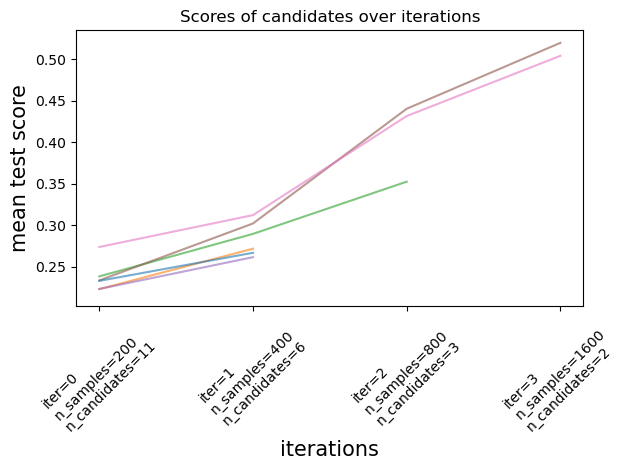

In [ ]:
results = pd.DataFrame(rsh.cv_results_)
results["params_str"] = results.params.apply(str)
results.drop_duplicates(subset=("params_str", "iter"), inplace=True)
mean_scores = results.pivot(
    index="iter", columns="params_str", values="mean_test_score"
)
ax = mean_scores.plot(legend=False, alpha=0.6)

labels = [
    f"iter={i}\nn_samples={rsh.n_resources_[i]}\nn_candidates={rsh.n_candidates_[i]}"
    for i in range(rsh.n_iterations_)
]

ax.set_xticks(range(rsh.n_iterations_))
ax.set_xticklabels(labels, rotation=45, multialignment="left")
ax.set_title("Scores of candidates over iterations")
ax.set_ylabel("mean test score", fontsize=15)
ax.set_xlabel("iterations", fontsize=15)

plt.tight_layout()
plt.show()

### XG- Boost

In [ ]:
# XGBoost trainieren
import xgboost as xgb

clf = xgb.XGBClassifier(random_state=42)
clf.fit(df1_train, df1_target_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:


# Prediction
df1_pred_xg = clf.predict(df1_test)
print(df1_pred_xg)

[ 3  3 12  8  8 14  7 19  3  6 13  9 12  1  3 17 10  5  6 18  1  3 16  1
 13 14  7  0 17 14  5  5 14 19 19  0 10  5  8 10 14 16 16  0  2  4 13 13
 10 15 13 17 19 14 14 19  4  5 16 11 19 11  8  3  0  4  5  8  6  4 17  1
 19 15 17  2  5  8  1 15 10  4  7 11  4 11 17 15 15  4 11 15 13  4  0 18
  2  0  9  9 10  8  8 17 10 18  2  7  2  3  0  2 18 12  5 12  4  1  5  6
 19 18  2  5  4 15  9  9  1  6  1 16 18  5  7  6 16  7  7 13  5  0  0  2
  1 11 10  7 10  6  6  0  6 10  9 10  6 14  8  3  7  5  1 15  7 17 16 12
  2 10  3 10 10  1  3 14 14 12  0 18  1 19 12  5 16 12  1  6 12 10 12  7
 14  8  1 13 17 14 18  0  7 15  6 12  8 19 16  3 18 19 12  4 10 17  6 16
 18 18  4 16  4  3  3 18  9  1  0 10 11 10  7 14 15 18 19 13 10  2  1  6
  8 12 17  6 11  5 17 17 14  7  8  5  2  4  3  8  4  2 15  2  3 17 14  0
 12 10 14  2  1  7 16 13 14 13  6  9 19 11 12 17  7 17 18  5  0  2 11  0
 19  0  6  6  8 10  4 18 18 13 14  3 16 12  4 17 11 17  8 18  9  8 17  0
  2  8 16  0 16 19  8 18  2  8 10  4 16  6 19 11 10

#### Hyperparameter Tuning XG Boost with Successive Halving

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
import xgboost as xgb

# Successive Halving Hyperparameter Tuning for XGBoost

# Definiere das Modell
xgb_clf = xgb.XGBClassifier(random_state=0)

# Definiere den Parameter-Raster
param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Führe die Halving Random Search durch
rsh_xgb = HalvingRandomSearchCV(
    estimator=xgb_clf, param_distributions=param_dist_xgb, factor=2, random_state=0
)

rsh_xgb.fit(df1_train, df1_target_train)

# Beste Parameter und Score
print("Beste Parameter für XGBoost:", rsh_xgb.best_params_)
print("Bester Score für XGBoost:", rsh_xgb.best_score_)

# Vorhersagen und Bewertung
df1_xgb_sh_pred = rsh_xgb.predict(df1_test)
print("Classification Report für XGBoost:")
print(classification_report(df1_target_test, df1_xgb_sh_pred, target_names=label_encoder.classes_.astype(str)))

Beste Parameter für XGBoost: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.9}
Bester Score für XGBoost: 0.6675156739811913
Classification Report für XGBoost:
              precision    recall  f1-score   support

         1.0       0.90      0.93      0.92        29
         2.0       0.89      0.86      0.88        29
         3.0       0.85      0.79      0.82        29
         4.0       0.75      0.83      0.79        29
         5.0       0.89      0.83      0.86        29
         6.0       0.76      0.66      0.70        29
         7.0       0.73      0.80      0.76        30
         8.0       0.71      0.67      0.69        30
         9.0       0.72      0.79      0.75        29
        10.0       0.77      0.69      0.73        29
        11.0       0.62      0.83      0.71        30
        12.0       0.74      0.59      0.65        29
        13.0       0.78      0.72      0.75        29
        14.0       0.71      0.

#### Hyperparametertuning for XG Boost with Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Definiere das Modell
xgb_clf = xgb.XGBClassifier(random_state=42)

# Definiere den Parameter-Raster
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Führe die Grid-Suche durch
grid_search_xgb = GridSearchCV(estimator=xgb_clf, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2)
grid_search_xgb.fit(df1_train, df1_target_train)

# Beste Parameter anzeigen
print("Beste Parameter für XGBoost:", grid_search_xgb.best_params_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   2.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   2.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   3.0s
[CV] END

Traceback (most recent call last):
  File "/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/gt/wnv6zp0s7w92jy1_p2n6shsr0000gn/T/ipykernel_81176/3559353129.py", line 18, in <module>
    grid_search_xgb.fit(df1_train, df1_target_train)
  File "/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/model_selection/_search.py", line 1019, in fit
  File "/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/model_selection/_search.py", line 1573, in _run_search
  File "/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/model_selection/_search.py", line 965, in evaluate_candidates
    delayed(_fit_and_score)(
  File "/opt/anaconda3/envs/dmproject/lib/python3.9/s

### Naive Bayes
Assumes different attributes are independent of each other. (Did we remove duplicates/ very similar attributes?)

[Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html) is implemented in different variations in scikit-learn.
They differ mainly by the assumptions they make regarding the distribution of $P(x_i|y)$


- [```GaussianNB``` class](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) implements the Naive Bayes classifier for continious (numeric) features. Likelihood of the features is assumed to be Gaussian
- [```MultinomialNB``` class](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) implements the Naive Bayes classifier for discrete (categorical) features (multinomially distributed data)
- [```BernoulliNB``` class](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) assumes multivariate Bernoulli distributions
- [```CategoricalNB``` class](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html) assumes that each feature has its own categorical distribution

Could the assumption about the distributions of $P(x_i|y)$ be regarded as an hyperparameter wich can be optimized? 

Only 4 Options, so try what works best.

In [ ]:
df1_train.head()

,raceId,driverId,constructorId,grid,year,circuitId,race_lat,race_lng,race_alt,q1,q2,q3,min_pit_stop_duration,max_pit_stop_duration,avg_pit_stop_duration,std_pit_stop_duration,milliseconds_count,pit_stop_count,min_pit_stop_lap,max_pit_stop_lap,avg_pit_stop_lap,std_pit_stop_lap,avg_pit_stop_driver,avg_pit_stop_team,avg_pit_stop_track,avg_pit_stop_season,rolling_avg_pit_stop_driver,rolling_avg_pit_stop_team,rolling_avg_pit_stop_track,rolling_avg_pit_stop_season,age,driver_nationality_American,driver_nationality_Argentinian,driver_nationality_Australian,driver_nationality_Belgian,driver_nationality_Brazilian,driver_nationality_British,driver_nationality_Canadian,driver_nationality_Chinese,driver_nationality_Danish,driver_nationality_Dutch,driver_nationality_Finnish,driver_nationality_French,driver_nationality_German,driver_nationality_Italian,driver_nationality_Japanese,driver_nationality_Mexican,driver_nationality_Monegasque,driver_nationality_New Zealander,driver_nationality_Polish,driver_nationality_Russian,driver_nationality_Spanish,driver_nationality_Swedish,driver_nationality_Thai
721,1025,822,131,4,2019,71,43.4057,39.9578,2,93.413,93.281,92.632,29436.0,29436.0,29436.0,0.000000,1.0,1.0,28.0,28.0,28.0,0.000000,95613.383333,78732.459086,31270.377778,24964.467128,24669.8,24669.8,29934.0,24622.6,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72,992,825,210,15,2018,73,40.3725,49.8533,-7,103.674,104.759,0.000,21778.0,35608.0,28693.0,9779.286784,2.0,2.0,1.0,39.0,20.0,26.870058,78920.298772,89780.886323,240757.624574,24656.313161,282293.9,282293.9,480882.7,26036.6,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1328,1058,4,214,8,2021,70,47.2197,14.7647,678,64.971,64.582,64.574,21131.0,21131.0,21131.0,0.000000,1.0,1.0,27.0,27.0,27.0,0.000000,91899.130337,191569.859649,21624.600000,217660.388889,26862.2,26862.2,24456.2,24208.0,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
419,1009,807,4,10,2018,24,24.4672,54.6031,3,97.569,96.630,96.542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2154,1102,807,210,12,2023,79,25.9581,-80.2389,0,87.945,87.903,0.000,23120.0,23120.0,23120.0,0.000000,1.0,1.0,33.0,33.0,33.0,0.000000,73247.595687,97530.204918,21368.714286,208634.128571,27869.2,27869.2,21722.2,28611.8,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(df1_train, df1_target_train)

ValueError: Input X contains NaN.
GaussianNB does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
df_nb_prediction = naive_bayes.predict(df1_test)

## Evaluation of Model 1

(Eventuell seperates Dokument)

### Confusion Matrix for Modell 1

#### Random Forrest

In [ ]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

display(df1_target_test)
display(df1_rf_pred)

print("Confusion Matrix:")
print(confusion_matrix(df1_target_test, df1_rf_pred))
print()

print("Accuracy: {}".format(accuracy_score(df1_target_test, df1_rf_pred)))

array([ 1,  3, 12,  8,  8, 14,  6, 19,  3,  6, 13,  9, 12,  1,  3, 17, 11,
        5,  6, 15,  1,  3, 16,  1, 13, 14,  7,  0, 17, 12,  5,  5, 14, 19,
       14,  1, 12,  5,  8, 10, 14, 18, 16,  0,  2,  4,  9, 13, 10, 15, 10,
       19, 17, 14, 13, 15,  5,  5, 17, 11, 19, 11,  7,  3,  0,  4,  5,  8,
        6,  4, 15,  1, 19, 16, 19,  2,  2,  8,  1, 15, 10,  4,  9, 11,  4,
       11, 18, 15, 16,  4, 11, 15, 11,  4,  0, 17,  2,  6,  9,  9,  8,  7,
        8, 17, 10, 18,  2,  7,  3,  7,  0,  2, 18, 12,  5, 12,  4,  1,  5,
        5, 19, 17,  2,  5,  4, 16,  9,  9,  1,  5,  1, 15, 14,  6,  3,  6,
       15,  6,  7, 10,  5,  0,  0,  2,  1, 11, 10,  7, 10,  6,  1,  0,  6,
       10, 10, 10,  2, 10,  8,  3,  5,  2,  1, 15,  7, 16, 19, 12,  5, 10,
        3, 11, 10,  1,  0, 14, 14, 12,  0, 18,  2, 19, 11,  7, 17, 13,  1,
        6, 12, 10, 13,  8, 14,  7,  1, 13, 19, 14, 17,  0,  6, 16,  6, 12,
        8, 19, 16,  3, 19, 19, 11,  4, 10, 18,  5, 16, 14, 18,  4, 17,  4,
        3,  3, 18,  5,  1

array([ 0,  0,  3, 13, 12, 13,  0,  5,  3, 13, 13, 13, 13,  0,  1, 19,  5,
        5,  5,  0,  0,  1,  0,  0, 13, 19,  5,  0, 13,  5,  5, 13, 13,  3,
       13,  0, 19, 13,  5, 13, 13,  5, 13,  0,  0,  5, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13,  0, 13, 13, 13, 19, 13, 13,  1,  0, 13,  0, 13,
       13,  3, 13,  0, 19, 13, 19,  0,  0, 13, 13, 12,  3,  3, 13, 13,  0,
        5, 13, 13, 13,  0,  5, 13, 13,  1,  0, 19,  0,  5,  5,  0, 13,  3,
        0, 13, 13, 13,  3,  5,  0,  3,  0,  5, 13,  0,  0,  5,  0,  0,  5,
        5, 19, 13,  0, 13,  3, 13, 13, 13,  0, 13,  0, 13, 13, 13, 13, 13,
       13,  5, 13, 13,  3,  0,  0,  3,  0, 13, 13, 13, 13, 13,  0, 13,  1,
       13, 13, 13,  0, 13,  3,  0,  5,  0,  0,  0, 13, 13,  5, 13,  0, 13,
        0, 15, 13,  0,  0,  0, 13, 13,  0, 19,  0, 19, 13, 13,  5,  0,  0,
        5, 13,  3,  5,  5, 13,  3,  1, 13, 19, 13,  1,  0,  5, 13,  3, 13,
       13, 19, 13,  5,  5, 13, 13,  5,  5,  5,  0, 13, 13, 13,  0, 13,  1,
        1,  1, 19,  5,  1

Confusion Matrix:
[[26  1  0  1  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [21  5  0  2  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [19  4  0  4  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [13  9  0  2  0  4  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 7  4  0  8  0  5  0  0  0  0  0  0  0  4  0  0  0  0  0  1]
 [ 6  0  0  3  0 13  0  0  0  0  0  0  1  6  0  0  0  0  0  0]
 [ 5  1  0  2  0 11  0  0  0  0  0  0  0 11  0  0  0  0  0  0]
 [ 2  0  0  6  0 10  0  0  0  0  0  0  0 12  0  0  0  0  0  0]
 [ 1  1  0  2  0 10  1  0  0  0  0  0  1 12  0  0  0  0  0  1]
 [ 2  0  0  1  0  7  0  0  0  0  0  0  0 18  0  0  0  0  0  1]
 [ 1  0  1  2  0  5  0  0  0  0  0  0  0 21  0  0  0  0  0  0]
 [ 0  0  0  1  0  6  1  0  0  0  0  0  0 20  0  1  0  0  0  0]
 [ 1  0  0  2  0  4  1  0  0  0  0  0  0 20  0  0  0  0  0  1]
 [ 2  0  0  0  0  2  1  0  0  0  0  0  0 24  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  0  0  0  0  0  0  0 27  0  0  0  0  0  1]
 [ 4  0  0  0  0  2  0  0  0  0  0  0

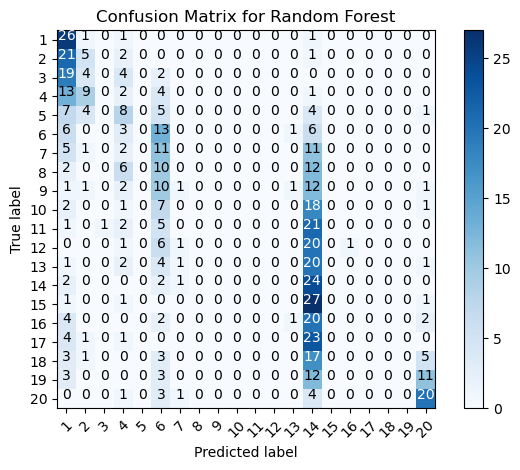

In [ ]:
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt



# Compute confusion matrix
cm = confusion_matrix(df1_target_test, df1_rf_pred)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plot the confusion matrix
class_names = label_encoder.classes_
plot_confusion_matrix(cm, classes=class_names, title='Confusion Matrix for Random Forest')
plt.show()

#### XG-Boost

In [ ]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

display(df1_target_test)
display(df1_pred_xg)

print("Confusion Matrix:")
print(confusion_matrix(df1_target_test, df1_pred_xg))
print()

print("Accuracy: {}".format(accuracy_score(df1_target_test, df1_pred_xg)))

array([ 1,  3, 12,  8,  8, 14,  6, 19,  3,  6, 13,  9, 12,  1,  3, 17, 11,
        5,  6, 15,  1,  3, 16,  1, 13, 14,  7,  0, 17, 12,  5,  5, 14, 19,
       14,  1, 12,  5,  8, 10, 14, 18, 16,  0,  2,  4,  9, 13, 10, 15, 10,
       19, 17, 14, 13, 15,  5,  5, 17, 11, 19, 11,  7,  3,  0,  4,  5,  8,
        6,  4, 15,  1, 19, 16, 19,  2,  2,  8,  1, 15, 10,  4,  9, 11,  4,
       11, 18, 15, 16,  4, 11, 15, 11,  4,  0, 17,  2,  6,  9,  9,  8,  7,
        8, 17, 10, 18,  2,  7,  3,  7,  0,  2, 18, 12,  5, 12,  4,  1,  5,
        5, 19, 17,  2,  5,  4, 16,  9,  9,  1,  5,  1, 15, 14,  6,  3,  6,
       15,  6,  7, 10,  5,  0,  0,  2,  1, 11, 10,  7, 10,  6,  1,  0,  6,
       10, 10, 10,  2, 10,  8,  3,  5,  2,  1, 15,  7, 16, 19, 12,  5, 10,
        3, 11, 10,  1,  0, 14, 14, 12,  0, 18,  2, 19, 11,  7, 17, 13,  1,
        6, 12, 10, 13,  8, 14,  7,  1, 13, 19, 14, 17,  0,  6, 16,  6, 12,
        8, 19, 16,  3, 19, 19, 11,  4, 10, 18,  5, 16, 14, 18,  4, 17,  4,
        3,  3, 18,  5,  1

array([ 3,  3, 12,  8,  8, 14,  7, 19,  3,  6, 13,  9, 12,  1,  3, 17, 10,
        5,  6, 18,  1,  3, 16,  1, 13, 14,  7,  0, 17, 14,  5,  5, 14, 19,
       19,  0, 10,  5,  8, 10, 14, 16, 16,  0,  2,  4, 13, 13, 10, 15, 13,
       17, 19, 14, 14, 19,  4,  5, 16, 11, 19, 11,  8,  3,  0,  4,  5,  8,
        6,  4, 17,  1, 19, 15, 17,  2,  5,  8,  1, 15, 10,  4,  7, 11,  4,
       11, 17, 15, 15,  4, 11, 15, 13,  4,  0, 18,  2,  0,  9,  9, 10,  8,
        8, 17, 10, 18,  2,  7,  2,  3,  0,  2, 18, 12,  5, 12,  4,  1,  5,
        6, 19, 18,  2,  5,  4, 15,  9,  9,  1,  6,  1, 16, 18,  5,  7,  6,
       16,  7,  7, 13,  5,  0,  0,  2,  1, 11, 10,  7, 10,  6,  6,  0,  6,
       10,  9, 10,  6, 14,  8,  3,  7,  5,  1, 15,  7, 17, 16, 12,  2, 10,
        3, 10, 10,  1,  3, 14, 14, 12,  0, 18,  1, 19, 12,  5, 16, 12,  1,
        6, 12, 10, 12,  7, 14,  8,  1, 13, 17, 14, 18,  0,  7, 15,  6, 12,
        8, 19, 16,  3, 18, 19, 12,  4, 10, 17,  6, 16, 18, 18,  4, 16,  4,
        3,  3, 18,  9,  1

Confusion Matrix:
[[27  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1 24  1  1  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3 21  2  0  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2 24  0  0  0  1  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3 24  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  2  1  2 16  6  1  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  3 21  5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  1  4 18  5  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4 22  1  2  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  1  1  4 20  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1 23  2  0  2  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  7 17  2  2  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  3 21  0  2  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  3  6 16  4  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  5 18  0  0  1  2  3]
 [ 0  0  0  0  0  0  0  0  0  0  0  0

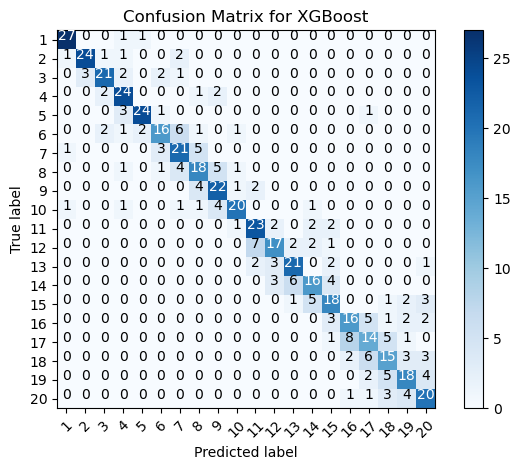

In [ ]:
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

# Compute confusion matrix for df1_pred_xg
cm_xg = confusion_matrix(df1_target_test, df1_pred_xg)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plot the confusion matrix for XGBoost
class_names = label_encoder.classes_
plot_confusion_matrix(cm_xg, classes=class_names, title='Confusion Matrix for XGBoost')
plt.show()

### Mean Squared Error

#### Random Forrest

In [ ]:
#Mean Squared Error Random Forrest

from sklearn.metrics import mean_squared_error

# Berechne den MSE
mse = mean_squared_error(df1_target_test, df1_rf_pred)
print(f"Mean Squared Error: {mse}")

#After hyperparameter tuning
mse2 = mean_squared_error(df1_target_test, df1_rf2_pred)
print(f"Mean Squared Error after Hyperparameter Tuning: {mse2}")

#After successive halving tuning
mse_sh = mean_squared_error(df1_target_test, df1_rf_sh_pred)
print(f"Mean Squared Error after Successive Halving Tuning: {mse_sh}")

Mean Squared Error: 25.628424657534246
Mean Squared Error after Hyperparameter Tuning: 1.74486301369863
Mean Squared Error after Successive Halving Tuning: 1.856164383561644


#### XG-Boost

In [ ]:
#Mean Squared Error XG-Boost

from sklearn.metrics import mean_squared_error

# Berechne den MSE
mse_xg = mean_squared_error(df1_target_test, df1_pred_xg)
print(f"Mean Squared Error: {mse_xg}")

#After hyperparameter tuning
mse2_xg = mean_squared_error(df1_target_test, df1_xgb_sh_pred)
print(f"Mean Squared Error after Hyperparameter Tuning: {mse2_xg}")

Mean Squared Error: 1.8664383561643836
Mean Squared Error after Hyperparameter Tuning: 2.0684931506849313


### Mean Absolute Error MAE

#### Random Forrest

In [ ]:
from sklearn.metrics import mean_absolute_error

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(df1_target_test, df1_rf_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 3.4982876712328768


### Classification Report (Recall and Precision)

#### Random Forrest

In [ ]:
display(label_encoder.classes_)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [ ]:
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(df1_target_test, df1_rf_pred, target_names=label_encoder.classes_.astype(str)))

Classification Report:
              precision    recall  f1-score   support

           1       0.21      0.90      0.35        29
           2       0.19      0.17      0.18        29
           3       0.00      0.00      0.00        29
           4       0.05      0.07      0.06        29
           5       0.00      0.00      0.00        29
           6       0.14      0.45      0.22        29
           7       0.00      0.00      0.00        30
           8       0.00      0.00      0.00        30
           9       0.00      0.00      0.00        29
          10       0.00      0.00      0.00        29
          11       0.00      0.00      0.00        30
          12       0.00      0.00      0.00        29
          13       0.00      0.00      0.00        29
          14       0.09      0.83      0.17        29
          15       0.00      0.00      0.00        30
          16       0.00      0.00      0.00        29
          17       0.00      0.00      0.00        29
    

/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

In [ ]:
#Random Forrest after hyperparameter tuning
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(df1_target_test, df1_rf2_pred, target_names=label_encoder.classes_.astype(str)))

Classification Report:
              precision    recall  f1-score   support

         1.0       0.87      0.93      0.90        29
         2.0       0.88      0.76      0.81        29
         3.0       0.77      0.69      0.73        29
         4.0       0.70      0.72      0.71        29
         5.0       0.73      0.66      0.69        29
         6.0       0.63      0.59      0.61        29
         7.0       0.56      0.63      0.59        30
         8.0       0.54      0.50      0.52        30
         9.0       0.57      0.59      0.58        29
        10.0       0.63      0.66      0.64        29
        11.0       0.55      0.73      0.63        30
        12.0       0.59      0.55      0.57        29
        13.0       0.70      0.66      0.68        29
        14.0       0.62      0.52      0.57        29
        15.0       0.73      0.63      0.68        30
        16.0       0.57      0.69      0.62        29
        17.0       0.50      0.48      0.49        29
    

In [ ]:
#Random Forrest after successive halving tuning
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(df1_target_test, df1_rf_sh_pred, target_names=label_encoder.classes_.astype(str)))

Classification Report:
              precision    recall  f1-score   support

         1.0       0.87      0.90      0.88        29
         2.0       0.81      0.72      0.76        29
         3.0       0.69      0.62      0.65        29
         4.0       0.69      0.69      0.69        29
         5.0       0.77      0.69      0.73        29
         6.0       0.53      0.55      0.54        29
         7.0       0.50      0.53      0.52        30
         8.0       0.48      0.47      0.47        30
         9.0       0.55      0.59      0.57        29
        10.0       0.68      0.66      0.67        29
        11.0       0.53      0.67      0.59        30
        12.0       0.54      0.52      0.53        29
        13.0       0.74      0.69      0.71        29
        14.0       0.57      0.55      0.56        29
        15.0       0.78      0.60      0.68        30
        16.0       0.51      0.66      0.58        29
        17.0       0.48      0.41      0.44        29
    

#### XG Boost

In [ ]:
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(df1_target_test, df1_pred_xg, target_names=label_encoder.classes_.astype(str)))


Classification Report:
              precision    recall  f1-score   support

         1.0       0.90      0.93      0.92        29
         2.0       0.89      0.83      0.86        29
         3.0       0.81      0.72      0.76        29
         4.0       0.71      0.83      0.76        29
         5.0       0.89      0.83      0.86        29
         6.0       0.70      0.55      0.62        29
         7.0       0.60      0.70      0.65        30
         8.0       0.60      0.60      0.60        30
         9.0       0.67      0.76      0.71        29
        10.0       0.83      0.69      0.75        29
        11.0       0.68      0.77      0.72        30
        12.0       0.68      0.59      0.63        29
        13.0       0.70      0.72      0.71        29
        14.0       0.62      0.55      0.58        29
        15.0       0.58      0.60      0.59        30
        16.0       0.59      0.55      0.57        29
        17.0       0.48      0.48      0.48        29
    

In [ ]:
#XGBoost after hyperparameter tuning
print("Classification Report after successive halving:")
print(classification_report(df1_target_test, df1_xgb_sh_pred, target_names=label_encoder.classes_.astype(str)))

Classification Report after successive halving:
              precision    recall  f1-score   support

         1.0       0.90      0.93      0.92        29
         2.0       0.89      0.86      0.88        29
         3.0       0.85      0.79      0.82        29
         4.0       0.75      0.83      0.79        29
         5.0       0.89      0.83      0.86        29
         6.0       0.76      0.66      0.70        29
         7.0       0.73      0.80      0.76        30
         8.0       0.71      0.67      0.69        30
         9.0       0.72      0.79      0.75        29
        10.0       0.77      0.69      0.73        29
        11.0       0.62      0.83      0.71        30
        12.0       0.74      0.59      0.65        29
        13.0       0.78      0.72      0.75        29
        14.0       0.71      0.59      0.64        29
        15.0       0.72      0.70      0.71        30
        16.0       0.58      0.72      0.65        29
        17.0       0.52      0.55

### Cross Validation

In [ ]:
#Implement a cross validation split to get a better estimate about performance of used models.
#Example for Random Forrest

In [ ]:
from sklearn.model_selection import cross_val_score

# Define the model
model = RandomForestClassifier(max_depth=2, random_state=0)

# Perform k-fold cross-validation
k = 5
cv_scores = cross_val_score(model, df1_train, df1_target_train, cv=k)

# Print the cross-validation scores and the mean score
print(f"{k}-Fold Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean()}")

### Visual Evaluation (ROC Curves)

Classifiers necessary which deliver confidence scores of their predicitons. It has to be possible to apply the  ```predict_proba()``` function.

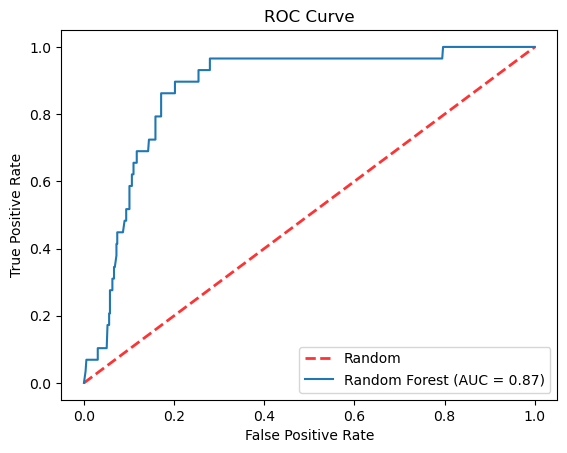

Thresholds: [       inf 0.11924986 0.1190871  0.11908306 0.11869591 0.1175378
 0.11746904 0.11731801 0.11710413 0.11676406 0.1167012  0.11655017
 0.11196241 0.11184672 0.11179964 0.1114417  0.11140845 0.11056331
 0.11034146 0.11029034 0.10993257 0.10991487 0.10989636 0.10986779
 0.10983459 0.10982108 0.10981688 0.10971868 0.10937582 0.1093247
 0.1092118  0.10916472 0.10879598 0.10868718 0.10845669 0.10840961
 0.10835849 0.10783795 0.10778683 0.1076341  0.10733527 0.10712618
 0.10418759 0.10345043 0.09663943 0.09655695 0.09509877 0.09457823
 0.09402428 0.09370261 0.09357625 0.07831446 0.07797258 0.0761055
 0.07605259 0.07600551 0.07595439 0.07555154 0.07554875 0.07362877
 0.07358169 0.07274868 0.0726227  0.07219418 0.06614541 0.06326636
 0.05776581 0.05687578 0.05463625 0.05445195 0.05429339 0.05424227
 0.05216624 0.05205055 0.0519843  0.05195235 0.05147883 0.0511485
 0.05028046 0.05022933 0.04988647 0.04983535 0.04885088 0.0486124
 0.04813076 0.04810552 0.04780597 0.0473987  0.04679362

In [ ]:

from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Berechne die Klassenwahrscheinlichkeiten (Confidences) für das Test-Set
proba_for_each_class = random_forest.predict_proba(df1_test)

# Berechne die ROC-Kurve
fpr, tpr, thresholds = roc_curve(df1_target_test, proba_for_each_class[:, 1], pos_label=1)

# Berechne die AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot die Linie für zufälliges Raten
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8)

# Plot die ROC-Kurve für den Classifier
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')

# Zeige den Plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Zeige die Schwellenwerte
print("Thresholds:", thresholds)

# Modell 3

In [548]:
# Modell 3

df3 = pd.read_csv('../data/processed/export_v1.csv') #Daten von 1950-2024

/var/folders/gt/wnv6zp0s7w92jy1_p2n6shsr0000gn/T/ipykernel_81176/2581890540.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('../data/processed/export_v1.csv') #Daten von 1950-2024


In [549]:
df3.head()

,resultId,raceId,driverId,constructorId,number,grid,year,round,circuitId,race_name,race_date,race_time,fp1_date,fp2_date,fp3_date,fp1_time,fp2_time,fp3_time,quali_time,quali_date,race_location,race_country,race_lat,race_lng,race_alt,q1,q2,q3,position,driver_dob,driver_nationality,driver_code,min_pit_stop_duration,max_pit_stop_duration,avg_pit_stop_duration,std_pit_stop_duration,milliseconds_count,pit_stop_count,min_pit_stop_lap,max_pit_stop_lap,avg_pit_stop_lap,std_pit_stop_lap,avg_pit_stop_driver,avg_pit_stop_team,avg_pit_stop_track,avg_pit_stop_season,rolling_avg_pit_stop_driver,rolling_avg_pit_stop_team,rolling_avg_pit_stop_track,rolling_avg_pit_stop_season
0,1,18,1,1,22,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,\N,\N,\N,\N,\N,\N,\N,\N,Melbourne,Australia,-37.8497,144.968,10,1:26.572,1:25.187,1:26.714,1.0,1985-01-07,British,HAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,18,2,2,3,5,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,\N,\N,\N,\N,\N,\N,\N,\N,Melbourne,Australia,-37.8497,144.968,10,1:25.960,1:25.518,1:27.236,5.0,1977-05-10,German,HEI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,18,3,3,7,7,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,\N,\N,\N,\N,\N,\N,\N,\N,Melbourne,Australia,-37.8497,144.968,10,1:26.295,1:26.059,1:28.687,7.0,1985-06-27,German,ROS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,18,4,4,5,11,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,\N,\N,\N,\N,\N,\N,\N,\N,Melbourne,Australia,-37.8497,144.968,10,1:26.907,1:26.188,\N,12.0,1981-07-29,Spanish,ALO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,18,5,1,23,3,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,\N,\N,\N,\N,\N,\N,\N,\N,Melbourne,Australia,-37.8497,144.968,10,1:25.664,1:25.452,1:27.079,3.0,1981-10-19,Finnish,KOV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Preprocessing

In [547]:
# Wähle nur den Teil des df3, der in der Spalte 'year' Werte zwischen 1950-1996 hat
df3 = df3[(df3['year'] >= 1950) & (df3['year'] <= 1996)]
df3.head()

,position,driver_dob,raceId,driverId,constructorId,year,circuitId,grid,race_date,q1,driver_nationality,race_location,race_lat,race_alt
4707,NaN,1971-03-27,239,14,1,1996,22,8,1996-10-13,NaN,British,Suzuka,34.8431,45
4712,NaN,1968-07-27,239,73,29,1996,22,19,1996-10-13,NaN,Brazilian,Suzuka,34.8431,45
4711,NaN,1972-03-20,239,83,18,1996,22,18,1996-10-13,NaN,Portuguese,Suzuka,34.8431,45
4700,NaN,1960-09-17,239,71,3,1996,22,2,1996-10-13,NaN,British,Suzuka,34.8431,45
4719,NaN,1958-02-18,239,86,18,1996,22,20,1996-10-13,NaN,Italian,Suzuka,34.8431,45


In [462]:
# Sortiere den DataFrame df3 absteigend nach race_date
df3 = df3.sort_values(by='race_date', ascending=False)
df3.tail()

,resultId,raceId,driverId,constructorId,number,grid,year,round,circuitId,race_name,race_date,race_time,fp1_date,fp2_date,fp3_date,fp1_time,fp2_time,fp3_time,quali_time,quali_date,race_location,race_country,race_lat,race_lng,race_alt,q1,q2,q3,position,driver_dob,driver_nationality,driver_code,min_pit_stop_duration,max_pit_stop_duration,avg_pit_stop_duration,std_pit_stop_duration,milliseconds_count,pit_stop_count,min_pit_stop_lap,max_pit_stop_lap,avg_pit_stop_lap,std_pit_stop_lap,avg_pit_stop_driver,avg_pit_stop_team,avg_pit_stop_track,avg_pit_stop_season,rolling_avg_pit_stop_driver,rolling_avg_pit_stop_team,rolling_avg_pit_stop_track,rolling_avg_pit_stop_season
20041,20042,833,589,105,19,11,1950,1,9,British Grand Prix,1950-05-13,\N,\N,\N,\N,\N,\N,\N,\N,\N,Silverstone,UK,52.0786,-1.01694,153,NaN,NaN,NaN,NaN,1899-08-03,Monegasque,\N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20040,20041,833,640,105,20,8,1950,1,9,British Grand Prix,1950-05-13,\N,\N,\N,\N,\N,\N,\N,\N,\N,Silverstone,UK,52.0786,-1.01694,153,NaN,NaN,NaN,NaN,1914-05-18,Swiss,\N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20039,20040,833,785,126,24,17,1950,1,9,British Grand Prix,1950-05-13,\N,\N,\N,\N,\N,\N,\N,\N,\N,Silverstone,UK,52.0786,-1.01694,153,NaN,NaN,NaN,NaN,1921-05-11,British,\N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20042,20043,833,789,154,17,7,1950,1,9,British Grand Prix,1950-05-13,\N,\N,\N,\N,\N,\N,\N,\N,\N,Silverstone,UK,52.0786,-1.01694,153,NaN,NaN,NaN,NaN,1915-03-24,French,\N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20029,20030,833,619,151,12,13,1950,1,9,British Grand Prix,1950-05-13,\N,\N,\N,\N,\N,\N,\N,\N,\N,Silverstone,UK,52.0786,-1.01694,153,NaN,NaN,NaN,NaN,1914-01-19,British,\N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Folgende Attribute für das Modell von 1950-1996

target: position

raceID, driverId, constuctorId, year, circuitId

grid, , race_date, q1, q2,q3, driver_nationality,

driver_dob --> age

race_location, race_lat, race_alt

In [463]:
# Wähle nur die angegebenen Spalten aus df3_filtered aus
df3 = df3[['position','driver_dob', 'raceId', 'driverId', 'constructorId', 'year', 'circuitId', 'grid', 'race_date', 'q1', 'driver_nationality', 'race_location', 'race_lat', 'race_alt']]
df3.tail()

,position,driver_dob,raceId,driverId,constructorId,year,circuitId,grid,race_date,q1,driver_nationality,race_location,race_lat,race_alt
20041,NaN,1899-08-03,833,589,105,1950,9,11,1950-05-13,NaN,Monegasque,Silverstone,52.0786,153
20040,NaN,1914-05-18,833,640,105,1950,9,8,1950-05-13,NaN,Swiss,Silverstone,52.0786,153
20039,NaN,1921-05-11,833,785,126,1950,9,17,1950-05-13,NaN,British,Silverstone,52.0786,153
20042,NaN,1915-03-24,833,789,154,1950,9,7,1950-05-13,NaN,French,Silverstone,52.0786,153
20029,NaN,1914-01-19,833,619,151,1950,9,13,1950-05-13,NaN,British,Silverstone,52.0786,153


In [465]:
df3.shape

(15603, 14)

In [464]:
# Zeige alle Zeilen, die NaN in der Spalte 'position' haben
nan_position_rows = df3[df3['position'].isna()]
display(nan_position_rows)

,position,driver_dob,raceId,driverId,constructorId,year,circuitId,grid,race_date,q1,driver_nationality,race_location,race_lat,race_alt
4707,NaN,1971-03-27,239,14,1,1996,22,8,1996-10-13,NaN,British,Suzuka,34.8431,45
4712,NaN,1968-07-27,239,73,29,1996,22,19,1996-10-13,NaN,Brazilian,Suzuka,34.8431,45
4711,NaN,1972-03-20,239,83,18,1996,22,18,1996-10-13,NaN,Portuguese,Suzuka,34.8431,45
4700,NaN,1960-09-17,239,71,3,1996,22,2,1996-10-13,NaN,British,Suzuka,34.8431,45
4719,NaN,1958-02-18,239,86,18,1996,22,20,1996-10-13,NaN,Italian,Suzuka,34.8431,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20041,NaN,1899-08-03,833,589,105,1950,9,11,1950-05-13,NaN,Monegasque,Silverstone,52.0786,153
20040,NaN,1914-05-18,833,640,105,1950,9,8,1950-05-13,NaN,Swiss,Silverstone,52.0786,153
20039,NaN,1921-05-11,833,785,126,1950,9,17,1950-05-13,NaN,British,Silverstone,52.0786,153
20042,NaN,1915-03-24,833,789,154,1950,9,7,1950-05-13,NaN,French,Silverstone,52.0786,153


14600x NaN bei Position ... ja moin

In [466]:
# Filter rows in df1 where q1 is NaN or '\N'
nan_q1_rows = df1[(df1['q1'].isna()) | (df1['q1'] == '\\N')]
display(nan_q1_rows)

,raceId,driverId,constructorId,grid,year,circuitId,race_lat,race_lng,race_alt,q1,q2,q3,position,driver_nationality,min_pit_stop_duration,max_pit_stop_duration,avg_pit_stop_duration,std_pit_stop_duration,milliseconds_count,pit_stop_count,min_pit_stop_lap,max_pit_stop_lap,avg_pit_stop_lap,std_pit_stop_lap,avg_pit_stop_driver,avg_pit_stop_team,avg_pit_stop_track,avg_pit_stop_season,rolling_avg_pit_stop_driver,rolling_avg_pit_stop_team,rolling_avg_pit_stop_track,rolling_avg_pit_stop_season,age


In [467]:
# Filter rows in df3 where q1 is not NaN or '\N'
df3_filtered_q1 = df3[(df3['q1'].notna()) & (df3['q1'] != '\\N')]
display(df3_filtered_q1)

,position,driver_dob,raceId,driverId,constructorId,year,circuitId,grid,race_date,q1,driver_nationality,race_location,race_lat,race_alt
4529,14.0,1971-03-27,230,14,1,1996,4,14,1996-06-02,1:23.416,British,Montmeló,41.5700,109
4531,18.0,1972-03-20,230,83,18,1996,4,18,1996-06-02,1:25.274,Portuguese,Montmeló,41.5700,109
4530,20.0,1968-07-27,230,73,29,1996,4,20,1996-06-02,1:25.621,Brazilian,Montmeló,41.5700,109
4515,11.0,1967-05-18,230,49,15,1996,4,11,1996-06-02,1:23.195,German,Montmeló,41.5700,109
4528,19.0,1973-01-14,230,21,18,1996,4,19,1996-06-02,1:25.531,Italian,Montmeló,41.5700,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5142,10.0,1963-05-29,257,79,25,1994,18,10,1994-03-27,1:18.194,Japanese,São Paulo,-23.7036,785
5144,21.0,1964-06-25,257,65,32,1994,18,21,1994-03-27,1:19.483,British,São Paulo,-23.7036,785
5143,7.0,1968-12-20,257,91,15,1994,18,7,1994-03-27,1:17.927,Austrian,São Paulo,-23.7036,785
5141,14.0,1972-05-23,257,22,17,1994,18,14,1994-03-27,1:18.414,Brazilian,São Paulo,-23.7036,785


### Calculating Driver Age

In [437]:
# Calculate Driver Age for df3

# Ensure df3 is defined
df3['race_date'] = pd.to_datetime(df3['race_date'])
df3['driver_dob'] = pd.to_datetime(df3['driver_dob'])

# Calculate age
df3['age'] = df3.apply(lambda row: row['race_date'].year - row['driver_dob'].year - ((row['race_date'].month, row['race_date'].day) < (row['driver_dob'].month, row['driver_dob'].day)), axis=1)

# Drop driver_dob column
df3 = df3.drop(columns=['driver_dob'])
df3 = df3.drop(columns=['race_date'])

df3.head()

,position,raceId,driverId,constructorId,year,circuitId,grid,q1,q2,q3,driver_nationality,race_location,race_lat,race_alt,age
4380,2.0,224,71,3,1996,1,2,1:32.509,\N,\N,British,Melbourne,-37.8497,10,35
4381,1.0,224,35,3,1996,1,1,1:32.371,\N,\N,Canadian,Melbourne,-37.8497,10,24
4382,3.0,224,56,6,1996,1,3,1:32.889,\N,\N,British,Melbourne,-37.8497,10,30
4383,7.0,224,77,22,1996,1,7,1:34.344,\N,\N,Austrian,Melbourne,-37.8497,10,36
4384,5.0,224,57,1,1996,1,5,1:34.054,\N,\N,Finnish,Melbourne,-37.8497,10,27


# Ensembles

Let the different models vote for final prediction.

Possabilities: 
Stacking,
Voting

### Stacking

Stacking example for the Random Forrest and Naive Bayes Classifier with a Decision Tree classifier as the meta classifier.

In [544]:
def evaluate_classifier(e_name, e, X_train, y_train, X_test, y_test):
    y_pred = e.fit(X_train, y_train).predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'{e_name}: ACC={acc:.2f}')


In [545]:


#Stacking Example for XG-Boost and Random Forrest

from sklearn.tree import DecisionTreeClassifier #Meta Learner
from sklearn.preprocessing import LabelEncoder

# Stacking: scikit-learn has no implementation for Stacking. You can use this -> https://rasbt.gith2ub.io/mlxtend/
# HINT: mlxtend can only work with numerical labels. You can use the LabelEncoder to transform your labels.

from mlxtend.classifier import StackingClassifier

estimators = {'RandomForrest': RandomForestClassifier(max_depth= 20, max_features = 'sqrt', min_samples_leaf= 1, min_samples_split= 10, n_estimators= 300, random_state=0), 'XGBoost': xgb.XGBClassifier(random_state=42)} #Possible to extend to even more classifiers

encoder = LabelEncoder()
df1_target_train_encoded = encoder.fit_transform(df1_target_train)
df1_target_test_encoded = encoder.transform(df1_target_test)

ensemble = StackingClassifier(
    classifiers=list(estimators.values()),
    meta_classifier=DecisionTreeClassifier()
)
estimators['Stacking'] = ensemble

for e_name, e in estimators.items():
    evaluate_classifier(e_name, e, df1_train, df1_target_train_encoded, df1_test, df1_target_test_encoded)

#Does it improve accuracy? Leider nein

RandomForrest: ACC=0.62
XGBoost: ACC=0.68
Stacking: ACC=0.66
